# マイクロマウスの左手法をMuJoCoを用いて実装することを目指す．

In [2]:
import time

import mujoco
import mujoco.viewer
import glfw
import keyboard

def action(model, data, left, right):
    data.actuator('right').ctrl[0] = right
    data.actuator('left').ctrl[0] = left

def get_distance(model, data):
    lf = data.sensor('LF').data[0]#sensordata[lf_id]
    ls = data.sensor('LS').data[0]#sensordata[ls_id]
    rs = data.sensor('RS').data[0]#sensordata[rs_id]
    rf = data.sensor('RF').data[0]#sensordata[rf_id]
    return lf,ls,rs,rf

def get_accel(model, data):
  ax = data.sensor('Accel').data[0]
  ay = data.sensor('Accel').data[1]
  az = data.sensor('Accel').data[2]
  return ax,ay,az

def get_gyro(model, data):
  gx = data.sensor('Gyro').data[0]
  gy = data.sensor('Gyro').data[1]
  gz = data.sensor('Gyro').data[2]
  return gx,gy,gz

paused = False
def key_callback(keycode): 
  if chr(keycode) == ' ':
    global paused #グローバル変数のpausedを使用できるように，この関数のスコープ内に取り込む処理
    paused = not paused #pausedの真偽値を逆にする　trueとfalseを反転

    # if chr(keycode) == ' ':
    #     # 前進の開始時刻を記録
    #     start_time = time.time()
    #     while time.time() - start_time < 0.2:
    #         data.actuator('right').ctrl[0] = 0.3
    #         data.actuator('left').ctrl[0] = 0.3
            

# 1秒間前進



#Create model
model = mujoco.MjModel.from_xml_path('../mouse_in_maze.xml')
data = mujoco.MjData(model)

gear = 0.3e-2
wheel_r = 0.0135

#Get ID
#wheel_left_id = mujoco.mj_name2id(model, 3,'left wheel joint')
#print('#Left Front Sensor ID',  lf_id)

#Main Loop
now = 0.0
past = 0.0
turn_flag = 0
with mujoco.viewer.launch_passive(model, data, key_callback=key_callback) as viewer: #キーイベントが発生すると、登録されたコールバック関数であるkey_callbackが自動的に呼び出され、キーコードやその他のイベント情報が引数keycodeとして渡されます。
  while viewer.is_running():
    if not paused:
      lf, ls, rs, rf = get_distance(model, data) #各センサ値を取得
      ax, ay, az = get_accel(model, data)
      gx, gy, gz = get_gyro(model, data)

      #Control
    #   err = ls - rs
    #   velocity = 0.05
    #   k= 0.6
    #   if turn_flag==1 or (lf<0.05 and rf <0.05):
    #     turn_flag = 1
    #     right_mot =  0.06
    #     left_mot  = -0.06
    #     if lf > 0.09 and rf > 0.09:
    #       turn_flag = 0
    #     #print('Turn')
    #   else:
    #     right_mot = velocity + k * err
    #     left_mot =  velocity - k * err
    #     #print('Foward')
    
    #   if keyboard.is_pressed('up'):
    #       print("キー '↑'")
    #       right_mot = 0.2
    #       left_mot =  0.2
    #     # 'a'キーに対する処理をここに記述
    #   elif keyboard.is_pressed('right'):
    #       print("キー '→'")
    #       right_mot = 0.05
    #       left_mot =  0.1
    #     # 'b'キーに対する処理をここに記述
    #   else:
    #   print("いずれのキーも押されていません。")
      right_mot = 0.0
      left_mot =  0.0

      #Move
      action(model, data, left_mot, right_mot) #次の制御入力を決める
      if keyboard.is_pressed('up'):
        start_time = time.time()
        while time.time() - start_time < 0.01:
            right_mot = 0.2
            left_mot =  0.2
            action(model, data, left_mot, right_mot)
            #Simulation
            mujoco.mj_step(model, data)
            viewer.sync()
      elif keyboard.is_pressed('down'):
        start_time = time.time()
        while time.time() - start_time < 0.01:
            right_mot = -0.2
            left_mot =  -0.2
            action(model, data, left_mot, right_mot)
            #Simulation
            mujoco.mj_step(model, data)
            viewer.sync()

      #Simulation
      mujoco.mj_step(model, data)
      
      #Vizualize
      now = data.time
      if now-past>0.1:
        past = now
        viewer.sync()
        #Sensor Data Show
        #print(now, ax, ay, az, gx, gy, gz)
        #print(lf,ls,rs,rf)
        #print(data.sensordata)
        #print(data.sensor('Gyro').data[0])
        # print(now,\
        #       data.actuator('right').length[0],   data.actuator('left').length[0],\
        #       data.actuator('right').velocity[0], data.actuator('left').velocity[0],\
        #       ax, ay, az, gx, gy, gz)
      

KeyboardInterrupt: 

# キーボード押したら，1マス進むプログラムを作る

In [ ]:
import time

import mujoco
import mujoco.viewer
import glfw
import keyboard

def action(model, data, left, right):
    data.actuator('right').ctrl[0] = right
    data.actuator('left').ctrl[0] = left

def get_distance(model, data):
    lf = data.sensor('LF').data[0]#sensordata[lf_id]
    ls = data.sensor('LS').data[0]#sensordata[ls_id]
    rs = data.sensor('RS').data[0]#sensordata[rs_id]
    rf = data.sensor('RF').data[0]#sensordata[rf_id]
    return lf,ls,rs,rf

def get_accel(model, data):
  ax = data.sensor('Accel').data[0]
  ay = data.sensor('Accel').data[1]
  az = data.sensor('Accel').data[2]
  return ax,ay,az

def get_gyro(model, data):
  gx = data.sensor('Gyro').data[0]
  gy = data.sensor('Gyro').data[1]
  gz = data.sensor('Gyro').data[2]
  return gx,gy,gz

paused = False
def key_callback(keycode): 
  if chr(keycode) == ' ':
    global paused #グローバル変数のpausedを使用できるように，この関数のスコープ内に取り込む処理
    paused = not paused #pausedの真偽値を逆にする　trueとfalseを反転


def P_straight_control(model, data):#左右の壁による位置補正
    now_speed_right = data.actuator('right').ctrl[0]
    now_speed_left = data.actuator('left').ctrl[0]
    lf, ls, rs, rf = get_distance(model, data)
    
    sensor_diff = ls - rs # 目標値との誤差 正の値のときは，右に寄っている→左を下げて，右を早めたい
    # print(sensor_diff)
    left = kp * -sensor_diff + 0.1
    right = kp * sensor_diff + 0.1
    global turn_flag
    if turn_flag==1 or (lf<0.07 and rf <0.07):
        turn_flag = 1
        right =  0.06
        left  = -0.06
        if lf > 0.09 and rf > 0.09:
          turn_flag = 0
    action(model, data, left, right)

    # if chr(keycode) == ' ':
    #     # 前進の開始時刻を記録
    #     start_time = time.time()
    #     while time.time() - start_time < 0.2:
    #         data.actuator('right').ctrl[0] = 0.3
    #         data.actuator('left').ctrl[0] = 0.3


# 1秒間前進



#Create model
model = mujoco.MjModel.from_xml_path('../mouse_in_maze16x1.xml')
data = mujoco.MjData(model)

gear = 1.8e-3
wheel_r = 0.0135
kp = 100
PID_target = 1

#Get ID
#wheel_left_id = mujoco.mj_name2id(model, 3,'left wheel joint')
#print('#Left Front Sensor ID',  lf_id)

now = 0.0
past = 0.0
turn_flag = 0
#Main Loop
with mujoco.viewer.launch_passive(model, data, key_callback=key_callback) as viewer: #キーイベントが発生すると、登録されたコールバック関数であるkey_callbackが自動的に呼び出され、キーコードやその他のイベント情報が引数keycodeとして渡されます。
  while viewer.is_running():
    
    if not paused:
      lf, ls, rs, rf = get_distance(model, data) #各センサ値を取得
      ax, ay, az = get_accel(model, data)
      gx, gy, gz = get_gyro(model, data)

      #Control
      right_mot = 0.0
      left_mot =  0.0
      
      P_straight_control(model, data)


      #Move
      # action(model, data, left_mot, right_mot) #次の制御入力を決める
      if keyboard.is_pressed('up'):
        start_time = time.time()
        while time.time() - start_time < 0.01:
            right_mot = 0.2
            left_mot =  0.2
            action(model, data, left_mot, right_mot)
            #Simulation
            mujoco.mj_step(model, data)
            viewer.sync()
      elif keyboard.is_pressed('down'):
        start_time = time.time()
        while time.time() - start_time < 0.01:
            right_mot = -0.2
            left_mot =  -0.2
            action(model, data, left_mot, right_mot)
            #Simulation
            mujoco.mj_step(model, data)
            viewer.sync()

      #Simulation
      mujoco.mj_step(model, data)
      
      #Vizualize
      now = data.time
      if now-past>0.01:
        past = now
        viewer.sync()
        #Sensor Data Show
        #print(now, ax, ay, az, gx, gy, gz)
        #print(lf,ls,rs,rf)
        #print(data.sensordata)
        #print(data.sensor('Gyro').data[0])
        # print(now,\
        #       data.actuator('right').length[0],   data.actuator('left').length[0],\
        #       data.actuator('right').velocity[0], data.actuator('left').velocity[0],\
        #       ax, ay, az, gx, gy, gz)
      

In [ ]:
print(viewer.cam)

<MjvCamera
  azimuth: 90.0
  distance: 2.0
  elevation: -45.0
  fixedcamid: -1
  lookat: array([0., 0., 0.])
  trackbodyid: -1
  type: 0
>


# キーボードでモード切替

end


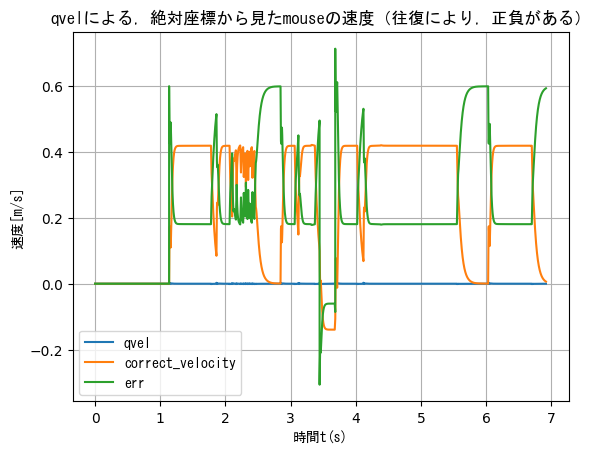

In [ ]:
import time
import matplotlib.pyplot as plt
import mujoco
import mujoco.viewer
import glfw
import keyboard

def action(model, data, left, right):
    data.actuator('right').ctrl[0] = right
    data.actuator('left').ctrl[0] = left

def get_distance(model, data):
    lf = data.sensor('LF').data[0]#sensordata[lf_id]
    ls = data.sensor('LS').data[0]#sensordata[ls_id]
    rs = data.sensor('RS').data[0]#sensordata[rs_id]
    rf = data.sensor('RF').data[0]#sensordata[rf_id]
    return lf,ls,rs,rf

def get_accel(model, data):
  ax = data.sensor('Accel').data[0]
  ay = data.sensor('Accel').data[1]
  az = data.sensor('Accel').data[2]
  return ax,ay,az

def get_gyro(model, data):
  gx = data.sensor('Gyro').data[0]
  gy = data.sensor('Gyro').data[1]
  gz = data.sensor('Gyro').data[2]
  return gx,gy,gz

paused = False
def key_callback(keycode): 
  if chr(keycode) == ' ':
    global paused #グローバル変数のpausedを使用できるように，この関数のスコープ内に取り込む処理
    paused = not paused #pausedの真偽値を逆にする　trueとfalseを反転


def P_straight_control(model, data):#左右の壁による位置補正
    now_speed_left = data.actuator('left').ctrl[0]
    now_speed_right = data.actuator('right').ctrl[0]
    lf, ls, rs, rf = get_distance(model, data)
    
    sensor_diff = ls - rs # 目標値との誤差 正の値のときは，右に寄っている→左を下げて，右を早めたい
    # print(sensor_diff)
    left_mot = kp * -sensor_diff + 0.2
    right_mot = kp * sensor_diff + 0.2
    global turn_flag
    if turn_flag==1 or (lf<0.07 and rf <0.07):
        turn_flag = 1
        right_mot =  0.06
        left_mot  = -0.06
        if lf > 0.09 and rf > 0.09:
          turn_flag = 0
    return left_mot, right_mot

def PI_straight_control(model, data):#左右の壁による位置補正
    now_speed_left = data.actuator('left').ctrl[0]
    now_speed_right = data.actuator('right').ctrl[0]
    lf, ls, rs, rf = get_distance(model, data)
    
    sensor_diff = ls - rs # 目標値との誤差 正の値のときは，右に寄っている→左を下げて，右を早めたい
    # print(sensor_diff)
    left_mot = kp * -sensor_diff + 0.2
    right_mot = kp * sensor_diff + 0.2
    global turn_flag
    if turn_flag==1 or (lf<0.07 and rf <0.07):
        turn_flag = 1
        right_mot =  0.06
        left_mot  = -0.06
        if lf > 0.09 and rf > 0.09:
          turn_flag = 0
    return left_mot, right_mot

def odometry():
   a = 1

def P_speed(model, data):
   ax, ay, az = get_accel()



    # if chr(keycode) == ' ':
    #     # 前進の開始時刻を記録
    #     start_time = time.time()
    #     while time.time() - start_time < 0.2:
    #         data.actuator('right').ctrl[0] = 0.3
    #         data.actuator('left').ctrl[0] = 0.3


# 1秒間前進



#Create model
model = mujoco.MjModel.from_xml_path('../mouse_in_test_course.xml')
data = mujoco.MjData(model)

gear = 1.8e-3
wheel_r = 0.0135
kp = 100
st_Kp = 5
target_vel = 0

#Get ID
#wheel_left_id = mujoco.mj_name2id(model, 3,'left wheel joint')
#print('#Left Front Sensor ID',  lf_id)

viz_now = 0.0
viz_past = 0.0
now_time = 0
past_time = 0
turn_flag = 0
x_vel = 0
y_vel = 0
z_vel = 0
x_vel_graph = []
velocimeter_graph = []
err_graph = []
timevals = []
#Main Loop
with mujoco.viewer.launch_passive(model, data, key_callback=key_callback) as viewer: #キーイベントが発生すると、登録されたコールバック関数であるkey_callbackが自動的に呼び出され、キーコードやその他のイベント情報が引数keycodeとして渡されます。
  while viewer.is_running():
    
    if not paused:
      lf, ls, rs, rf = get_distance(model, data) #各センサ値を取得
      before_ax, before_ay, before_az = get_accel(model, data)
      gx, gy, gz = get_gyro(model, data)

      #Move
      # action(model, data, left_mot, right_mot) #次の制御入力を決める
      if keyboard.is_pressed('up'):
        right_mot = 0.05
        left_mot =  0.05
      elif keyboard.is_pressed('down'):
        right_mot = -0.05
        left_mot =  -0.05
      elif keyboard.is_pressed('right'):
        right_mot = -0.05
        left_mot =  0.05
      elif keyboard.is_pressed('left'):
        right_mot = 0.05
        left_mot =  -0.05
      elif keyboard.is_pressed('p'):#P制御モード
        left_mot, right_mot = P_straight_control(model, data)
      elif keyboard.is_pressed('i'):#PI制御モード
        left_mot, right_mot = P_straight_control(model, data)

      elif keyboard.is_pressed('q'):#PI制御モード
        target_vel = 1
      elif keyboard.is_pressed('w'):#PI制御モード
        target_vel = 0
        break
      elif keyboard.is_pressed('e'):#PI制御モード
        target_vel = -0.2
        
        
      else:
        odometry()
        right_mot = 0
        left_mot = 0

      #Simulation
      action(model, data, left_mot, right_mot)
      mujoco.mj_step(model, data)
      # 速度を計算
      now_time = data.time
      delta_t = now_time - past_time
      # print(delta_t)
      ax, ay, az = get_accel(model, data)
      x_vel += (ax - before_ax)*delta_t
      y_vel += (ay - before_ay)*delta_t
      z_vel += (az - before_az)*delta_t
      x_veloci = data.sensor("Veloci").data[0] # 今の速度を取る
      # 目標との誤差を計算
      # err = target_vel - x_vel
      err = target_vel - x_veloci #目標と，今の速度との誤差を算出
      err_graph.append(err)
      left_mot = st_Kp * err
      right_mot = st_Kp * err
      timevals.append(data.time)
      x_vel_graph.append(x_vel)
      velocimeter_graph.append(data.sensor("Veloci").data[0])


      past_time = now_time
      
      #Vizualize
      viz_now = data.time
      if viz_now-viz_past>0.01:
        viz_past = viz_now
        viewer.sync()
        #Sensor Data Show
        #print(now, ax, ay, az, gx, gy, gz)
        #print(lf,ls,rs,rf)
        #print(data.sensordata)
        #print(data.sensor('Gyro').data[0])
        # print(now,\
        #       data.actuator('right').length[0],   data.actuator('left').length[0],\
        #       data.actuator('right').velocity[0], data.actuator('left').velocity[0],\
        #       ax, ay, az, gx, gy, gz)

print("end")
plt.title("qvelによる，絶対座標から見たmouseの速度（往復により，正負がある）", fontname="MS Gothic")
plt.grid()
plt.xlabel("時間t(s)", fontname="MS Gothic")
plt.ylabel("速度[m/s]", fontname="MS Gothic")

plt.plot(timevals, x_vel_graph, linestyle='solid', label="qvel")
plt.plot(timevals, velocimeter_graph, linestyle='solid', label="correct_velocity")
plt.plot(timevals, err_graph, linestyle='solid', label="err")
# plt.plot(t, y, label='Free Fall', )
plt.legend(prop={'family':'MS Gothic'})

plt.figure(figsize=(10, 6))

# Plot x_vel_graph
plt.subplot(3, 1, 1)
plt.title("qvelによる，絶対座標から見たmouseの速度（往復により，正負がある）", fontname="MS Gothic")
plt.grid()
plt.xlabel("時間t(s)", fontname="MS Gothic")
plt.ylabel("速度[m/s]", fontname="MS Gothic")
plt.plot(timevals, x_vel_graph, linestyle='solid', label="qvel")
plt.legend(prop={'family':'MS Gothic'})

# Plot velocimeter_graph
plt.subplot(3, 1, 2)
plt.grid()
plt.xlabel("時間t(s)", fontname="MS Gothic")
plt.ylabel("速度[m/s]", fontname="MS Gothic")
plt.plot(timevals, velocimeter_graph, linestyle='solid', label="correct_velocity")
plt.legend(prop={'family':'MS Gothic'})

# Plot err_graph
plt.subplot(3, 1, 3)
plt.grid()
plt.xlabel("時間t(s)", fontname="MS Gothic")
plt.ylabel("誤差", fontname="MS Gothic")
plt.plot(timevals, err_graph, linestyle='solid', label="err")
plt.legend(prop={'family':'MS Gothic'})

plt.tight_layout()
plt.show()



# 各動作開発時のセル　開発時のセルのためごちゃごちゃしています

0.3 ＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
0 ＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
-0.3 ＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
0.3 ＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
0 ＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
-0.3 ＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
0.3 ＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
0 ＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
-0.3 ＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
0.3 ＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
0 ＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
-0.3 ＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
0.3 ＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
0 ＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
-0.3 ＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
0.3 ＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
0 ＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
-0.3 ＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
0.3 ＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
0 ＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
-0.3 ＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
0.3 ＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
0 ＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
-0.3 ＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
0.3 ＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
0 ＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
-0.3 ＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
end


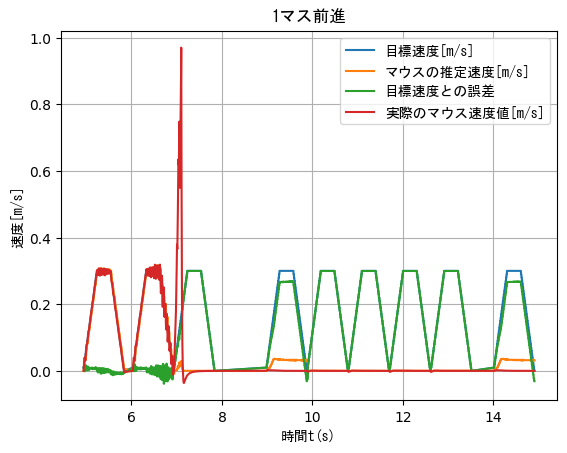

In [ ]:
import time
import matplotlib.pyplot as plt
import mujoco
import mujoco.viewer
import glfw
import keyboard
import math

def action(model, data, left, right):
    data.actuator('right').ctrl[0] = right
    data.actuator('left').ctrl[0] = left

def get_distance(model, data):
    lf = data.sensor('LF').data[0]#sensordata[lf_id]
    ls = data.sensor('LS').data[0]#sensordata[ls_id]
    rs = data.sensor('RS').data[0]#sensordata[rs_id]
    rf = data.sensor('RF').data[0]#sensordata[rf_id]
    return lf,ls,rs,rf

def get_accel(model, data):
  ax = data.sensor('Accel').data[0]
  ay = data.sensor('Accel').data[1]
  az = data.sensor('Accel').data[2]
  return ax,ay,az

def get_gyro(model, data):
  gx = data.sensor('Gyro').data[0]
  gy = data.sensor('Gyro').data[1]
  gz = data.sensor('Gyro').data[2]
  return gx,gy,gz

def get_odom(model, data): #今のタイヤの回転角度と速度（角度と角速度）を求める．
  odm_right = data.actuator('right').length[0]/gear # 得た値をgearで割ったもの＝タイヤの角度(rad)
  odm_left = data.actuator('left').length[0]/gear # ＝タイヤの角度
  # vel_right = data.geom('mein_body1').qvel[0]/gear # ＝タイヤの回転角速度
  
  vel_left = data.actuator('left').velocity[0]/gear # ＝タイヤの回転角速度
  # これらは真値のため，エンコーダ4096パルス/1回転ということに考慮すると，1回展あたり4096なので，2pi/4096回るごとにカウントをインクリメントしていく
  return odm_right, odm_left, #vel_right, vel_left

def get_pulse_count(pre_odm_right, pre_odm_left, odm_right, odm_left): #回転量をパルスにする エンコーダの役割をする関数
  """
    回転量の差から，パルス数を求める． エンコーダの役割をする関数\\
    Returns:
        right_pulse_num = 右タイヤのパルス数 \\
          left_pulse_num = 左タイヤのパルス数
    """
  # odm_right = data.actuator('right').length[0]/gear # 得た値をgearで割ったもの＝タイヤの角度(rad)
  # odm_left = data.actuator('left').length[0]/gear # ＝タイヤの角度
  global right_rotation_sum
  global left_rotation_sum
  pre_right_rotation_sum = right_rotation_sum
  pre_left_rotation_sum = left_rotation_sum
  right_rotation_sum += (odm_right - pre_odm_right)/(2*math.pi) *4096 #1周あたり4096段階で，細かい回転量を計測（分解能ほぼ無限のエンコーダ）
  # print(right_rotation_sum)
  left_rotation_sum += (odm_left - pre_odm_left)/(2*math.pi) *4096 #1周あたり4096段階で，細かい回転量を計測（分解能ほぼ無限のエンコーダ）
  right_pulse_num = int(right_rotation_sum) - int(pre_right_rotation_sum)
  left_pulse_num = int(left_rotation_sum) - int(pre_left_rotation_sum)
  # print("回転量をパルス段階に変換　この値の差が，実際に出たパルスとなる：", right_pulse_num)
  return right_pulse_num, left_pulse_num

def get_odom_at_pulse(right_pulse_num, left_pulse_num): #今のタイヤの回転角度と速度（角度と角速度）を求める．
  right_wheel_move = 2*math.pi * wheel_r * (right_pulse_num/4096) #２πｒ×回転数で移動距離を求める．/delta_t
  left_wheel_move = 2*math.pi * wheel_r * (left_pulse_num/4096) #２πｒ×回転数で移動距離を求める．
  right_wheel_vel = right_wheel_move/delta_t #移動距離から，速度を求める
  left_wheel_vel = left_wheel_move/delta_t #移動距離から，速度を求める
  mouse_vel = (right_wheel_vel + left_wheel_vel)/2 #左右平均が並進速度
  mouse_radvel = (right_wheel_vel - left_wheel_vel)/tread #これがマウスの旋回角速度（rad/s）
  return mouse_vel, mouse_radvel #これで，エンコーダによる各タイヤの推定速度が求められた



paused = False
def key_callback(keycode): 
  if chr(keycode) == ' ':
    global paused #グローバル変数のpausedを使用できるように，この関数のスコープ内に取り込む処理
    paused = not paused #pausedの真偽値を逆にする　trueとfalseを反転


def P_straight_control(model, data):#左右の壁による位置補正
    now_speed_left = data.actuator('left').ctrl[0]
    now_speed_right = data.actuator('right').ctrl[0]
    lf, ls, rs, rf = get_distance(model, data)
    
    sensor_diff = ls - rs # 目標値との誤差 正の値のときは，右に寄っている→左を下げて，右を早めたい
    # print(sensor_diff)
    left_mot = kp * -sensor_diff + 0.2
    right_mot = kp * sensor_diff + 0.2
    global turn_flag
    if turn_flag==1 or (lf<0.07 and rf <0.07):
        turn_flag = 1
        right_mot =  0.06
        left_mot  = -0.06
        if lf > 0.09 and rf > 0.09:
          turn_flag = 0
    return left_mot, right_mot

def PI_straight_control(model, data):#左右の壁による位置補正
    now_speed_left = data.actuator('left').ctrl[0]
    now_speed_right = data.actuator('right').ctrl[0]
    lf, ls, rs, rf = get_distance(model, data)
    
    sensor_diff = ls - rs # 目標値との誤差 正の値のときは，右に寄っている→左を下げて，右を早めたい
    # print(sensor_diff)
    left_mot = kp * -sensor_diff + 0.2
    right_mot = kp * sensor_diff + 0.2
    global turn_flag
    if turn_flag==1 or (lf<0.07 and rf <0.07):
        turn_flag = 1
        right_mot =  0.06
        left_mot  = -0.06
        if lf > 0.09 and rf > 0.09:
          turn_flag = 0
    return left_mot, right_mot

# def odometry():
#    a = 1

# def P_speed(model, data):
#    ax, ay, az = get_accel()



    # if chr(keycode) == ' ':
    #     # 前進の開始時刻を記録
    #     start_time = time.time()
    #     while time.time() - start_time < 0.2:
    #         data.actuator('right').ctrl[0] = 0.3
    #         data.actuator('left').ctrl[0] = 0.3


# 1秒間前進



#Create model
model = mujoco.MjModel.from_xml_path('../mouse_in_maze.xml')
data = mujoco.MjData(model)

odom_right_graph = []
mouse_correct_vel_graph = []

gear = 9.0e-3
wheel_r = 0.0135
tread = 0.072
mx = 0.0
my = 0.0
psi = 0.0
past_odom_right = 0.0
past_odom_left = 0.0
# kp = 100
# st_Kp = 1.55 #ダンピング3.6e-6のときの最適なゲイン
st_Kp = 8.4
rad_Kp = 0.15
rad_vel_Kp = 2

rad_Kd = 0.00001

ki6 = 0.02
kd = 0.09
I_err_sum = 0
d_grad = 0
prev_err_rad = 0
target_vel = 0
target_rad = math.pi/2
target_rad_vel = 0
mjstep_count = 0

right_pulse_num = 0
right_pulse_num_graph = []
left_pulse_num = 0
left_pulse_num_graph = []

right_rotation_sum = 0
left_rotation_sum = 0

mouse_vel = 0
mouse_rad_vel = 0
mouse_xpos = 0
mouse_xpos_graph = []
mouse_ypos = 0
mouse_ypos_graph = []
target_vel_graph = []
err_vel_graph = []
mouse_vel_graph = []

#Get ID
#wheel_left_id = mujoco.mj_name2id(model, 3,'left wheel joint')
#print('#Left Front Sensor ID',  lf_id)

viz_now = 0.0
viz_past = 0.0
now_time = 0
past_time = 0
turn_flag = 0
x_vel = 0
y_vel = 0
z_vel = 0
err = 0
delta_t = 0
mouse_now_rad_xy = math.pi/2 #y軸方向を向いている
left_mot = 0 #最初は0
left_mot_graph = []
right_mot = 0
x_vel_graph = []
velocimeter_graph = []
err_graph = []
err_rad_graph = []
gyro_graph = []
yzahyou = []
timevals = []
timevals5 = []
timevals6 = []
I_err_rad_vel_sum = 0
mouse_angle_rad = 0
mouse_angle_rad_graph = []
mouse_correct_rad_vel_graph = []
mouse_rad_vel_graph = []
err_rad_vel_graph = []
target_rad_vel_graph = []
#Main Loop
with mujoco.viewer.launch_passive(model, data, key_callback=key_callback) as viewer: #キーイベントが発生すると、登録されたコールバック関数であるkey_callbackが自動的に呼び出され、キーコードやその他のイベント情報が引数keycodeとして渡されます。
  while viewer.is_running():
    
    if not paused:
      lf, ls, rs, rf = get_distance(model, data) #各センサ値を取得
      before_ax, before_ay, before_az = get_accel(model, data)
      gx, gy, gz = get_gyro(model, data)
      


      #Simulation
      if keyboard.is_pressed('q'):#PI制御モード
        # target_vel += 0.0001
        target_vel = 1
      elif keyboard.is_pressed('w'):#終了
        target_vel = 0
        break
      elif keyboard.is_pressed('e'):#PI制御モード
        # target_vel += -0.0001
        target_vel = -0.2
      elif keyboard.is_pressed('1'):#1ます前進  目標との誤差を計算する，その後それにゲインを掛けた値を入力値とする

        target_vel = 0
        for i in range(20000):
          target_vel += 0.09/20000
          yzahyou.append(data.geom("mein_body1").xpos[1])
          ax, ay, az = get_accel(model, data)
          # d_grad_prev_x_vel = x_vel #D制御のための部分
          x_vel += (ax + before_ax)/2*delta_t
          y_vel += (ay + before_ay)/2*delta_t
          z_vel += (az + before_az)/2*delta_t
          # x_veloci = data.sensor("Veloci").data[0] # 今の速度を取る
          # 目標との誤差を計算
          err = target_vel - x_vel
          # err = target_vel - x_veloci #目標と，今の速度との誤差を算出
          err_graph.append(err)
          # I_err_sum += err
          # d_grad = (x_vel - d_grad_prev_x_vel)/delta_t
          left_mot = st_Kp * err #- kd * d_grad#+ ki * I_err_sum
          right_mot = st_Kp * err #- kd * d_grad #+ ki * I_err_sum
          action(model, data, left_mot, right_mot)
          mujoco.mj_step(model, data)
          timevals.append(data.time)
          x_vel_graph.append(x_vel)
          # velocimeter_graph.append(x_veloci)
          before_ax = ax
          before_ay = ay
          before_az = az

          past_time = now_time
          
          #Vizualize
          viz_now = data.time
          if viz_now-viz_past>0.1:
            viz_past = viz_now
            viewer.sync()
        
        for i in range(20000):
          target_vel += 0
          yzahyou.append(data.geom("mein_body1").xpos[1])
          ax, ay, az = get_accel(model, data)
          # d_grad_prev_x_vel = x_vel #D制御のための部分
          x_vel += (ax + before_ax)/2*delta_t
          y_vel += (ay + before_ay)/2*delta_t
          z_vel += (az + before_az)/2*delta_t
          # x_veloci = data.sensor("Veloci").data[0] # 今の速度を取る
          # 目標との誤差を計算
          err = target_vel - x_vel
          # err = target_vel - x_veloci #目標と，今の速度との誤差を算出
          err_graph.append(err)
          # I_err_sum += err
          # d_grad = (x_vel - d_grad_prev_x_vel)/delta_t
          left_mot = st_Kp * err #- kd * d_grad#+ ki * I_err_sum
          right_mot = st_Kp * err #- kd * d_grad #+ ki * I_err_sum
          action(model, data, left_mot, right_mot)
          mujoco.mj_step(model, data)
          timevals.append(data.time)
          x_vel_graph.append(x_vel)
          # velocimeter_graph.append(x_veloci)
          before_ax = ax
          before_ay = ay
          before_az = az

          past_time = now_time
          
          #Vizualize
          viz_now = data.time
          if viz_now-viz_past>0.01:
            viz_past = viz_now
            viewer.sync()
        
        for i in range(20000):
          target_vel -= 0.09/20000
          yzahyou.append(data.geom("mein_body1").xpos[1])
          ax, ay, az = get_accel(model, data)
          # d_grad_prev_x_vel = x_vel #D制御のための部分
          x_vel += (ax + before_ax)/2*delta_t
          y_vel += (ay + before_ay)/2*delta_t
          z_vel += (az + before_az)/2*delta_t
          # x_veloci = data.sensor("Veloci").data[0] # 今の速度を取る
          # 目標との誤差を計算
          err = target_vel - x_vel
          # err = target_vel - x_veloci #目標と，今の速度との誤差を算出
          err_graph.append(err)
          # I_err_sum += err
          # d_grad = (x_vel - d_grad_prev_x_vel)/delta_t
          left_mot = st_Kp * err #- kd * d_grad#+ ki * I_err_sum
          right_mot = st_Kp * err #- kd * d_grad #+ ki * I_err_sum
          action(model, data, left_mot, right_mot)
          mujoco.mj_step(model, data)
          timevals.append(data.time)
          x_vel_graph.append(x_vel)
          # velocimeter_graph.append(x_veloci)
          before_ax = ax
          before_ay = ay
          before_az = az

          past_time = now_time
          
          #Vizualize
          viz_now = data.time
          if viz_now-viz_past>0.01:
            viz_past = viz_now
            viewer.sync()
        target_vel = 0
        print(target_vel)
        print("err=", err)
        print("err=", err)

        # for i in range(20000):
        #   # target_vel -= 0.00000225
        #   action(model, data, left_mot, right_mot)
        #   mujoco.mj_step(model, data)
        #   yzahyou.append(data.geom("mein_body1").xpos[1])
        #   # 速度を計算
        #   now_time = data.time
        #   delta_t = now_time - past_time
        #   # print(delta_t)
        #   ax, ay, az = get_accel(model, data)
        #   x_vel += (ax + before_ax)/2*delta_t
        #   y_vel += (ay + before_ay)/2*delta_t
        #   z_vel += (az + before_az)/2*delta_t
        #   # x_veloci = data.sensor("Veloci").data[0] # 今の速度を取る
        #   # 目標との誤差を計算
        #   err = target_vel - x_vel
        #   # err = target_vel - x_veloci #目標と，今の速度との誤差を算出
        #   err_graph.append(err)
        #   I_err_sum += err
        #   left_mot = st_Kp * err #+ ki * I_err_sum
        #   right_mot = st_Kp * err #+ ki * I_err_sum
        #   timevals.append(data.time)
        #   x_vel_graph.append(x_vel)
        #   # velocimeter_graph.append(x_veloci)

        #   past_time = now_time
          
        #   #Vizualize
        #   viz_now = data.time
        #   if viz_now-viz_past>0.01:
        #     viz_past = viz_now
        #     viewer.sync()
        
        
        # break

      elif keyboard.is_pressed('5'):#オドメトリ前進
        straight_kp = 16.9
        ki5 = 1
        I_err_sum = 0
        # エンコーダを読み取る
        pre_odm_right, pre_odm_left = get_odom(model, data)
        target_vel = 0
        for kasoku in range(3):
          target_add_num = [0.3,0,-0.3]
          print(target_add_num[kasoku], "＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃")
          for kukan in range(30):
            # print(kukan)
            # x_veloci = data.sensor("Veloci").data[0] # 今の速度を取る
            # mouse_correct_vel_graph.append(x_veloci)
            target_vel += target_add_num[kasoku]/30 #目標回転角速度を15度/秒にすると
            err_vel = target_vel - mouse_vel # 目標との速度誤差を計算
            I_err_sum += err_vel
            # target_vel_graph.append(target_vel)
            # err_vel_graph.append(err_vel)
            left_mot = straight_kp * err_vel + ki5 * I_err_sum
            right_mot = straight_kp * err_vel + ki5 * I_err_sum
            left_mot_graph.append(left_mot)
            action(model, data, left_mot, right_mot)
            for seigyosyuuki in range(100):
              mujoco.mj_step(model, data)
              mjstep_count += 1
              timevals5.append(data.time)
              mouse_vel_graph.append(mouse_vel)
              yzahyou.append(data.geom("mein_body1").xpos[1])
              err_vel_graph.append(err_vel)
              target_vel_graph.append(target_vel)
              x_veloci = data.sensor("Veloci").data[0] # 今の速度を取る
              mouse_correct_vel_graph.append(x_veloci)
            #Vizualize
            viz_now = data.time
            if viz_now-viz_past>0.01:
              viz_past = viz_now
              viewer.sync()
            # エンコーダをもう一度読み取る
            odm_right, odm_left = get_odom(model, data)
            # この一瞬に出たパルス数を算出し，
            right_pulse_num, left_pulse_num = get_pulse_count(pre_odm_right, pre_odm_left, odm_right, odm_left)
            right_pulse_num_graph.append(right_pulse_num)
            # パルス数から，移動速度と角速度を求める
            mouse_vel, mouse_rad_vel = get_odom_at_pulse(right_pulse_num, left_pulse_num) #これで，エンコーダによるマウスの速度・角速度が推定できた
            # mouse_vel_graph.append(mouse_vel)
            # 速度に時間を掛けて，移動距離を計算 まず向きを計算し，その後移動距離を求める
            mouse_angle_rad = mouse_rad_vel * delta_t
            mouse_xpos += mouse_vel * math.cos(mouse_angle_rad) * delta_t
            mouse_ypos += mouse_vel * math.sin(mouse_angle_rad) * delta_t
            mouse_xpos_graph.append(mouse_xpos)
            mouse_ypos_graph.append(mouse_ypos)
            # 一つ前のodom値を更新
            pre_odm_right = odm_right
            pre_odm_left = odm_left
            viz_now = data.time
            if viz_now-viz_past>0.01:
              viz_past = viz_now
              viewer.sync()
            # print("え")
            if keyboard.is_pressed('9'):#PI制御モード
              print("breakした")
              break
          

        

        # 現在の座標変数に移動距離を足して座標更新

        # 目標速度値ー現在速度で誤差を求め，その値にPゲインを掛けて制御
        # 目標速度値を徐々に上げていく
        # 一定
        # 徐々に下げていく
        # この間オドメトリはし続ける
        # 以上ループ

      elif keyboard.is_pressed('6'):#オドメトリで右90deg回転
        r_turn_kp = 0.57
        # エンコーダを読み取る
        pre_odm_right, pre_odm_left = get_odom(model, data)
        target_rad_vel = 0
        for kasoku in range(3):
          target_add_rad_vel = [(math.pi*5/6),0,(-math.pi*5/6)]
          print(target_add_rad_vel[kasoku], "＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃")
          for kukan in range(30):
            target_rad_vel += target_add_rad_vel[kasoku]/30 #目標回転角速度を15度/秒にすると
            err_rad_vel = target_rad_vel - mouse_rad_vel # 目標との角速度誤差を計算
            I_err_rad_vel_sum += err_rad_vel # 目標との角速度誤差を積算
            left_mot = -r_turn_kp * err_rad_vel - ki6 * I_err_rad_vel_sum
            right_mot = r_turn_kp * err_rad_vel + ki6 * I_err_rad_vel_sum
            action(model, data, left_mot, right_mot)
            for seigyosyuuki in range(100):
              mujoco.mj_step(model, data)
              mjstep_count += 1
              timevals6.append(data.time)
              mouse_rad_vel_graph.append(mouse_rad_vel)
              err_rad_vel_graph.append(err_rad_vel)
              target_rad_vel_graph.append(target_rad_vel)
              # mouse_angle_rad_graph.append(mouse_angle_rad)
              # print(mouse_angle_rad)
              gx, gy, gz = get_gyro(model, data)
              mouse_correct_rad_vel_graph.append(gz)
            #Vizualize
            viz_now = data.time
            if viz_now-viz_past>0.01:
              viz_past = viz_now
              viewer.sync()
            # エンコーダをもう一度読み取る
            odm_right, odm_left = get_odom(model, data)
            # この一瞬に出たパルス数を算出し，
            right_pulse_num, left_pulse_num = get_pulse_count(pre_odm_right, pre_odm_left, odm_right, odm_left)
            right_pulse_num_graph.append(right_pulse_num)
            # パルス数から，移動速度と角速度を求める
            mouse_vel, mouse_rad_vel = get_odom_at_pulse(right_pulse_num, left_pulse_num) #これで，エンコーダによるマウスの速度・角速度が推定できた
            # mouse_vel_graph.append(mouse_vel)
            # 速度に時間を掛けて，移動距離を計算 まず向きを計算し，その後移動距離を求める
            mouse_angle_rad = mouse_rad_vel * delta_t
            mouse_xpos += mouse_vel * math.cos(mouse_angle_rad) * delta_t
            mouse_ypos += mouse_vel * math.sin(mouse_angle_rad) * delta_t
            mouse_xpos_graph.append(mouse_xpos)
            mouse_ypos_graph.append(mouse_ypos)
            # 一つ前のodom値を更新
            pre_odm_right = odm_right
            pre_odm_left = odm_left
            viz_now = data.time
            if viz_now-viz_past>0.01:
              viz_past = viz_now
              viewer.sync()
            # print("え")
            if keyboard.is_pressed('9'):#PI制御モード
              print("breakした")
              break

      elif keyboard.is_pressed('7'):#オドメトリで左90deg回転
        r_turn_kp = 0.57
        # エンコーダを読み取る
        pre_odm_right, pre_odm_left = get_odom(model, data)
        target_rad_vel = 0
        for kasoku in range(3):
          target_add_rad_vel = [(-math.pi*5/6),0,(math.pi*5/6)]
          print(target_add_rad_vel[kasoku], "＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃")
          for kukan in range(30):
            target_rad_vel += target_add_rad_vel[kasoku]/30 #目標回転角速度を15度/秒にすると
            err_rad_vel = target_rad_vel - mouse_rad_vel # 目標との角速度誤差を計算
            I_err_rad_vel_sum += err_rad_vel # 目標との角速度誤差を積算
            left_mot = -r_turn_kp * err_rad_vel - ki6 * I_err_rad_vel_sum
            right_mot = r_turn_kp * err_rad_vel + ki6 * I_err_rad_vel_sum
            action(model, data, left_mot, right_mot)
            for seigyosyuuki in range(100):
              mujoco.mj_step(model, data)
              mjstep_count += 1
              timevals6.append(data.time)
              mouse_rad_vel_graph.append(mouse_rad_vel)
              err_rad_vel_graph.append(err_rad_vel)
              target_rad_vel_graph.append(target_rad_vel)
              # mouse_angle_rad_graph.append(mouse_angle_rad)
              # print(mouse_angle_rad)
              gx, gy, gz = get_gyro(model, data)
              mouse_correct_rad_vel_graph.append(gz)
            #Vizualize
            viz_now = data.time
            if viz_now-viz_past>0.01:
              viz_past = viz_now
              viewer.sync()
            # エンコーダをもう一度読み取る
            odm_right, odm_left = get_odom(model, data)
            # この一瞬に出たパルス数を算出し，
            right_pulse_num, left_pulse_num = get_pulse_count(pre_odm_right, pre_odm_left, odm_right, odm_left)
            right_pulse_num_graph.append(right_pulse_num)
            # パルス数から，移動速度と角速度を求める
            mouse_vel, mouse_rad_vel = get_odom_at_pulse(right_pulse_num, left_pulse_num) #これで，エンコーダによるマウスの速度・角速度が推定できた
            # mouse_vel_graph.append(mouse_vel)
            # 速度に時間を掛けて，移動距離を計算 まず向きを計算し，その後移動距離を求める
            mouse_angle_rad = mouse_rad_vel * delta_t
            mouse_xpos += mouse_vel * math.cos(mouse_angle_rad) * delta_t
            mouse_ypos += mouse_vel * math.sin(mouse_angle_rad) * delta_t
            mouse_xpos_graph.append(mouse_xpos)
            mouse_ypos_graph.append(mouse_ypos)
            # 一つ前のodom値を更新
            pre_odm_right = odm_right
            pre_odm_left = odm_left
            viz_now = data.time
            if viz_now-viz_past>0.01:
              viz_past = viz_now
              viewer.sync()
            # print("え")
            if keyboard.is_pressed('9'):#PI制御モード
              print("breakした")
              break





            # target_rad_vel -= (math.pi/4)/10000 #目標回転角速度を15度/秒にすると
            # target_vel += target_add_num[kasoku]/100 #目標回転角速度を15度/秒にすると
            # err_vel = target_vel - mouse_vel # 目標との速度誤差を計算
            # I_err_sum += err_vel
            # # target_vel_graph.append(target_vel)
            # # err_vel_graph.append(err_vel)
            # left_mot = straight_kp * err_vel + ki * I_err_sum
            # right_mot = straight_kp * err_vel + ki * I_err_sum
            # left_mot_graph.append(left_mot)
            # action(model, data, left_mot, right_mot)
            # for seigyosyuuki in range(100):
            #   mujoco.mj_step(model, data)
            #   mjstep_count += 1
            #   timevals5.append(data.time)
            #   mouse_vel_graph.append(mouse_vel)
            #   yzahyou.append(data.geom("mein_body1").xpos[1])
            #   err_vel_graph.append(err_vel)
            #   target_vel_graph.append(target_vel)
            #   x_veloci = data.sensor("Veloci").data[0] # 今の速度を取る
            #   mouse_correct_vel_graph.append(x_veloci)
            # #Vizualize
            # viz_now = data.time
            # if viz_now-viz_past>0.01:
            #   viz_past = viz_now
            #   viewer.sync()
            # # エンコーダをもう一度読み取る
            # odm_right, odm_left = get_odom(model, data)
            # # この一瞬に出たパルス数を算出し，
            # right_pulse_num, left_pulse_num = get_pulse_count(pre_odm_right, pre_odm_left, odm_right, odm_left)
            # right_pulse_num_graph.append(right_pulse_num)
            # # パルス数から，移動速度と角速度を求める
            # mouse_vel, mouse_rad_vel = get_odom_at_pulse(right_pulse_num, left_pulse_num) #これで，エンコーダによるマウスの速度・角速度が推定できた
            # # mouse_vel_graph.append(mouse_vel)
            # # 速度に時間を掛けて，移動距離を計算 まず向きを計算し，その後移動距離を求める
            # mouse_angle_rad = mouse_rad_vel * delta_t
            # mouse_xpos += mouse_vel * math.cos(mouse_angle_rad) * delta_t
            # mouse_ypos += mouse_vel * math.sin(mouse_angle_rad) * delta_t
            # mouse_xpos_graph.append(mouse_xpos)
            # mouse_ypos_graph.append(mouse_ypos)
            # # 一つ前のodom値を更新
            # pre_odm_right = odm_right
            # pre_odm_left = odm_left
            # viz_now = data.time
            # if viz_now-viz_past>0.01:
            #   viz_past = viz_now
            #   viewer.sync()
            # # print("え")
            # if keyboard.is_pressed('9'):#PI制御モード
            #   print("breakした")
            #   break



      
      elif keyboard.is_pressed('2'):#その場右90deg回転
          target_rad += math.pi/10000
          # for kaiten in range(30000):
          gx, gy, gz = get_gyro(model, data)
          mouse_now_rad_xy += gz*delta_t #ジャイロセンサの値から，現在の角度をオドメトりる
          err_rad = target_rad - mouse_now_rad_xy # 目標角度との誤差にPゲインをかければ良い
          err_rad_graph.append(err_rad)
          #rad_D_grad = (err_rad - prev_err_rad)/delta_t # 角度の変化量（傾き）を求める
          left_mot = -rad_Kp * err_rad# + rad_Kd * rad_D_grad
          right_mot = rad_Kp * err_rad# - rad_Kd * rad_D_grad
          action(model, data, left_mot, right_mot)
          mujoco.mj_step(model, data)
          viewer.sync()
          timevals.append(data.time)
          gyro_graph.append(gz)
          prev_err_rad = err_rad
          #Vizualize
          viz_now = data.time
          if viz_now-viz_past>0.01:
            viz_past = viz_now
            viewer.sync()

      elif keyboard.is_pressed('3'):#その場左90deg回転
          target_rad_vel = 0
          for i in range(10000):
            target_rad_vel += (math.pi/4)/10000 #目標回転角速度を15度/秒にすると
            gx, gy, gz = get_gyro(model, data)
            err_rad = target_rad_vel - gz # 目標との角速度誤差を計算
            err_rad_graph.append(err_rad)
            # I_err_sum += err
            # d_grad = (x_vel - d_grad_prev_x_vel)/delta_t
            left_mot = rad_vel_Kp * (-err_rad) #- kd * d_grad#+ ki * I_err_sum
            right_mot = rad_vel_Kp * err_rad #- kd * d_grad #+ ki * I_err_sum
            action(model, data, left_mot, right_mot)
            mujoco.mj_step(model, data)
            timevals.append(data.time)
            gyro_graph.append(gz)
            #Vizualize
            viz_now = data.time
            if viz_now-viz_past>0.01:
              viz_past = viz_now
              viewer.sync()

          for i in range(10000):
            target_rad_vel += 0 #目標回転角速度を15度/秒にすると
            gx, gy, gz = get_gyro(model, data)
            err_rad = target_rad_vel - gz # 目標との角速度誤差を計算
            err_rad_graph.append(err_rad)
            # I_err_sum += err
            # d_grad = (x_vel - d_grad_prev_x_vel)/delta_t
            left_mot = rad_vel_Kp * (-err_rad) #- kd * d_grad#+ ki * I_err_sum
            right_mot = rad_vel_Kp * err_rad #- kd * d_grad #+ ki * I_err_sum
            action(model, data, left_mot, right_mot)
            mujoco.mj_step(model, data)
            timevals.append(data.time)
            gyro_graph.append(gz)
            #Vizualize
            viz_now = data.time
            if viz_now-viz_past>0.01:
              viz_past = viz_now
              viewer.sync()

          for i in range(10000):
            target_rad_vel -= (math.pi/4)/10000 #目標回転角速度を15度/秒にすると
            gx, gy, gz = get_gyro(model, data)
            err_rad = target_rad_vel - gz # 目標との角速度誤差を計算
            err_rad_graph.append(err_rad)
            # I_err_sum += err
            # d_grad = (x_vel - d_grad_prev_x_vel)/delta_t
            left_mot = rad_vel_Kp * (-err_rad) #- kd * d_grad#+ ki * I_err_sum
            right_mot = rad_vel_Kp * err_rad #- kd * d_grad #+ ki * I_err_sum
            action(model, data, left_mot, right_mot)
            mujoco.mj_step(model, data)
            timevals.append(data.time)
            gyro_graph.append(gz)
            #Vizualize
            viz_now = data.time
            if viz_now-viz_past>0.01:
              viz_past = viz_now
              viewer.sync()
          
          # break
      elif keyboard.is_pressed('4'):#その場右90deg回転
          target_rad_vel = 0
          for i in range(10000):
            target_rad_vel -= (math.pi/4)/10000 #目標回転角速度を15度/秒にすると
            gx, gy, gz = get_gyro(model, data)
            err_rad = target_rad_vel - gz # 目標との角速度誤差を計算
            err_rad_graph.append(err_rad)
            # I_err_sum += err
            # d_grad = (x_vel - d_grad_prev_x_vel)/delta_t
            left_mot = rad_vel_Kp * (-err_rad) #- kd * d_grad#+ ki * I_err_sum
            right_mot = rad_vel_Kp * err_rad #- kd * d_grad #+ ki * I_err_sum
            action(model, data, left_mot, right_mot)
            mujoco.mj_step(model, data)
            timevals.append(data.time)
            gyro_graph.append(gz)
            #Vizualize
            viz_now = data.time
            if viz_now-viz_past>0.01:
              viz_past = viz_now
              viewer.sync()

          for i in range(10000):
            target_rad_vel += 0 #目標回転角速度を15度/秒にすると
            gx, gy, gz = get_gyro(model, data)
            err_rad = target_rad_vel - gz # 目標との角速度誤差を計算
            err_rad_graph.append(err_rad)
            # I_err_sum += err
            # d_grad = (x_vel - d_grad_prev_x_vel)/delta_t
            left_mot = rad_vel_Kp * (-err_rad) #- kd * d_grad#+ ki * I_err_sum
            right_mot = rad_vel_Kp * err_rad #- kd * d_grad #+ ki * I_err_sum
            action(model, data, left_mot, right_mot)
            mujoco.mj_step(model, data)
            timevals.append(data.time)
            gyro_graph.append(gz)
            #Vizualize
            viz_now = data.time
            if viz_now-viz_past>0.01:
              viz_past = viz_now
              viewer.sync()

          for i in range(10000):
            target_rad_vel += (math.pi/4)/10000 #目標回転角速度を15度/秒にすると
            gx, gy, gz = get_gyro(model, data)
            err_rad = target_rad_vel - gz # 目標との角速度誤差を計算
            err_rad_graph.append(err_rad)
            # I_err_sum += err
            # d_grad = (x_vel - d_grad_prev_x_vel)/delta_t
            left_mot = rad_vel_Kp * (-err_rad) #- kd * d_grad#+ ki * I_err_sum
            right_mot = rad_vel_Kp * err_rad #- kd * d_grad #+ ki * I_err_sum
            action(model, data, left_mot, right_mot)
            mujoco.mj_step(model, data)
            timevals.append(data.time)
            gyro_graph.append(gz)
            #Vizualize
            viz_now = data.time
            if viz_now-viz_past>0.01:
              viz_past = viz_now
              viewer.sync()
          
          # break


          
          
          
          
          
          
      else:
         a = 2
      left_mot = 0
      right_mot = 0
      for seigyosyuuki2 in range(100):
        action(model, data, left_mot, right_mot)
        mujoco.mj_step(model, data)
      # yzahyou.append(data.geom("mein_body1").xpos[1])
      # print("ターゲットベル：", target_vel)
      # 速度を計算
      now_time = data.time
      delta_t = now_time - past_time
      # print(delta_t)
      ax, ay, az = get_accel(model, data)
      # x_vel += (ax + before_ax)/2*delta_t
      # y_vel += (ay + before_ay)/2*delta_t
      # z_vel += (az + before_az)/2*delta_t
      # x_veloci = data.sensor("Veloci").data[0] # 今の速度を取る
      # 目標との誤差を計算
      # err = target_vel - x_vel
      # err = target_vel - x_veloci #目標と，今の速度との誤差を算出
      err_graph.append(err)
      # I_err_sum += err
      # left_mot = st_Kp * err + ki * I_err_sum
      # right_mot = st_Kp * err + ki * I_err_sum
      timevals.append(data.time)
      x_vel_graph.append(x_vel)
      gyro_graph.append(gz)
      # velocimeter_graph.append(x_veloci)
      before_ax = ax
      before_ay = ay
      before_az = az

      past_time = now_time
      
      #Vizualize
      viz_now = data.time
      if viz_now-viz_past>0.1:
        viz_past = viz_now
        viewer.sync()
        #Sensor Data Show
        #print(now, ax, ay, az, gx, gy, gz)
        #print(lf,ls,rs,rf)
        #print(data.sensordata)
        #print(data.sensor('Gyro').data[0])
        # print(now,\
        #       data.actuator('right').length[0],   data.actuator('left').length[0],\
        #       data.actuator('right').velocity[0], data.actuator('left').velocity[0],\
        #       ax, ay, az, gx, gy, gz)

print("end")
# plt.title("目標速度を徐々に増加，または減少させたときの速度追従と移動距離", fontname="MS Gothic")
plt.title("1マス前進", fontname="MS Gothic")
plt.grid()
plt.xlabel("時間t(s)", fontname="MS Gothic")
plt.ylabel("速度[m/s]", fontname="MS Gothic")

# plt.plot(timevals, x_vel_graph, linestyle='solid', label="速度[m/s]")

#前進関係のプロット
plt.plot(timevals5, target_vel_graph, linestyle='solid', label="目標速度[m/s]")
plt.plot(timevals5, mouse_vel_graph, linestyle='solid', label="マウスの推定速度[m/s]")
plt.plot(timevals5, err_vel_graph, linestyle='solid', label="目標速度との誤差")
plt.plot(timevals5, mouse_correct_vel_graph, linestyle='solid', label="実際のマウス速度値[m/s]")

#回転関係のプロット
# plt.plot(timevals6, target_rad_vel_graph, linestyle='solid', label="目標角速度(rad/s)")
# plt.plot(timevals6, mouse_rad_vel_graph, linestyle='solid', label="マウス角速度値(推定)")
# plt.plot(timevals6, err_rad_vel_graph, linestyle='solid', label="目標との角速度誤差")
# plt.plot(timevals6, mouse_correct_rad_vel_graph, linestyle='solid', label="真の角速度")

# plt.plot(timevals5, left_mot_graph, linestyle='solid', label="出力値")
# # plt.plot(timevals, velocimeter_graph, linestyle='solid', label="correct_velocity")
# plt.plot(timevals, err_graph, linestyle='solid', label="目標速度との誤差")
# plt.plot(timevals5, yzahyou, linestyle='solid', label="y座標（進んだ距離）")
# plt.plot(timevals, gyro_graph, linestyle='solid', label="gyro")
# plt.plot(mouse_ypos_graph, mouse_xpos_graph, linestyle='solid', label="座標")
# plt.xlim(0.2, 0.5)
# plt.ylim(0.06, 0.09)

# plt.plot(t, y, label='Free Fall', )
plt.legend(prop={'family':'MS Gothic'})

# import matplotlib.pyplot as plt

# # Create subplots
# fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# # Plot the first graph
# axs[0, 0].plot(timevals5, target_vel_graph, linestyle='solid', label="目標速度[m/s]")
# axs[0, 0].set_title("目標速度")
# axs[0, 0].set_xlabel("時間t(s)")
# axs[0, 0].set_ylabel("速度[m/s]")
# axs[0, 0].grid(True)
# axs[0, 0].legend()

# # Plot the second graph
# axs[0, 1].plot(timevals5, mouse_vel_graph, linestyle='solid', label="マウスの推定速度[m/s]")
# axs[0, 1].set_title("マウスの推定速度")
# axs[0, 1].set_xlabel("時間t(s)")
# axs[0, 1].set_ylabel("速度[m/s]")
# axs[0, 1].grid(True)
# axs[0, 1].legend()

# # Plot the third graph
# axs[1, 0].plot(timevals5, err_vel_graph, linestyle='solid', label="目標速度との誤差")
# axs[1, 0].set_title("目標速度との誤差")
# axs[1, 0].set_xlabel("時間t(s)")
# axs[1, 0].set_ylabel("速度[m/s]")
# axs[1, 0].grid(True)
# axs[1, 0].legend()

# # Plot the fourth graph
# axs[1, 1].plot(timevals5, yzahyou, linestyle='solid', label="y座標（進んだ距離）")
# axs[1, 1].set_title("y座標（進んだ距離）")
# axs[1, 1].set_xlabel("時間t(s)")
# axs[1, 1].set_ylabel("距離")
# axs[1, 1].grid(True)
# axs[1, 1].legend()

# # Adjust the layout
# plt.tight_layout()

# # Show the plots
# plt.show()

# 左手法を作るため，各移動プログラムを確認

0.3 ＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
0.01035437031822814 左タイヤの移動速度
0.028992236891037904 左タイヤの移動速度
0.03934660720926557 左タイヤの移動速度
0.037275733145620014 左タイヤの移動速度
0.047630103463847794 左タイヤの移動速度
0.0662679700366578 左タイヤの移動速度
0.07662234035488558 左タイヤの移動速度
0.07869321441853114 左タイヤの移動速度
0.09111845880040446 左タイヤの移動速度
0.10561457724592337 左タイヤの移動速度
0.11596894756415918 左タイヤの移動速度
0.12011069569145892 左タイヤの移動速度
0.1283941919460423 左タイヤの移動速度
0.14496118445520906 左タイヤの移動速度
0.15738642883708412 左タイヤの移動速度
0.1615281769643758 左タイヤの移動速度
0.16774079915531334 左タイヤの移動速度
0.18430779166448008 左タイヤの移動速度
0.19673303604635514 左タイヤの移動速度
0.20087478417364682 左タイヤの移動速度
0.2091582804282302 左タイヤの移動速度
0.22365439887375113 左タイヤの移動速度
0.23607964325562616 左タイヤの移動速度
0.24022139138291784 左タイヤの移動速度
0.2505757617011471 左タイヤの移動速度
0.265071880146668 左タイヤの移動速度
0.27128450233760554 左タイヤの移動速度
0.28163887265583476 左タイヤの移動速度
0.2940641170377098 左タイヤの移動速度
0.30234761329229315 左タイヤの移動速度
0 ＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
0.30234761329229315 左タイヤの移動速度
0.2940641170377098 

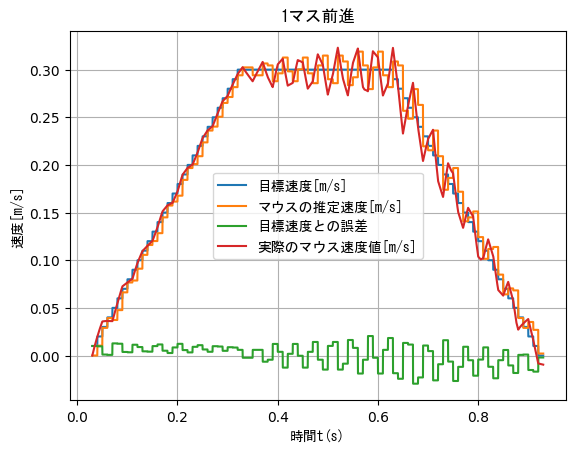

In [ ]:
import time
import matplotlib.pyplot as plt
import mujoco
import mujoco.viewer
import glfw
import keyboard
import math

def action(model, data, left, right):
    data.actuator('right').ctrl[0] = right
    data.actuator('left').ctrl[0] = left

def get_distance(model, data):
    lf = data.sensor('LF').data[0]#sensordata[lf_id]
    ls = data.sensor('LS').data[0]#sensordata[ls_id]
    rs = data.sensor('RS').data[0]#sensordata[rs_id]
    rf = data.sensor('RF').data[0]#sensordata[rf_id]
    return lf,ls,rs,rf

def get_accel(model, data):
  ax = data.sensor('Accel').data[0]
  ay = data.sensor('Accel').data[1]
  az = data.sensor('Accel').data[2]
  return ax,ay,az

def get_gyro(model, data):
  gx = data.sensor('Gyro').data[0]
  gy = data.sensor('Gyro').data[1]
  gz = data.sensor('Gyro').data[2]
  return gx,gy,gz

def get_odom(model, data): #今のタイヤの回転角度と速度（角度と角速度）を求める．
  odm_right = data.actuator('right').length[0]/gear # 得た値をgearで割ったもの＝タイヤの角度(rad)
  odm_left = data.actuator('left').length[0]/gear # ＝タイヤの角度
  # vel_right = data.geom('mein_body1').qvel[0]/gear # ＝タイヤの回転角速度
  
  vel_left = data.actuator('left').velocity[0]/gear # ＝タイヤの回転角速度
  # これらは真値のため，エンコーダ4096パルス/1回転ということに考慮すると，1回展あたり4096なので，2pi/4096回るごとにカウントをインクリメントしていく
  return odm_right, odm_left, #vel_right, vel_left

def get_pulse_count(pre_odm_right, pre_odm_left, odm_right, odm_left): #回転量をパルスにする エンコーダの役割をする関数
  """
    回転量の差から，パルス数を求める． エンコーダの役割をする関数\\
    Returns:
        right_pulse_num = 右タイヤのパルス数 \\
          left_pulse_num = 左タイヤのパルス数
    """
  # odm_right = data.actuator('right').length[0]/gear # 得た値をgearで割ったもの＝タイヤの角度(rad)
  # odm_left = data.actuator('left').length[0]/gear # ＝タイヤの角度
  global right_rotation_sum
  global left_rotation_sum
  pre_right_rotation_sum = right_rotation_sum
  pre_left_rotation_sum = left_rotation_sum
  right_rotation_sum += (odm_right - pre_odm_right)/(2*math.pi) *4096 #1周あたり4096段階で，細かい回転量を計測（分解能ほぼ無限のエンコーダ）
  # print(right_rotation_sum)
  left_rotation_sum += (odm_left - pre_odm_left)/(2*math.pi) *4096 #1周あたり4096段階で，細かい回転量を計測（分解能ほぼ無限のエンコーダ）
  right_pulse_num = int(right_rotation_sum) - int(pre_right_rotation_sum)
  left_pulse_num = int(left_rotation_sum) - int(pre_left_rotation_sum)
  # print("回転量をパルス段階に変換　この値の差が，実際に出たパルスとなる：", right_pulse_num)
  return right_pulse_num, left_pulse_num

def get_odom_at_pulse(right_pulse_num, left_pulse_num): #今のタイヤの回転角度と速度（角度と角速度）を求める．
  right_wheel_move = 2*math.pi * wheel_r * (right_pulse_num/4096) #２πｒ×回転数で移動距離を求める．/delta_t
  left_wheel_move = 2*math.pi * wheel_r * (left_pulse_num/4096) #２πｒ×回転数で移動距離を求める．
  right_wheel_vel = right_wheel_move/delta_t #移動距離から，速度を求める
  # print(right_wheel_move, "右タイヤの移動距離")
  left_wheel_vel = left_wheel_move/delta_t #移動距離から，速度を求める
  print(left_wheel_vel, "左タイヤの移動速度")
  mouse_vel = (right_wheel_vel + left_wheel_vel)/2 #左右平均が並進速度
  mouse_radvel = (right_wheel_vel - left_wheel_vel)/tread #これがマウスの旋回角速度（rad/s）
  return mouse_vel, mouse_radvel #これで，エンコーダによる各タイヤの推定速度が求められた



paused = False
def key_callback(keycode): 
  if chr(keycode) == ' ':
    global paused #グローバル変数のpausedを使用できるように，この関数のスコープ内に取り込む処理
    paused = not paused #pausedの真偽値を逆にする　trueとfalseを反転


def P_straight_control(model, data):#左右の壁による位置補正
    now_speed_left = data.actuator('left').ctrl[0]
    now_speed_right = data.actuator('right').ctrl[0]
    lf, ls, rs, rf = get_distance(model, data)
    
    sensor_diff = ls - rs # 目標値との誤差 正の値のときは，右に寄っている→左を下げて，右を早めたい
    # print(sensor_diff)
    left_mot = kp * -sensor_diff + 0.2
    right_mot = kp * sensor_diff + 0.2
    global turn_flag
    if turn_flag==1 or (lf<0.07 and rf <0.07):
        turn_flag = 1
        right_mot =  0.06
        left_mot  = -0.06
        if lf > 0.09 and rf > 0.09:
          turn_flag = 0
    return left_mot, right_mot

def PI_straight_control(model, data):#左右の壁による位置補正
    now_speed_left = data.actuator('left').ctrl[0]
    now_speed_right = data.actuator('right').ctrl[0]
    lf, ls, rs, rf = get_distance(model, data)
    
    sensor_diff = ls - rs # 目標値との誤差 正の値のときは，右に寄っている→左を下げて，右を早めたい
    # print(sensor_diff)
    left_mot = kp * -sensor_diff + 0.2
    right_mot = kp * sensor_diff + 0.2
    global turn_flag
    if turn_flag==1 or (lf<0.07 and rf <0.07):
        turn_flag = 1
        right_mot =  0.06
        left_mot  = -0.06
        if lf > 0.09 and rf > 0.09:
          turn_flag = 0
    return left_mot, right_mot

# def odometry():
#    a = 1

# def P_speed(model, data):
#    ax, ay, az = get_accel()



    # if chr(keycode) == ' ':
    #     # 前進の開始時刻を記録
    #     start_time = time.time()
    #     while time.time() - start_time < 0.2:
    #         data.actuator('right').ctrl[0] = 0.3
    #         data.actuator('left').ctrl[0] = 0.3


# 1秒間前進



#Create model
model = mujoco.MjModel.from_xml_path('../mouse_in_maze.xml')
data = mujoco.MjData(model)

odom_right_graph = []
mouse_correct_vel_graph = []

gear = 9.0e-3
wheel_r = 0.0135
tread = 0.072
mx = 0.0
my = 0.0
psi = 0.0
past_odom_right = 0.0
past_odom_left = 0.0
# kp = 100
# st_Kp = 1.55 #ダンピング3.6e-6のときの最適なゲイン
st_Kp = 8.4
rad_Kp = 0.15
rad_vel_Kp = 2

rad_Kd = 0.00001

ki6 = 0.02
kd = 0.09
I_err_sum = 0
d_grad = 0
prev_err_rad = 0
target_vel = 0
target_rad = math.pi/2
target_rad_vel = 0
mjstep_count = 0

right_pulse_num = 0
right_pulse_num_graph = []
left_pulse_num = 0
left_pulse_num_graph = []

right_rotation_sum = 0
left_rotation_sum = 0

mouse_vel = 0
mouse_rad_vel = 0
mouse_xpos = 0
mouse_xpos_graph = []
mouse_ypos = 0
mouse_ypos_graph = []
target_vel_graph = []
err_vel_graph = []
mouse_vel_graph = []

#Get ID
#wheel_left_id = mujoco.mj_name2id(model, 3,'left wheel joint')
#print('#Left Front Sensor ID',  lf_id)

viz_now = 0.0
viz_past = 0.0
now_time = 0
past_time = 0
turn_flag = 0
x_vel = 0
y_vel = 0
z_vel = 0
err = 0
delta_t = 0.01
mouse_now_rad_xy = math.pi/2 #y軸方向を向いている
left_mot = 0 #最初は0
left_mot_graph = []
right_mot = 0
x_vel_graph = []
velocimeter_graph = []
err_graph = []
err_rad_graph = []
gyro_graph = []
yzahyou = []
timevals = []
timevals5 = []
timevals6 = []
I_err_rad_vel_sum = 0
mouse_angle_rad = 0
mouse_angle_rad_graph = []
mouse_correct_rad_vel_graph = []
mouse_rad_vel_graph = []
err_rad_vel_graph = []
target_rad_vel_graph = []
#Main Loop
with mujoco.viewer.launch_passive(model, data, key_callback=key_callback) as viewer: #キーイベントが発生すると、登録されたコールバック関数であるkey_callbackが自動的に呼び出され、キーコードやその他のイベント情報が引数keycodeとして渡されます。
  time.sleep(5)
  while viewer.is_running():
    
    if not paused:
      lf, ls, rs, rf = get_distance(model, data) #各センサ値を取得
      before_ax, before_ay, before_az = get_accel(model, data)
      gx, gy, gz = get_gyro(model, data)
      # keyboard.press('5')　使えなかった．管理者権限ではないから

      #Simulation
      if keyboard.is_pressed('q'):#PI制御モード
        # target_vel += 0.0001
        target_vel = 1
    

      elif keyboard.is_pressed('5'):#オドメトリ前進
        # keyboard.release('5')
        straight_kp = 16.9
        ki5 = 1*0
        I_err_sum = 0
        # エンコーダを読み取る
        pre_odm_right, pre_odm_left = get_odom(model, data)
        target_vel = 0
        for kasoku in range(3):
          target_add_num = [0.3,0,-0.3]
          print(target_add_num[kasoku], "＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃")
          for kukan in range(30):
            # print(kukan)
            # x_veloci = data.sensor("Veloci").data[0] # 今の速度を取る
            # mouse_correct_vel_graph.append(x_veloci)
            target_vel += target_add_num[kasoku]/30 #目標回転角速度を15度/秒にすると
            err_vel = target_vel - mouse_vel # 目標との速度誤差を計算
            I_err_sum += err_vel
            # target_vel_graph.append(target_vel)
            # err_vel_graph.append(err_vel)
            left_mot = straight_kp * err_vel + ki5 * I_err_sum
            right_mot = straight_kp * err_vel + ki5 * I_err_sum
            action(model, data, left_mot, right_mot)
            for seigyosyuuki in range(100):
              mujoco.mj_step(model, data)
              mjstep_count += 1
              timevals5.append(data.time)
              mouse_vel_graph.append(mouse_vel)
              yzahyou.append(data.geom("mein_body1").xpos[1])
              err_vel_graph.append(err_vel)
              target_vel_graph.append(target_vel)
              x_veloci = data.sensor("Veloci").data[0] # 今の速度を取る
              mouse_correct_vel_graph.append(x_veloci)
            #Vizualize
            viz_now = data.time
            if viz_now-viz_past>0.01:
              viz_past = viz_now
              viewer.sync()
            # エンコーダをもう一度読み取る
            odm_right, odm_left = get_odom(model, data)
            # この一瞬に出たパルス数を算出し，
            right_pulse_num, left_pulse_num = get_pulse_count(pre_odm_right, pre_odm_left, odm_right, odm_left)
            right_pulse_num_graph.append(right_pulse_num)
            # パルス数から，移動速度と角速度を求める
            mouse_vel, mouse_rad_vel = get_odom_at_pulse(right_pulse_num, left_pulse_num) #これで，エンコーダによるマウスの速度・角速度が推定できた
            # mouse_vel_graph.append(mouse_vel)
            # 速度に時間を掛けて，移動距離を計算 まず向きを計算し，その後移動距離を求める
            mouse_angle_rad = mouse_rad_vel * delta_t
            mouse_xpos += mouse_vel * math.cos(mouse_angle_rad) * delta_t
            mouse_ypos += mouse_vel * math.sin(mouse_angle_rad) * delta_t
            mouse_xpos_graph.append(mouse_xpos)
            mouse_ypos_graph.append(mouse_ypos)
            # 一つ前のodom値を更新
            pre_odm_right = odm_right
            pre_odm_left = odm_left
            viz_now = data.time
            if viz_now-viz_past>0.01:
              viz_past = viz_now
              viewer.sync()
            # print("え")
            # left_mot = 0
            # right_mot = 0
            now_time = data.time
            delta_t = now_time - past_time
            past_time = now_time
            if keyboard.is_pressed('9'):#PI制御モード
              print("breakした")
              break
          

        

        # 現在の座標変数に移動距離を足して座標更新

        # 目標速度値ー現在速度で誤差を求め，その値にPゲインを掛けて制御
        # 目標速度値を徐々に上げていく
        # 一定
        # 徐々に下げていく
        # この間オドメトリはし続ける
        # 以上ループ

      elif keyboard.is_pressed('6'):#オドメトリで右90deg回転
        r_turn_kp = 0.57
        # エンコーダを読み取る
        pre_odm_right, pre_odm_left = get_odom(model, data)
        target_rad_vel = 0
        for kasoku in range(3):
          target_add_rad_vel = [(math.pi*5/6),0,(-math.pi*5/6)]
          print(target_add_rad_vel[kasoku], "＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃")
          for kukan in range(30):
            target_rad_vel += target_add_rad_vel[kasoku]/30 #目標回転角速度を15度/秒にすると
            err_rad_vel = target_rad_vel - mouse_rad_vel # 目標との角速度誤差を計算
            I_err_rad_vel_sum += err_rad_vel # 目標との角速度誤差を積算
            left_mot = -r_turn_kp * err_rad_vel - ki6 * I_err_rad_vel_sum
            right_mot = r_turn_kp * err_rad_vel + ki6 * I_err_rad_vel_sum
            action(model, data, left_mot, right_mot)
            for seigyosyuuki in range(100):
              mujoco.mj_step(model, data)
              mjstep_count += 1
              timevals6.append(data.time)
              mouse_rad_vel_graph.append(mouse_rad_vel)
              err_rad_vel_graph.append(err_rad_vel)
              target_rad_vel_graph.append(target_rad_vel)
              # mouse_angle_rad_graph.append(mouse_angle_rad)
              # print(mouse_angle_rad)
              gx, gy, gz = get_gyro(model, data)
              mouse_correct_rad_vel_graph.append(gz)
            #Vizualize
            viz_now = data.time
            if viz_now-viz_past>0.01:
              viz_past = viz_now
              viewer.sync()
            # エンコーダをもう一度読み取る
            odm_right, odm_left = get_odom(model, data)
            # この一瞬に出たパルス数を算出し，
            right_pulse_num, left_pulse_num = get_pulse_count(pre_odm_right, pre_odm_left, odm_right, odm_left)
            right_pulse_num_graph.append(right_pulse_num)
            # パルス数から，移動速度と角速度を求める
            mouse_vel, mouse_rad_vel = get_odom_at_pulse(right_pulse_num, left_pulse_num) #これで，エンコーダによるマウスの速度・角速度が推定できた
            # mouse_vel_graph.append(mouse_vel)
            # 速度に時間を掛けて，移動距離を計算 まず向きを計算し，その後移動距離を求める
            mouse_angle_rad = mouse_rad_vel * delta_t
            mouse_xpos += mouse_vel * math.cos(mouse_angle_rad) * delta_t
            mouse_ypos += mouse_vel * math.sin(mouse_angle_rad) * delta_t
            mouse_xpos_graph.append(mouse_xpos)
            mouse_ypos_graph.append(mouse_ypos)
            # 一つ前のodom値を更新
            pre_odm_right = odm_right
            pre_odm_left = odm_left
            viz_now = data.time
            if viz_now-viz_past>0.01:
              viz_past = viz_now
              viewer.sync()
            # print("え")
            now_time = data.time
            delta_t = now_time - past_time
            past_time = now_time
            if keyboard.is_pressed('9'):#PI制御モード
              print("breakした")
              break

      elif keyboard.is_pressed('7'):#オドメトリで左90deg回転
        r_turn_kp = 0.57
        # エンコーダを読み取る
        pre_odm_right, pre_odm_left = get_odom(model, data)
        target_rad_vel = 0
        for kasoku in range(3):
          target_add_rad_vel = [(-math.pi*5/6),0,(math.pi*5/6)]
          print(target_add_rad_vel[kasoku], "＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃")
          for kukan in range(30):
            target_rad_vel += target_add_rad_vel[kasoku]/30 #目標回転角速度を15度/秒にすると
            err_rad_vel = target_rad_vel - mouse_rad_vel # 目標との角速度誤差を計算
            I_err_rad_vel_sum += err_rad_vel # 目標との角速度誤差を積算
            left_mot = -r_turn_kp * err_rad_vel - ki6 * I_err_rad_vel_sum
            right_mot = r_turn_kp * err_rad_vel + ki6 * I_err_rad_vel_sum
            action(model, data, left_mot, right_mot)
            for seigyosyuuki in range(100):
              mujoco.mj_step(model, data)
              mjstep_count += 1
              timevals6.append(data.time)
              mouse_rad_vel_graph.append(mouse_rad_vel)
              err_rad_vel_graph.append(err_rad_vel)
              target_rad_vel_graph.append(target_rad_vel)
              # mouse_angle_rad_graph.append(mouse_angle_rad)
              # print(mouse_angle_rad)
              gx, gy, gz = get_gyro(model, data)
              mouse_correct_rad_vel_graph.append(gz)
            #Vizualize
            viz_now = data.time
            if viz_now-viz_past>0.01:
              viz_past = viz_now
              viewer.sync()
            # エンコーダをもう一度読み取る
            odm_right, odm_left = get_odom(model, data)
            # この一瞬に出たパルス数を算出し，
            right_pulse_num, left_pulse_num = get_pulse_count(pre_odm_right, pre_odm_left, odm_right, odm_left)
            right_pulse_num_graph.append(right_pulse_num)
            # パルス数から，移動速度と角速度を求める
            mouse_vel, mouse_rad_vel = get_odom_at_pulse(right_pulse_num, left_pulse_num) #これで，エンコーダによるマウスの速度・角速度が推定できた
            # mouse_vel_graph.append(mouse_vel)
            # 速度に時間を掛けて，移動距離を計算 まず向きを計算し，その後移動距離を求める
            mouse_angle_rad = mouse_rad_vel * delta_t
            mouse_xpos += mouse_vel * math.cos(mouse_angle_rad) * delta_t
            mouse_ypos += mouse_vel * math.sin(mouse_angle_rad) * delta_t
            mouse_xpos_graph.append(mouse_xpos)
            mouse_ypos_graph.append(mouse_ypos)
            # 一つ前のodom値を更新
            pre_odm_right = odm_right
            pre_odm_left = odm_left
            viz_now = data.time
            if viz_now-viz_past>0.01:
              viz_past = viz_now
              viewer.sync()
            # print("え")
            now_time = data.time
            delta_t = now_time - past_time
            past_time = now_time
            if keyboard.is_pressed('9'):#PI制御モード
              print("breakした")
              break





            # target_rad_vel -= (math.pi/4)/10000 #目標回転角速度を15度/秒にすると
            # target_vel += target_add_num[kasoku]/100 #目標回転角速度を15度/秒にすると
            # err_vel = target_vel - mouse_vel # 目標との速度誤差を計算
            # I_err_sum += err_vel
            # # target_vel_graph.append(target_vel)
            # # err_vel_graph.append(err_vel)
            # left_mot = straight_kp * err_vel + ki * I_err_sum
            # right_mot = straight_kp * err_vel + ki * I_err_sum
            # left_mot_graph.append(left_mot)
            # action(model, data, left_mot, right_mot)
            # for seigyosyuuki in range(100):
            #   mujoco.mj_step(model, data)
            #   mjstep_count += 1
            #   timevals5.append(data.time)
            #   mouse_vel_graph.append(mouse_vel)
            #   yzahyou.append(data.geom("mein_body1").xpos[1])
            #   err_vel_graph.append(err_vel)
            #   target_vel_graph.append(target_vel)
            #   x_veloci = data.sensor("Veloci").data[0] # 今の速度を取る
            #   mouse_correct_vel_graph.append(x_veloci)
            # #Vizualize
            # viz_now = data.time
            # if viz_now-viz_past>0.01:
            #   viz_past = viz_now
            #   viewer.sync()
            # # エンコーダをもう一度読み取る
            # odm_right, odm_left = get_odom(model, data)
            # # この一瞬に出たパルス数を算出し，
            # right_pulse_num, left_pulse_num = get_pulse_count(pre_odm_right, pre_odm_left, odm_right, odm_left)
            # right_pulse_num_graph.append(right_pulse_num)
            # # パルス数から，移動速度と角速度を求める
            # mouse_vel, mouse_rad_vel = get_odom_at_pulse(right_pulse_num, left_pulse_num) #これで，エンコーダによるマウスの速度・角速度が推定できた
            # # mouse_vel_graph.append(mouse_vel)
            # # 速度に時間を掛けて，移動距離を計算 まず向きを計算し，その後移動距離を求める
            # mouse_angle_rad = mouse_rad_vel * delta_t
            # mouse_xpos += mouse_vel * math.cos(mouse_angle_rad) * delta_t
            # mouse_ypos += mouse_vel * math.sin(mouse_angle_rad) * delta_t
            # mouse_xpos_graph.append(mouse_xpos)
            # mouse_ypos_graph.append(mouse_ypos)
            # # 一つ前のodom値を更新
            # pre_odm_right = odm_right
            # pre_odm_left = odm_left
            # viz_now = data.time
            # if viz_now-viz_past>0.01:
            #   viz_past = viz_now
            #   viewer.sync()
            # # print("え")
            # if keyboard.is_pressed('9'):#PI制御モード
            #   print("breakした")
            #   break



      
      elif keyboard.is_pressed('2'):#その場右90deg回転
          target_rad += math.pi/10000
          # for kaiten in range(30000):
          gx, gy, gz = get_gyro(model, data)
          mouse_now_rad_xy += gz*delta_t #ジャイロセンサの値から，現在の角度をオドメトりる
          err_rad = target_rad - mouse_now_rad_xy # 目標角度との誤差にPゲインをかければ良い
          err_rad_graph.append(err_rad)
          #rad_D_grad = (err_rad - prev_err_rad)/delta_t # 角度の変化量（傾き）を求める
          left_mot = -rad_Kp * err_rad# + rad_Kd * rad_D_grad
          right_mot = rad_Kp * err_rad# - rad_Kd * rad_D_grad
          action(model, data, left_mot, right_mot)
          mujoco.mj_step(model, data)
          viewer.sync()
          timevals.append(data.time)
          gyro_graph.append(gz)
          prev_err_rad = err_rad
          #Vizualize
          viz_now = data.time
          if viz_now-viz_past>0.01:
            viz_past = viz_now
            viewer.sync()

      elif keyboard.is_pressed('3'):#その場左90deg回転
          target_rad_vel = 0
          for i in range(10000):
            target_rad_vel += (math.pi/4)/10000 #目標回転角速度を15度/秒にすると
            gx, gy, gz = get_gyro(model, data)
            err_rad = target_rad_vel - gz # 目標との角速度誤差を計算
            err_rad_graph.append(err_rad)
            # I_err_sum += err
            # d_grad = (x_vel - d_grad_prev_x_vel)/delta_t
            left_mot = rad_vel_Kp * (-err_rad) #- kd * d_grad#+ ki * I_err_sum
            right_mot = rad_vel_Kp * err_rad #- kd * d_grad #+ ki * I_err_sum
            action(model, data, left_mot, right_mot)
            mujoco.mj_step(model, data)
            timevals.append(data.time)
            gyro_graph.append(gz)
            #Vizualize
            viz_now = data.time
            if viz_now-viz_past>0.01:
              viz_past = viz_now
              viewer.sync()

          for i in range(10000):
            target_rad_vel += 0 #目標回転角速度を15度/秒にすると
            gx, gy, gz = get_gyro(model, data)
            err_rad = target_rad_vel - gz # 目標との角速度誤差を計算
            err_rad_graph.append(err_rad)
            # I_err_sum += err
            # d_grad = (x_vel - d_grad_prev_x_vel)/delta_t
            left_mot = rad_vel_Kp * (-err_rad) #- kd * d_grad#+ ki * I_err_sum
            right_mot = rad_vel_Kp * err_rad #- kd * d_grad #+ ki * I_err_sum
            action(model, data, left_mot, right_mot)
            mujoco.mj_step(model, data)
            timevals.append(data.time)
            gyro_graph.append(gz)
            #Vizualize
            viz_now = data.time
            if viz_now-viz_past>0.01:
              viz_past = viz_now
              viewer.sync()

          for i in range(10000):
            target_rad_vel -= (math.pi/4)/10000 #目標回転角速度を15度/秒にすると
            gx, gy, gz = get_gyro(model, data)
            err_rad = target_rad_vel - gz # 目標との角速度誤差を計算
            err_rad_graph.append(err_rad)
            # I_err_sum += err
            # d_grad = (x_vel - d_grad_prev_x_vel)/delta_t
            left_mot = rad_vel_Kp * (-err_rad) #- kd * d_grad#+ ki * I_err_sum
            right_mot = rad_vel_Kp * err_rad #- kd * d_grad #+ ki * I_err_sum
            action(model, data, left_mot, right_mot)
            mujoco.mj_step(model, data)
            timevals.append(data.time)
            gyro_graph.append(gz)
            #Vizualize
            viz_now = data.time
            if viz_now-viz_past>0.01:
              viz_past = viz_now
              viewer.sync()
          
          # break
      elif keyboard.is_pressed('4'):#その場右90deg回転
          target_rad_vel = 0
          for i in range(10000):
            target_rad_vel -= (math.pi/4)/10000 #目標回転角速度を15度/秒にすると
            gx, gy, gz = get_gyro(model, data)
            err_rad = target_rad_vel - gz # 目標との角速度誤差を計算
            err_rad_graph.append(err_rad)
            # I_err_sum += err
            # d_grad = (x_vel - d_grad_prev_x_vel)/delta_t
            left_mot = rad_vel_Kp * (-err_rad) #- kd * d_grad#+ ki * I_err_sum
            right_mot = rad_vel_Kp * err_rad #- kd * d_grad #+ ki * I_err_sum
            action(model, data, left_mot, right_mot)
            mujoco.mj_step(model, data)
            timevals.append(data.time)
            gyro_graph.append(gz)
            #Vizualize
            viz_now = data.time
            if viz_now-viz_past>0.01:
              viz_past = viz_now
              viewer.sync()

          for i in range(10000):
            target_rad_vel += 0 #目標回転角速度を15度/秒にすると
            gx, gy, gz = get_gyro(model, data)
            err_rad = target_rad_vel - gz # 目標との角速度誤差を計算
            err_rad_graph.append(err_rad)
            # I_err_sum += err
            # d_grad = (x_vel - d_grad_prev_x_vel)/delta_t
            left_mot = rad_vel_Kp * (-err_rad) #- kd * d_grad#+ ki * I_err_sum
            right_mot = rad_vel_Kp * err_rad #- kd * d_grad #+ ki * I_err_sum
            action(model, data, left_mot, right_mot)
            mujoco.mj_step(model, data)
            timevals.append(data.time)
            gyro_graph.append(gz)
            #Vizualize
            viz_now = data.time
            if viz_now-viz_past>0.01:
              viz_past = viz_now
              viewer.sync()

          for i in range(10000):
            target_rad_vel += (math.pi/4)/10000 #目標回転角速度を15度/秒にすると
            gx, gy, gz = get_gyro(model, data)
            err_rad = target_rad_vel - gz # 目標との角速度誤差を計算
            err_rad_graph.append(err_rad)
            # I_err_sum += err
            # d_grad = (x_vel - d_grad_prev_x_vel)/delta_t
            left_mot = rad_vel_Kp * (-err_rad) #- kd * d_grad#+ ki * I_err_sum
            right_mot = rad_vel_Kp * err_rad #- kd * d_grad #+ ki * I_err_sum
            action(model, data, left_mot, right_mot)
            mujoco.mj_step(model, data)
            timevals.append(data.time)
            gyro_graph.append(gz)
            #Vizualize
            viz_now = data.time
            if viz_now-viz_past>0.01:
              viz_past = viz_now
              viewer.sync()
          
          # break


          
          
          
          
          
          
      else:
         a = 2
      left_mot = 0
      right_mot = 0
      for seigyosyuuki2 in range(100):
        action(model, data, left_mot, right_mot)
        mujoco.mj_step(model, data)
      # yzahyou.append(data.geom("mein_body1").xpos[1])
      # print("ターゲットベル：", target_vel)
      # 速度を計算
      now_time = data.time
      delta_t = now_time - past_time
      # print(delta_t)
      
      # print(delta_t)
      ax, ay, az = get_accel(model, data)
      # x_vel += (ax + before_ax)/2*delta_t
      # y_vel += (ay + before_ay)/2*delta_t
      # z_vel += (az + before_az)/2*delta_t
      # x_veloci = data.sensor("Veloci").data[0] # 今の速度を取る
      # 目標との誤差を計算
      # err = target_vel - x_vel
      # err = target_vel - x_veloci #目標と，今の速度との誤差を算出
      err_graph.append(err)
      # I_err_sum += err
      # left_mot = st_Kp * err + ki * I_err_sum
      # right_mot = st_Kp * err + ki * I_err_sum
      timevals.append(data.time)
      x_vel_graph.append(x_vel)
      gyro_graph.append(gz)
      # velocimeter_graph.append(x_veloci)
      before_ax = ax
      before_ay = ay
      before_az = az
      
      
      past_time = now_time
      
      #Vizualize
      viz_now = data.time
      if viz_now-viz_past>0.1:
        viz_past = viz_now
        viewer.sync()
        #Sensor Data Show
        #print(now, ax, ay, az, gx, gy, gz)
        #print(lf,ls,rs,rf)
        #print(data.sensordata)
        #print(data.sensor('Gyro').data[0])
        # print(now,\
        #       data.actuator('right').length[0],   data.actuator('left').length[0],\
        #       data.actuator('right').velocity[0], data.actuator('left').velocity[0],\
        #       ax, ay, az, gx, gy, gz)

print("end")
# plt.title("目標速度を徐々に増加，または減少させたときの速度追従と移動距離", fontname="MS Gothic")
plt.title("1マス前進", fontname="MS Gothic")
plt.grid()
plt.xlabel("時間t(s)", fontname="MS Gothic")
plt.ylabel("速度[m/s]", fontname="MS Gothic")

# plt.plot(timevals, x_vel_graph, linestyle='solid', label="速度[m/s]")

#前進関係のプロット
plt.plot(timevals5, target_vel_graph, linestyle='solid', label="目標速度[m/s]")
plt.plot(timevals5, mouse_vel_graph, linestyle='solid', label="マウスの推定速度[m/s]")
plt.plot(timevals5, err_vel_graph, linestyle='solid', label="目標速度との誤差")
plt.plot(timevals5, mouse_correct_vel_graph, linestyle='solid', label="実際のマウス速度値[m/s]")

#回転関係のプロット
# plt.plot(timevals6, target_rad_vel_graph, linestyle='solid', label="目標角速度(rad/s)")
# plt.plot(timevals6, mouse_rad_vel_graph, linestyle='solid', label="マウス角速度値(推定)")
# plt.plot(timevals6, err_rad_vel_graph, linestyle='solid', label="目標との角速度誤差")
# plt.plot(timevals6, mouse_correct_rad_vel_graph, linestyle='solid', label="真の角速度")

# plt.plot(timevals5, left_mot_graph, linestyle='solid', label="出力値")
# # plt.plot(timevals, velocimeter_graph, linestyle='solid', label="correct_velocity")
# plt.plot(timevals, err_graph, linestyle='solid', label="目標速度との誤差")
# plt.plot(timevals5, yzahyou, linestyle='solid', label="y座標（進んだ距離）")
# plt.plot(timevals, gyro_graph, linestyle='solid', label="gyro")
# plt.plot(mouse_ypos_graph, mouse_xpos_graph, linestyle='solid', label="座標")
# plt.xlim(0.2, 0.5)
# plt.ylim(0.06, 0.09)

# plt.plot(t, y, label='Free Fall', )
plt.legend(prop={'family':'MS Gothic'})

# import matplotlib.pyplot as plt

# # Create subplots
# fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# # Plot the first graph
# axs[0, 0].plot(timevals5, target_vel_graph, linestyle='solid', label="目標速度[m/s]")
# axs[0, 0].set_title("目標速度")
# axs[0, 0].set_xlabel("時間t(s)")
# axs[0, 0].set_ylabel("速度[m/s]")
# axs[0, 0].grid(True)
# axs[0, 0].legend()

# # Plot the second graph
# axs[0, 1].plot(timevals5, mouse_vel_graph, linestyle='solid', label="マウスの推定速度[m/s]")
# axs[0, 1].set_title("マウスの推定速度")
# axs[0, 1].set_xlabel("時間t(s)")
# axs[0, 1].set_ylabel("速度[m/s]")
# axs[0, 1].grid(True)
# axs[0, 1].legend()

# # Plot the third graph
# axs[1, 0].plot(timevals5, err_vel_graph, linestyle='solid', label="目標速度との誤差")
# axs[1, 0].set_title("目標速度との誤差")
# axs[1, 0].set_xlabel("時間t(s)")
# axs[1, 0].set_ylabel("速度[m/s]")
# axs[1, 0].grid(True)
# axs[1, 0].legend()

# # Plot the fourth graph
# axs[1, 1].plot(timevals5, yzahyou, linestyle='solid', label="y座標（進んだ距離）")
# axs[1, 1].set_title("y座標（進んだ距離）")
# axs[1, 1].set_xlabel("時間t(s)")
# axs[1, 1].set_ylabel("距離")
# axs[1, 1].grid(True)
# axs[1, 1].legend()

# # Adjust the layout
# plt.tight_layout()

# # Show the plots
# plt.show()

# いざ，左手法の実装!!

In [ ]:
import time
import matplotlib.pyplot as plt
import mujoco
import mujoco.viewer
import glfw
import keyboard
import math

def action(model, data, left, right):
    data.actuator('right').ctrl[0] = right
    data.actuator('left').ctrl[0] = left

def get_distance(model, data):
    lf = data.sensor('LF').data[0]#sensordata[lf_id]
    ls = data.sensor('LS').data[0]#sensordata[ls_id]
    rs = data.sensor('RS').data[0]#sensordata[rs_id]
    rf = data.sensor('RF').data[0]#sensordata[rf_id]
    return lf,ls,rs,rf

def get_accel(model, data):
  ax = data.sensor('Accel').data[0]
  ay = data.sensor('Accel').data[1]
  az = data.sensor('Accel').data[2]
  return ax,ay,az

def get_gyro(model, data):
  gx = data.sensor('Gyro').data[0]
  gy = data.sensor('Gyro').data[1]
  gz = data.sensor('Gyro').data[2]
  return gx,gy,gz

def get_odom(model, data): #今のタイヤの回転角度と速度（角度と角速度）を求める．
  odm_right = data.actuator('right').length[0]/gear # 得た値をgearで割ったもの＝タイヤの角度(rad)
  odm_left = data.actuator('left').length[0]/gear # ＝タイヤの角度
  # vel_right = data.geom('mein_body1').qvel[0]/gear # ＝タイヤの回転角速度
  
  vel_left = data.actuator('left').velocity[0]/gear # ＝タイヤの回転角速度
  # これらは真値のため，エンコーダ4096パルス/1回転ということに考慮すると，1回展あたり4096なので，2pi/4096回るごとにカウントをインクリメントしていく
  return odm_right, odm_left, #vel_right, vel_left

def get_pulse_count(pre_odm_right, pre_odm_left, odm_right, odm_left): #回転量をパルスにする エンコーダの役割をする関数
  """
    回転量の差から，パルス数を求める． エンコーダの役割をする関数\\
    Returns:
        right_pulse_num = 右タイヤのパルス数 \\
          left_pulse_num = 左タイヤのパルス数
    """
  # odm_right = data.actuator('right').length[0]/gear # 得た値をgearで割ったもの＝タイヤの角度(rad)
  # odm_left = data.actuator('left').length[0]/gear # ＝タイヤの角度
  global right_rotation_sum
  global left_rotation_sum
  pre_right_rotation_sum = right_rotation_sum
  pre_left_rotation_sum = left_rotation_sum
  right_rotation_sum += (odm_right - pre_odm_right)/(2*math.pi) *4096 #1周あたり4096段階で，細かい回転量を計測（分解能ほぼ無限のエンコーダ）
  # print(right_rotation_sum)
  left_rotation_sum += (odm_left - pre_odm_left)/(2*math.pi) *4096 #1周あたり4096段階で，細かい回転量を計測（分解能ほぼ無限のエンコーダ）
  right_pulse_num = int(right_rotation_sum) - int(pre_right_rotation_sum)
  left_pulse_num = int(left_rotation_sum) - int(pre_left_rotation_sum)
  # print("回転量をパルス段階に変換　この値の差が，実際に出たパルスとなる：", right_pulse_num)
  return right_pulse_num, left_pulse_num

def get_odom_at_pulse(right_pulse_num, left_pulse_num): #今のタイヤの回転角度と速度（角度と角速度）を求める．
  right_wheel_move = 2*math.pi * wheel_r * (right_pulse_num/4096) #２πｒ×回転数で移動距離を求める．/delta_t
  left_wheel_move = 2*math.pi * wheel_r * (left_pulse_num/4096) #２πｒ×回転数で移動距離を求める．
  right_wheel_vel = right_wheel_move/delta_t #移動距離から，速度を求める
  left_wheel_vel = left_wheel_move/delta_t #移動距離から，速度を求める
  # print(left_wheel_vel)
  mouse_vel = (right_wheel_vel + left_wheel_vel)/2 #左右平均が並進速度
  mouse_radvel = (right_wheel_vel - left_wheel_vel)/tread #これがマウスの旋回角速度（rad/s）
  return mouse_vel, mouse_radvel #これで，エンコーダによる各タイヤの推定速度が求められた



paused = False
def key_callback(keycode): 
  if chr(keycode) == ' ':
    global paused #グローバル変数のpausedを使用できるように，この関数のスコープ内に取り込む処理
    paused = not paused #pausedの真偽値を逆にする　trueとfalseを反転


def P_straight_control(model, data):#左右の壁による位置補正
    now_speed_left = data.actuator('left').ctrl[0]
    now_speed_right = data.actuator('right').ctrl[0]
    lf, ls, rs, rf = get_distance(model, data)
    
    sensor_diff = ls - rs # 目標値との誤差 正の値のときは，右に寄っている→左を下げて，右を早めたい
    # print(sensor_diff)
    left_mot = kp * -sensor_diff + 0.2
    right_mot = kp * sensor_diff + 0.2
    global turn_flag
    if turn_flag==1 or (lf<0.07 and rf <0.07):
        turn_flag = 1
        right_mot =  0.06
        left_mot  = -0.06
        if lf > 0.09 and rf > 0.09:
          turn_flag = 0
    return left_mot, right_mot

def PI_straight_control(model, data):#左右の壁による位置補正
    now_speed_left = data.actuator('left').ctrl[0]
    now_speed_right = data.actuator('right').ctrl[0]
    lf, ls, rs, rf = get_distance(model, data)
    
    sensor_diff = ls - rs # 目標値との誤差 正の値のときは，右に寄っている→左を下げて，右を早めたい
    # print(sensor_diff)
    left_mot = kp * -sensor_diff + 0.2
    right_mot = kp * sensor_diff + 0.2
    global turn_flag
    if turn_flag==1 or (lf<0.07 and rf <0.07):
        turn_flag = 1
        right_mot =  0.06
        left_mot  = -0.06
        if lf > 0.09 and rf > 0.09:
          turn_flag = 0
    return left_mot, right_mot

# def odometry():
#    a = 1

# def P_speed(model, data):
#    ax, ay, az = get_accel()



    # if chr(keycode) == ' ':
    #     # 前進の開始時刻を記録
    #     start_time = time.time()
    #     while time.time() - start_time < 0.2:
    #         data.actuator('right').ctrl[0] = 0.3
    #         data.actuator('left').ctrl[0] = 0.3


# 1秒間前進



#Create model
model = mujoco.MjModel.from_xml_path('../mouse_in_maze.xml')
data = mujoco.MjData(model)

odom_right_graph = []
mouse_correct_vel_graph = []

gear = 9.0e-3
wheel_r = 0.0135
tread = 0.072
mx = 0.0
my = 0.0
psi = 0.0
past_odom_right = 0.0
past_odom_left = 0.0
# kp = 100
# st_Kp = 1.55 #ダンピング3.6e-6のときの最適なゲイン
st_Kp = 8.4
rad_Kp = 0.15
rad_vel_Kp = 2

rad_Kd = 0.00001

ki6 = 0.02
kd = 0.09
I_err_sum = 0
d_grad = 0
prev_err_rad = 0
target_vel = 0
target_rad = math.pi/2
target_rad_vel = 0
mjstep_count = 0

right_pulse_num = 0
right_pulse_num_graph = []
left_pulse_num = 0
left_pulse_num_graph = []

right_rotation_sum = 0
left_rotation_sum = 0

mouse_vel = 0
mouse_rad_vel = 0
mouse_xpos = 0
mouse_xpos_graph = []
mouse_ypos = 0
mouse_ypos_graph = []
target_vel_graph = []
err_vel_graph = []
mouse_vel_graph = []

#Get ID
#wheel_left_id = mujoco.mj_name2id(model, 3,'left wheel joint')
#print('#Left Front Sensor ID',  lf_id)

viz_now = 0.0
viz_past = 0.0
now_time = 0
past_time = 0
turn_flag = 0
x_vel = 0
y_vel = 0
z_vel = 0
err = 0
delta_t = 0.01
mouse_now_rad_xy = math.pi/2 #y軸方向を向いている
LRF_lf_graph = []
LRF_ls_graph = []
LRF_rs_graph = []
LRF_rf_graph = []
left_mot = 0 #最初は0
left_mot_graph = []
right_mot = 0
x_vel_graph = []
velocimeter_graph = []
err_graph = []
err_rad_graph = []
gyro_graph = []
yzahyou = []
timevals = []
timevals5 = []
timevals6 = []
I_err_rad_vel_sum = 0
mouse_angle_rad = 0
mouse_angle_rad_graph = []
mouse_correct_rad_vel_graph = []
mouse_rad_vel_graph = []
err_rad_vel_graph = []
target_rad_vel_graph = []

#＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
#Main Loop
with mujoco.viewer.launch_passive(model, data, key_callback=key_callback) as viewer: #キーイベントが発生すると、登録されたコールバック関数であるkey_callbackが自動的に呼び出され、キーコードやその他のイベント情報が引数keycodeとして渡されます。
  time.sleep(5)
  left_mot = 0
  right_mot = 0
  for seigyosyuuki2 in range(100):
    action(model, data, left_mot, right_mot)
    mujoco.mj_step(model, data)
  past_time = now_time
  print("最初")
  straight_kp = 16.9
  ki5 = 1*0
  # I_err_sum = 0
  # エンコーダを読み取る
  pre_odm_right, pre_odm_left = get_odom(model, data)
  target_vel = 0
  for kasoku in range(3):
    target_add_num = [0.15,0,-0.15]
    print(target_add_num[kasoku], "＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃")
    for kukan in range(30):
      # print(kukan)
      # x_veloci = data.sensor("Veloci").data[0] # 今の速度を取る
      # mouse_correct_vel_graph.append(x_veloci)
      target_vel += target_add_num[kasoku]/30 #目標回転角速度を15度/秒にすると
      err_vel = target_vel - mouse_vel # 目標との速度誤差を計算
      I_err_sum += err_vel
      # target_vel_graph.append(target_vel)
      # err_vel_graph.append(err_vel)
      left_mot = straight_kp * err_vel + ki5 * I_err_sum
      right_mot = straight_kp * err_vel + ki5 * I_err_sum
      left_mot_graph.append(left_mot)
      action(model, data, left_mot, right_mot)
      for seigyosyuuki in range(100):
        mujoco.mj_step(model, data)
        mjstep_count += 1
        timevals5.append(data.time)
        mouse_vel_graph.append(mouse_vel)
        yzahyou.append(data.geom("mein_body1").xpos[1])
        err_vel_graph.append(err_vel)
        target_vel_graph.append(target_vel)
        x_veloci = data.sensor("Veloci").data[0] # 今の速度を取る
        mouse_correct_vel_graph.append(x_veloci)
        lf, ls, rs, rf = get_distance(model, data) #各センサ値を取得
        LRF_lf_graph.append(lf)
        LRF_ls_graph.append(ls)
        LRF_rs_graph.append(rs)
        LRF_rf_graph.append(rf)
      #Vizualize
      viz_now = data.time
      if viz_now-viz_past>0.01:
        viz_past = viz_now
        viewer.sync()
      # エンコーダをもう一度読み取る
      odm_right, odm_left = get_odom(model, data)
      # この一瞬に出たパルス数を算出し，
      right_pulse_num, left_pulse_num = get_pulse_count(pre_odm_right, pre_odm_left, odm_right, odm_left)
      right_pulse_num_graph.append(right_pulse_num)
      # パルス数から，移動速度と角速度を求める
      mouse_vel, mouse_rad_vel = get_odom_at_pulse(right_pulse_num, left_pulse_num) #これで，エンコーダによるマウスの速度・角速度が推定できた
      # mouse_vel_graph.append(mouse_vel)
      # 速度に時間を掛けて，移動距離を計算 まず向きを計算し，その後移動距離を求める
      mouse_angle_rad = mouse_rad_vel * delta_t
      mouse_xpos += mouse_vel * math.cos(mouse_angle_rad) * delta_t
      mouse_ypos += mouse_vel * math.sin(mouse_angle_rad) * delta_t
      mouse_xpos_graph.append(mouse_xpos)
      mouse_ypos_graph.append(mouse_ypos)
      # 一つ前のodom値を更新
      pre_odm_right = odm_right
      pre_odm_left = odm_left
      viz_now = data.time
      if viz_now-viz_past>0.01:
        viz_past = viz_now
        viewer.sync()
      # print("え")
      now_time = data.time
      delta_t = now_time - past_time
      past_time = now_time
  while viewer.is_running():
    
    if not paused:
      before_ax, before_ay, before_az = get_accel(model, data)
      gx, gy, gz = get_gyro(model, data)
      lf, ls, rs, rf = get_distance(model, data) #各センサ値を取得
      # LRF_lf_graph.append(lf)
      # LRF_ls_graph.append(ls)
      # LRF_rs_graph.append(rs)
      # LRF_rf_graph.append(rf)
      # time.sleep(3)
      print("lf:",lf, "ls:",ls, "rs:",rs, "rf:",rf)
      # lf: 0.15 ls: 0.07009279563550021 rs: 0.07009279563550021 rf: 0.15
      # 左に壁があるとき

      if ls > 0.09:
        print("左に壁がないとき")
        straight_kp = 16.9
        ki5 = 1*0
        # I_err_sum = 0
        # エンコーダを読み取る
        pre_odm_right, pre_odm_left = get_odom(model, data)
        target_vel = 0
        for kasoku in range(3):
          target_add_num = [0.15,0,-0.15]
          print(target_add_num[kasoku], "＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃")
          for kukan in range(30):
            # print(kukan)
            # x_veloci = data.sensor("Veloci").data[0] # 今の速度を取る
            # mouse_correct_vel_graph.append(x_veloci)
            target_vel += target_add_num[kasoku]/30 #目標回転角速度を15度/秒にすると
            err_vel = target_vel - mouse_vel # 目標との速度誤差を計算
            I_err_sum += err_vel
            # target_vel_graph.append(target_vel)
            # err_vel_graph.append(err_vel)
            left_mot = straight_kp * err_vel + ki5 * I_err_sum
            right_mot = straight_kp * err_vel + ki5 * I_err_sum
            left_mot_graph.append(left_mot)
            action(model, data, left_mot, right_mot)
            for seigyosyuuki in range(100):
              mujoco.mj_step(model, data)
              mjstep_count += 1
              timevals5.append(data.time)
              mouse_vel_graph.append(mouse_vel)
              yzahyou.append(data.geom("mein_body1").xpos[1])
              err_vel_graph.append(err_vel)
              target_vel_graph.append(target_vel)
              x_veloci = data.sensor("Veloci").data[0] # 今の速度を取る
              mouse_correct_vel_graph.append(x_veloci)
              lf, ls, rs, rf = get_distance(model, data) #各センサ値を取得
              LRF_lf_graph.append(lf)
              LRF_ls_graph.append(ls)
              LRF_rs_graph.append(rs)
              LRF_rf_graph.append(rf)
            #Vizualize
            viz_now = data.time
            if viz_now-viz_past>0.01:
              viz_past = viz_now
              viewer.sync()
            # エンコーダをもう一度読み取る
            odm_right, odm_left = get_odom(model, data)
            # この一瞬に出たパルス数を算出し，
            right_pulse_num, left_pulse_num = get_pulse_count(pre_odm_right, pre_odm_left, odm_right, odm_left)
            right_pulse_num_graph.append(right_pulse_num)
            # パルス数から，移動速度と角速度を求める
            mouse_vel, mouse_rad_vel = get_odom_at_pulse(right_pulse_num, left_pulse_num) #これで，エンコーダによるマウスの速度・角速度が推定できた
            # mouse_vel_graph.append(mouse_vel)
            # 速度に時間を掛けて，移動距離を計算 まず向きを計算し，その後移動距離を求める
            mouse_angle_rad = mouse_rad_vel * delta_t
            mouse_xpos += mouse_vel * math.cos(mouse_angle_rad) * delta_t
            mouse_ypos += mouse_vel * math.sin(mouse_angle_rad) * delta_t
            mouse_xpos_graph.append(mouse_xpos)
            mouse_ypos_graph.append(mouse_ypos)
            # 一つ前のodom値を更新
            pre_odm_right = odm_right
            pre_odm_left = odm_left
            viz_now = data.time
            if viz_now-viz_past>0.01:
              viz_past = viz_now
              viewer.sync()
            # print("え")
            now_time = data.time
            delta_t = now_time - past_time
            past_time = now_time
        r_turn_kp = 0.57
        # エンコーダを読み取る
        pre_odm_right, pre_odm_left = get_odom(model, data)
        target_rad_vel = 0
        for kasoku in range(3):
          target_add_rad_vel = [(math.pi*5/6),0,(-math.pi*5/6)]
          print(target_add_rad_vel[kasoku], "＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃")
          for kukan in range(30):
            target_rad_vel += target_add_rad_vel[kasoku]/30 #目標回転角速度を15度/秒にすると
            err_rad_vel = target_rad_vel - mouse_rad_vel # 目標との角速度誤差を計算
            I_err_rad_vel_sum += err_rad_vel # 目標との角速度誤差を積算
            left_mot = -r_turn_kp * err_rad_vel - ki6 * I_err_rad_vel_sum
            right_mot = r_turn_kp * err_rad_vel + ki6 * I_err_rad_vel_sum
            action(model, data, left_mot, right_mot)
            for seigyosyuuki in range(100):
              mujoco.mj_step(model, data)
              mjstep_count += 1
              timevals6.append(data.time)
              mouse_rad_vel_graph.append(mouse_rad_vel)
              err_rad_vel_graph.append(err_rad_vel)
              target_rad_vel_graph.append(target_rad_vel)
              # mouse_angle_rad_graph.append(mouse_angle_rad)
              # print(mouse_angle_rad)
              gx, gy, gz = get_gyro(model, data)
              mouse_correct_rad_vel_graph.append(gz)
            #Vizualize
            viz_now = data.time
            if viz_now-viz_past>0.01:
              viz_past = viz_now
              viewer.sync()
            # エンコーダをもう一度読み取る
            odm_right, odm_left = get_odom(model, data)
            # この一瞬に出たパルス数を算出し，
            right_pulse_num, left_pulse_num = get_pulse_count(pre_odm_right, pre_odm_left, odm_right, odm_left)
            right_pulse_num_graph.append(right_pulse_num)
            # パルス数から，移動速度と角速度を求める
            mouse_vel, mouse_rad_vel = get_odom_at_pulse(right_pulse_num, left_pulse_num) #これで，エンコーダによるマウスの速度・角速度が推定できた
            # mouse_vel_graph.append(mouse_vel)
            # 速度に時間を掛けて，移動距離を計算 まず向きを計算し，その後移動距離を求める
            mouse_angle_rad = mouse_rad_vel * delta_t
            mouse_xpos += mouse_vel * math.cos(mouse_angle_rad) * delta_t
            mouse_ypos += mouse_vel * math.sin(mouse_angle_rad) * delta_t
            mouse_xpos_graph.append(mouse_xpos)
            mouse_ypos_graph.append(mouse_ypos)
            # 一つ前のodom値を更新
            pre_odm_right = odm_right
            pre_odm_left = odm_left
            viz_now = data.time
            if viz_now-viz_past>0.01:
              viz_past = viz_now
              viewer.sync()
            now_time = data.time
            delta_t = now_time - past_time
            past_time = now_time
        straight_kp = 16.9
        ki5 = 1*0
        I_err_sum = 0
        # エンコーダを読み取る
        pre_odm_right, pre_odm_left = get_odom(model, data)
        target_vel = 0
        for kasoku in range(3):
          target_add_num = [0.15,0,-0.15]
          print(target_add_num[kasoku], "＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃")
          for kukan in range(30):
            # print(kukan)
            # x_veloci = data.sensor("Veloci").data[0] # 今の速度を取る
            # mouse_correct_vel_graph.append(x_veloci)
            target_vel += target_add_num[kasoku]/30 #目標回転角速度を15度/秒にすると
            err_vel = target_vel - mouse_vel # 目標との速度誤差を計算
            I_err_sum += err_vel
            # target_vel_graph.append(target_vel)
            # err_vel_graph.append(err_vel)
            left_mot = straight_kp * err_vel + ki5 * I_err_sum
            right_mot = straight_kp * err_vel + ki5 * I_err_sum
            left_mot_graph.append(left_mot)
            action(model, data, left_mot, right_mot)
            for seigyosyuuki in range(100):
              mujoco.mj_step(model, data)
              mjstep_count += 1
              timevals5.append(data.time)
              mouse_vel_graph.append(mouse_vel)
              yzahyou.append(data.geom("mein_body1").xpos[1])
              err_vel_graph.append(err_vel)
              target_vel_graph.append(target_vel)
              x_veloci = data.sensor("Veloci").data[0] # 今の速度を取る
              mouse_correct_vel_graph.append(x_veloci)
              lf, ls, rs, rf = get_distance(model, data) #各センサ値を取得
              LRF_lf_graph.append(lf)
              LRF_ls_graph.append(ls)
              LRF_rs_graph.append(rs)
              LRF_rf_graph.append(rf)
            #Vizualize
            viz_now = data.time
            if viz_now-viz_past>0.01:
              viz_past = viz_now
              viewer.sync()
            # エンコーダをもう一度読み取る
            odm_right, odm_left = get_odom(model, data)
            # この一瞬に出たパルス数を算出し，
            right_pulse_num, left_pulse_num = get_pulse_count(pre_odm_right, pre_odm_left, odm_right, odm_left)
            right_pulse_num_graph.append(right_pulse_num)
            # パルス数から，移動速度と角速度を求める
            mouse_vel, mouse_rad_vel = get_odom_at_pulse(right_pulse_num, left_pulse_num) #これで，エンコーダによるマウスの速度・角速度が推定できた
            # mouse_vel_graph.append(mouse_vel)
            # 速度に時間を掛けて，移動距離を計算 まず向きを計算し，その後移動距離を求める
            mouse_angle_rad = mouse_rad_vel * delta_t
            mouse_xpos += mouse_vel * math.cos(mouse_angle_rad) * delta_t
            mouse_ypos += mouse_vel * math.sin(mouse_angle_rad) * delta_t
            mouse_xpos_graph.append(mouse_xpos)
            mouse_ypos_graph.append(mouse_ypos)
            # 一つ前のodom値を更新
            pre_odm_right = odm_right
            pre_odm_left = odm_left
            viz_now = data.time
            if viz_now-viz_past>0.01:
              viz_past = viz_now
              viewer.sync()
            # print("え")
            now_time = data.time
            delta_t = now_time - past_time
            past_time = now_time
      elif lf > 0.18 and rf > 0.18:
        print("前壁に壁がないとき")
        straight_kp = 16.9
        ki5 = 1*0
        I_err_sum = 0
        # エンコーダを読み取る
        pre_odm_right, pre_odm_left = get_odom(model, data)
        target_vel = 0
        for kasoku in range(3):
          target_add_num = [0.15,0,-0.15]
          print(target_add_num[kasoku], "＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃")
          for kukan in range(30):
            # print(kukan)
            # x_veloci = data.sensor("Veloci").data[0] # 今の速度を取る
            # mouse_correct_vel_graph.append(x_veloci)
            target_vel += target_add_num[kasoku]/30 #目標回転角速度を15度/秒にすると
            err_vel = target_vel - mouse_vel # 目標との速度誤差を計算
            I_err_sum += err_vel
            # target_vel_graph.append(target_vel)
            # err_vel_graph.append(err_vel)
            left_mot = straight_kp * err_vel + ki5 * I_err_sum
            right_mot = straight_kp * err_vel + ki5 * I_err_sum
            left_mot_graph.append(left_mot)
            action(model, data, left_mot, right_mot)
            for seigyosyuuki in range(100):
              mujoco.mj_step(model, data)
              mjstep_count += 1
              timevals5.append(data.time)
              mouse_vel_graph.append(mouse_vel)
              yzahyou.append(data.geom("mein_body1").xpos[1])
              err_vel_graph.append(err_vel)
              target_vel_graph.append(target_vel)
              x_veloci = data.sensor("Veloci").data[0] # 今の速度を取る
              mouse_correct_vel_graph.append(x_veloci)
              lf, ls, rs, rf = get_distance(model, data) #各センサ値を取得
              LRF_lf_graph.append(lf)
              LRF_ls_graph.append(ls)
              LRF_rs_graph.append(rs)
              LRF_rf_graph.append(rf)
            #Vizualize
            viz_now = data.time
            if viz_now-viz_past>0.01:
              viz_past = viz_now
              viewer.sync()
            # エンコーダをもう一度読み取る
            odm_right, odm_left = get_odom(model, data)
            # この一瞬に出たパルス数を算出し，
            right_pulse_num, left_pulse_num = get_pulse_count(pre_odm_right, pre_odm_left, odm_right, odm_left)
            right_pulse_num_graph.append(right_pulse_num)
            # パルス数から，移動速度と角速度を求める
            mouse_vel, mouse_rad_vel = get_odom_at_pulse(right_pulse_num, left_pulse_num) #これで，エンコーダによるマウスの速度・角速度が推定できた
            # mouse_vel_graph.append(mouse_vel)
            # 速度に時間を掛けて，移動距離を計算 まず向きを計算し，その後移動距離を求める
            mouse_angle_rad = mouse_rad_vel * delta_t
            mouse_xpos += mouse_vel * math.cos(mouse_angle_rad) * delta_t
            mouse_ypos += mouse_vel * math.sin(mouse_angle_rad) * delta_t
            mouse_xpos_graph.append(mouse_xpos)
            mouse_ypos_graph.append(mouse_ypos)
            # 一つ前のodom値を更新
            pre_odm_right = odm_right
            pre_odm_left = odm_left
            viz_now = data.time
            if viz_now-viz_past>0.01:
              viz_past = viz_now
              viewer.sync()
            # print("え")
            now_time = data.time
            delta_t = now_time - past_time
            past_time = now_time
        straight_kp = 16.9
        ki5 = 1*0
        I_err_sum = 0
        # エンコーダを読み取る
        pre_odm_right, pre_odm_left = get_odom(model, data)
        target_vel = 0
        for kasoku in range(3):
          target_add_num = [0.15,0,-0.15]
          print(target_add_num[kasoku], "＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃")
          for kukan in range(30):
            # print(kukan)
            # x_veloci = data.sensor("Veloci").data[0] # 今の速度を取る
            # mouse_correct_vel_graph.append(x_veloci)
            target_vel += target_add_num[kasoku]/30 #目標回転角速度を15度/秒にすると
            err_vel = target_vel - mouse_vel # 目標との速度誤差を計算
            I_err_sum += err_vel
            # target_vel_graph.append(target_vel)
            # err_vel_graph.append(err_vel)
            left_mot = straight_kp * err_vel + ki5 * I_err_sum
            right_mot = straight_kp * err_vel + ki5 * I_err_sum
            left_mot_graph.append(left_mot)
            action(model, data, left_mot, right_mot)
            for seigyosyuuki in range(100):
              mujoco.mj_step(model, data)
              mjstep_count += 1
              timevals5.append(data.time)
              mouse_vel_graph.append(mouse_vel)
              yzahyou.append(data.geom("mein_body1").xpos[1])
              err_vel_graph.append(err_vel)
              target_vel_graph.append(target_vel)
              x_veloci = data.sensor("Veloci").data[0] # 今の速度を取る
              mouse_correct_vel_graph.append(x_veloci)
              lf, ls, rs, rf = get_distance(model, data) #各センサ値を取得
              LRF_lf_graph.append(lf)
              LRF_ls_graph.append(ls)
              LRF_rs_graph.append(rs)
              LRF_rf_graph.append(rf)
            #Vizualize
            viz_now = data.time
            if viz_now-viz_past>0.01:
              viz_past = viz_now
              viewer.sync()
            # エンコーダをもう一度読み取る
            odm_right, odm_left = get_odom(model, data)
            # この一瞬に出たパルス数を算出し，
            right_pulse_num, left_pulse_num = get_pulse_count(pre_odm_right, pre_odm_left, odm_right, odm_left)
            right_pulse_num_graph.append(right_pulse_num)
            # パルス数から，移動速度と角速度を求める
            mouse_vel, mouse_rad_vel = get_odom_at_pulse(right_pulse_num, left_pulse_num) #これで，エンコーダによるマウスの速度・角速度が推定できた
            # mouse_vel_graph.append(mouse_vel)
            # 速度に時間を掛けて，移動距離を計算 まず向きを計算し，その後移動距離を求める
            mouse_angle_rad = mouse_rad_vel * delta_t
            mouse_xpos += mouse_vel * math.cos(mouse_angle_rad) * delta_t
            mouse_ypos += mouse_vel * math.sin(mouse_angle_rad) * delta_t
            mouse_xpos_graph.append(mouse_xpos)
            mouse_ypos_graph.append(mouse_ypos)
            # 一つ前のodom値を更新
            pre_odm_right = odm_right
            pre_odm_left = odm_left
            viz_now = data.time
            if viz_now-viz_past>0.01:
              viz_past = viz_now
              viewer.sync()
            # print("え")
            now_time = data.time
            delta_t = now_time - past_time
            past_time = now_time
      elif rs > 0.09:
        print("右に壁がないとき")
        straight_kp = 16.9
        ki5 = 1*0
        I_err_sum = 0
        # エンコーダを読み取る
        pre_odm_right, pre_odm_left = get_odom(model, data)
        target_vel = 0
        for kasoku in range(3):
          target_add_num = [0.15,0,-0.15]
          print(target_add_num[kasoku], "＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃")
          for kukan in range(30):
            # print(kukan)
            # x_veloci = data.sensor("Veloci").data[0] # 今の速度を取る
            # mouse_correct_vel_graph.append(x_veloci)
            target_vel += target_add_num[kasoku]/30 #目標回転角速度を15度/秒にすると
            err_vel = target_vel - mouse_vel # 目標との速度誤差を計算
            I_err_sum += err_vel
            # target_vel_graph.append(target_vel)
            # err_vel_graph.append(err_vel)
            left_mot = straight_kp * err_vel + ki5 * I_err_sum
            right_mot = straight_kp * err_vel + ki5 * I_err_sum
            left_mot_graph.append(left_mot)
            action(model, data, left_mot, right_mot)
            for seigyosyuuki in range(100):
              mujoco.mj_step(model, data)
              mjstep_count += 1
              timevals5.append(data.time)
              mouse_vel_graph.append(mouse_vel)
              yzahyou.append(data.geom("mein_body1").xpos[1])
              err_vel_graph.append(err_vel)
              target_vel_graph.append(target_vel)
              x_veloci = data.sensor("Veloci").data[0] # 今の速度を取る
              mouse_correct_vel_graph.append(x_veloci)
              lf, ls, rs, rf = get_distance(model, data) #各センサ値を取得
              LRF_lf_graph.append(lf)
              LRF_ls_graph.append(ls)
              LRF_rs_graph.append(rs)
              LRF_rf_graph.append(rf)
            #Vizualize
            viz_now = data.time
            if viz_now-viz_past>0.01:
              viz_past = viz_now
              viewer.sync()
            # エンコーダをもう一度読み取る
            odm_right, odm_left = get_odom(model, data)
            # この一瞬に出たパルス数を算出し，
            right_pulse_num, left_pulse_num = get_pulse_count(pre_odm_right, pre_odm_left, odm_right, odm_left)
            right_pulse_num_graph.append(right_pulse_num)
            # パルス数から，移動速度と角速度を求める
            mouse_vel, mouse_rad_vel = get_odom_at_pulse(right_pulse_num, left_pulse_num) #これで，エンコーダによるマウスの速度・角速度が推定できた
            # mouse_vel_graph.append(mouse_vel)
            # 速度に時間を掛けて，移動距離を計算 まず向きを計算し，その後移動距離を求める
            mouse_angle_rad = mouse_rad_vel * delta_t
            mouse_xpos += mouse_vel * math.cos(mouse_angle_rad) * delta_t
            mouse_ypos += mouse_vel * math.sin(mouse_angle_rad) * delta_t
            mouse_xpos_graph.append(mouse_xpos)
            mouse_ypos_graph.append(mouse_ypos)
            # 一つ前のodom値を更新
            pre_odm_right = odm_right
            pre_odm_left = odm_left
            viz_now = data.time
            if viz_now-viz_past>0.01:
              viz_past = viz_now
              viewer.sync()
            # print("え")
            now_time = data.time
            delta_t = now_time - past_time
            past_time = now_time
        
        r_turn_kp = 0.57
        # エンコーダを読み取る
        pre_odm_right, pre_odm_left = get_odom(model, data)
        target_rad_vel = 0
        for kasoku in range(3):
          target_add_rad_vel = [(-math.pi*5/6),0,(math.pi*5/6)]
          print(target_add_rad_vel[kasoku], "＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃")
          for kukan in range(30):
            target_rad_vel += target_add_rad_vel[kasoku]/30 #目標回転角速度を15度/秒にすると
            err_rad_vel = target_rad_vel - mouse_rad_vel # 目標との角速度誤差を計算
            I_err_rad_vel_sum += err_rad_vel # 目標との角速度誤差を積算
            left_mot = -r_turn_kp * err_rad_vel - ki6 * I_err_rad_vel_sum
            right_mot = r_turn_kp * err_rad_vel + ki6 * I_err_rad_vel_sum
            action(model, data, left_mot, right_mot)
            for seigyosyuuki in range(100):
              mujoco.mj_step(model, data)
              mjstep_count += 1
              timevals6.append(data.time)
              mouse_rad_vel_graph.append(mouse_rad_vel)
              err_rad_vel_graph.append(err_rad_vel)
              target_rad_vel_graph.append(target_rad_vel)
              # mouse_angle_rad_graph.append(mouse_angle_rad)
              # print(mouse_angle_rad)
              gx, gy, gz = get_gyro(model, data)
              mouse_correct_rad_vel_graph.append(gz)
            #Vizualize
            viz_now = data.time
            if viz_now-viz_past>0.01:
              viz_past = viz_now
              viewer.sync()
            # エンコーダをもう一度読み取る
            odm_right, odm_left = get_odom(model, data)
            # この一瞬に出たパルス数を算出し，
            right_pulse_num, left_pulse_num = get_pulse_count(pre_odm_right, pre_odm_left, odm_right, odm_left)
            right_pulse_num_graph.append(right_pulse_num)
            # パルス数から，移動速度と角速度を求める
            mouse_vel, mouse_rad_vel = get_odom_at_pulse(right_pulse_num, left_pulse_num) #これで，エンコーダによるマウスの速度・角速度が推定できた
            # mouse_vel_graph.append(mouse_vel)
            # 速度に時間を掛けて，移動距離を計算 まず向きを計算し，その後移動距離を求める
            mouse_angle_rad = mouse_rad_vel * delta_t
            mouse_xpos += mouse_vel * math.cos(mouse_angle_rad) * delta_t
            mouse_ypos += mouse_vel * math.sin(mouse_angle_rad) * delta_t
            mouse_xpos_graph.append(mouse_xpos)
            mouse_ypos_graph.append(mouse_ypos)
            # 一つ前のodom値を更新
            pre_odm_right = odm_right
            pre_odm_left = odm_left
            viz_now = data.time
            if viz_now-viz_past>0.01:
              viz_past = viz_now
              viewer.sync()
            now_time = data.time
            delta_t = now_time - past_time
            past_time = now_time
        straight_kp = 16.9
        ki5 = 1*0
        I_err_sum = 0
        # エンコーダを読み取る
        pre_odm_right, pre_odm_left = get_odom(model, data)
        target_vel = 0
        for kasoku in range(3):
          target_add_num = [0.15,0,-0.15]
          print(target_add_num[kasoku], "＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃")
          for kukan in range(30):
            # print(kukan)
            # x_veloci = data.sensor("Veloci").data[0] # 今の速度を取る
            # mouse_correct_vel_graph.append(x_veloci)
            target_vel += target_add_num[kasoku]/30 #目標回転角速度を15度/秒にすると
            err_vel = target_vel - mouse_vel # 目標との速度誤差を計算
            I_err_sum += err_vel
            # target_vel_graph.append(target_vel)
            # err_vel_graph.append(err_vel)
            left_mot = straight_kp * err_vel + ki5 * I_err_sum
            right_mot = straight_kp * err_vel + ki5 * I_err_sum
            left_mot_graph.append(left_mot)
            action(model, data, left_mot, right_mot)
            for seigyosyuuki in range(100):
              mujoco.mj_step(model, data)
              mjstep_count += 1
              timevals5.append(data.time)
              mouse_vel_graph.append(mouse_vel)
              yzahyou.append(data.geom("mein_body1").xpos[1])
              err_vel_graph.append(err_vel)
              target_vel_graph.append(target_vel)
              x_veloci = data.sensor("Veloci").data[0] # 今の速度を取る
              mouse_correct_vel_graph.append(x_veloci)
              lf, ls, rs, rf = get_distance(model, data) #各センサ値を取得
              LRF_lf_graph.append(lf)
              LRF_ls_graph.append(ls)
              LRF_rs_graph.append(rs)
              LRF_rf_graph.append(rf)
            #Vizualize
            viz_now = data.time
            if viz_now-viz_past>0.01:
              viz_past = viz_now
              viewer.sync()
            # エンコーダをもう一度読み取る
            odm_right, odm_left = get_odom(model, data)
            # この一瞬に出たパルス数を算出し，
            right_pulse_num, left_pulse_num = get_pulse_count(pre_odm_right, pre_odm_left, odm_right, odm_left)
            right_pulse_num_graph.append(right_pulse_num)
            # パルス数から，移動速度と角速度を求める
            mouse_vel, mouse_rad_vel = get_odom_at_pulse(right_pulse_num, left_pulse_num) #これで，エンコーダによるマウスの速度・角速度が推定できた
            # mouse_vel_graph.append(mouse_vel)
            # 速度に時間を掛けて，移動距離を計算 まず向きを計算し，その後移動距離を求める
            mouse_angle_rad = mouse_rad_vel * delta_t
            mouse_xpos += mouse_vel * math.cos(mouse_angle_rad) * delta_t
            mouse_ypos += mouse_vel * math.sin(mouse_angle_rad) * delta_t
            mouse_xpos_graph.append(mouse_xpos)
            mouse_ypos_graph.append(mouse_ypos)
            # 一つ前のodom値を更新
            pre_odm_right = odm_right
            pre_odm_left = odm_left
            viz_now = data.time
            if viz_now-viz_past>0.01:
              viz_past = viz_now
              viewer.sync()
            # print("え")
            now_time = data.time
            delta_t = now_time - past_time
            past_time = now_time
      
      else:
        print("その他の場合")
        r_turn_kp = 0.57
        # エンコーダを読み取る
        pre_odm_right, pre_odm_left = get_odom(model, data)
        target_rad_vel = 0
        for kasoku in range(3):
          target_add_rad_vel = [(math.pi*5/6),0,(-math.pi*5/6)]
          print(target_add_rad_vel[kasoku], "＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃")
          for kukan in range(30):
            target_rad_vel += target_add_rad_vel[kasoku]/30 #目標回転角速度を15度/秒にすると
            err_rad_vel = target_rad_vel - mouse_rad_vel # 目標との角速度誤差を計算
            I_err_rad_vel_sum += err_rad_vel # 目標との角速度誤差を積算
            left_mot = -r_turn_kp * err_rad_vel - ki6 * I_err_rad_vel_sum
            right_mot = r_turn_kp * err_rad_vel + ki6 * I_err_rad_vel_sum
            action(model, data, left_mot, right_mot)
            for seigyosyuuki in range(100):
              mujoco.mj_step(model, data)
              mjstep_count += 1
              timevals6.append(data.time)
              mouse_rad_vel_graph.append(mouse_rad_vel)
              err_rad_vel_graph.append(err_rad_vel)
              target_rad_vel_graph.append(target_rad_vel)
              # mouse_angle_rad_graph.append(mouse_angle_rad)
              # print(mouse_angle_rad)
              gx, gy, gz = get_gyro(model, data)
              mouse_correct_rad_vel_graph.append(gz)
            #Vizualize
            viz_now = data.time
            if viz_now-viz_past>0.01:
              viz_past = viz_now
              viewer.sync()
            # エンコーダをもう一度読み取る
            odm_right, odm_left = get_odom(model, data)
            # この一瞬に出たパルス数を算出し，
            right_pulse_num, left_pulse_num = get_pulse_count(pre_odm_right, pre_odm_left, odm_right, odm_left)
            right_pulse_num_graph.append(right_pulse_num)
            # パルス数から，移動速度と角速度を求める
            mouse_vel, mouse_rad_vel = get_odom_at_pulse(right_pulse_num, left_pulse_num) #これで，エンコーダによるマウスの速度・角速度が推定できた
            # mouse_vel_graph.append(mouse_vel)
            # 速度に時間を掛けて，移動距離を計算 まず向きを計算し，その後移動距離を求める
            mouse_angle_rad = mouse_rad_vel * delta_t
            mouse_xpos += mouse_vel * math.cos(mouse_angle_rad) * delta_t
            mouse_ypos += mouse_vel * math.sin(mouse_angle_rad) * delta_t
            mouse_xpos_graph.append(mouse_xpos)
            mouse_ypos_graph.append(mouse_ypos)
            # 一つ前のodom値を更新
            pre_odm_right = odm_right
            pre_odm_left = odm_left
            viz_now = data.time
            if viz_now-viz_past>0.01:
              viz_past = viz_now
              viewer.sync()
            now_time = data.time
            delta_t = now_time - past_time
            past_time = now_time
        r_turn_kp = 0.57
        # エンコーダを読み取る
        pre_odm_right, pre_odm_left = get_odom(model, data)
        target_rad_vel = 0
        for kasoku in range(3):
          target_add_rad_vel = [(math.pi*5/6),0,(-math.pi*5/6)]
          print(target_add_rad_vel[kasoku], "＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃")
          for kukan in range(30):
            target_rad_vel += target_add_rad_vel[kasoku]/30 #目標回転角速度を15度/秒にすると
            err_rad_vel = target_rad_vel - mouse_rad_vel # 目標との角速度誤差を計算
            I_err_rad_vel_sum += err_rad_vel # 目標との角速度誤差を積算
            left_mot = -r_turn_kp * err_rad_vel - ki6 * I_err_rad_vel_sum
            right_mot = r_turn_kp * err_rad_vel + ki6 * I_err_rad_vel_sum
            action(model, data, left_mot, right_mot)
            for seigyosyuuki in range(100):
              mujoco.mj_step(model, data)
              mjstep_count += 1
              timevals6.append(data.time)
              mouse_rad_vel_graph.append(mouse_rad_vel)
              err_rad_vel_graph.append(err_rad_vel)
              target_rad_vel_graph.append(target_rad_vel)
              # mouse_angle_rad_graph.append(mouse_angle_rad)
              # print(mouse_angle_rad)
              gx, gy, gz = get_gyro(model, data)
              mouse_correct_rad_vel_graph.append(gz)
            #Vizualize
            viz_now = data.time
            if viz_now-viz_past>0.01:
              viz_past = viz_now
              viewer.sync()
            # エンコーダをもう一度読み取る
            odm_right, odm_left = get_odom(model, data)
            # この一瞬に出たパルス数を算出し，
            right_pulse_num, left_pulse_num = get_pulse_count(pre_odm_right, pre_odm_left, odm_right, odm_left)
            right_pulse_num_graph.append(right_pulse_num)
            # パルス数から，移動速度と角速度を求める
            mouse_vel, mouse_rad_vel = get_odom_at_pulse(right_pulse_num, left_pulse_num) #これで，エンコーダによるマウスの速度・角速度が推定できた
            # mouse_vel_graph.append(mouse_vel)
            # 速度に時間を掛けて，移動距離を計算 まず向きを計算し，その後移動距離を求める
            mouse_angle_rad = mouse_rad_vel * delta_t
            mouse_xpos += mouse_vel * math.cos(mouse_angle_rad) * delta_t
            mouse_ypos += mouse_vel * math.sin(mouse_angle_rad) * delta_t
            mouse_xpos_graph.append(mouse_xpos)
            mouse_ypos_graph.append(mouse_ypos)
            # 一つ前のodom値を更新
            pre_odm_right = odm_right
            pre_odm_left = odm_left
            viz_now = data.time
            if viz_now-viz_past>0.01:
              viz_past = viz_now
              viewer.sync()
            now_time = data.time
            delta_t = now_time - past_time
            past_time = now_time
      




      #Simulation

      # if keyboard.is_pressed('5'):#１マス前進
      #   straight_kp = 16.9
      #   ki5 = 1
      #   # エンコーダを読み取る
      #   pre_odm_right, pre_odm_left = get_odom(model, data)
      #   target_vel = 0
      #   for kasoku in range(3):
      #     target_add_num = [0.15,0,-0.15]
      #     print(target_add_num[kasoku], "＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃")
      #     for kukan in range(30):
      #       # print(kukan)
      #       # x_veloci = data.sensor("Veloci").data[0] # 今の速度を取る
      #       # mouse_correct_vel_graph.append(x_veloci)
      #       target_vel += target_add_num[kasoku]/30 #目標回転角速度を15度/秒にすると
      #       err_vel = target_vel - mouse_vel # 目標との速度誤差を計算
      #       I_err_sum += err_vel
      #       # target_vel_graph.append(target_vel)
      #       # err_vel_graph.append(err_vel)
      #       left_mot = straight_kp * err_vel + ki5 * I_err_sum
      #       right_mot = straight_kp * err_vel + ki5 * I_err_sum
      #       left_mot_graph.append(left_mot)
      #       action(model, data, left_mot, right_mot)
      #       for seigyosyuuki in range(100):
      #         mujoco.mj_step(model, data)
      #         mjstep_count += 1
      #         timevals5.append(data.time)
      #         mouse_vel_graph.append(mouse_vel)
      #         yzahyou.append(data.geom("mein_body1").xpos[1])
      #         err_vel_graph.append(err_vel)
      #         target_vel_graph.append(target_vel)
      #         x_veloci = data.sensor("Veloci").data[0] # 今の速度を取る
      #         mouse_correct_vel_graph.append(x_veloci)
      #         lf, ls, rs, rf = get_distance(model, data) #各センサ値を取得
      #         LRF_lf_graph.append(lf)
      #         LRF_ls_graph.append(ls)
      #         LRF_rs_graph.append(rs)
      #         LRF_rf_graph.append(rf)
      #       #Vizualize
      #       viz_now = data.time
      #       if viz_now-viz_past>0.01:
      #         viz_past = viz_now
      #         viewer.sync()
      #       # エンコーダをもう一度読み取る
      #       odm_right, odm_left = get_odom(model, data)
      #       # この一瞬に出たパルス数を算出し，
      #       right_pulse_num, left_pulse_num = get_pulse_count(pre_odm_right, pre_odm_left, odm_right, odm_left)
      #       right_pulse_num_graph.append(right_pulse_num)
      #       # パルス数から，移動速度と角速度を求める
      #       mouse_vel, mouse_rad_vel = get_odom_at_pulse(right_pulse_num, left_pulse_num) #これで，エンコーダによるマウスの速度・角速度が推定できた
      #       # mouse_vel_graph.append(mouse_vel)
      #       # 速度に時間を掛けて，移動距離を計算 まず向きを計算し，その後移動距離を求める
      #       mouse_angle_rad = mouse_rad_vel * delta_t
      #       mouse_xpos += mouse_vel * math.cos(mouse_angle_rad) * delta_t
      #       mouse_ypos += mouse_vel * math.sin(mouse_angle_rad) * delta_t
      #       mouse_xpos_graph.append(mouse_xpos)
      #       mouse_ypos_graph.append(mouse_ypos)
      #       # 一つ前のodom値を更新
      #       pre_odm_right = odm_right
      #       pre_odm_left = odm_left
      #       viz_now = data.time
      #       if viz_now-viz_past>0.01:
      #         viz_past = viz_now
      #         viewer.sync()
      #       # print("え")
      #       if keyboard.is_pressed('9'):#PI制御モード
      #         print("breakした")
      #         break
          

        

      #   # 現在の座標変数に移動距離を足して座標更新

      #   # 目標速度値ー現在速度で誤差を求め，その値にPゲインを掛けて制御
      #   # 目標速度値を徐々に上げていく
      #   # 一定
      #   # 徐々に下げていく
      #   # この間オドメトリはし続ける
      #   # 以上ループ

      # elif keyboard.is_pressed('6'):#右90deg回転
      #   r_turn_kp = 0.57
      #   # エンコーダを読み取る
      #   pre_odm_right, pre_odm_left = get_odom(model, data)
      #   target_rad_vel = 0
      #   for kasoku in range(3):
      #     target_add_rad_vel = [(math.pi*5/6),0,(-math.pi*5/6)]
      #     print(target_add_rad_vel[kasoku], "＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃")
      #     for kukan in range(30):
      #       target_rad_vel += target_add_rad_vel[kasoku]/30 #目標回転角速度を15度/秒にすると
      #       err_rad_vel = target_rad_vel - mouse_rad_vel # 目標との角速度誤差を計算
      #       I_err_rad_vel_sum += err_rad_vel # 目標との角速度誤差を積算
      #       left_mot = -r_turn_kp * err_rad_vel - ki6 * I_err_rad_vel_sum
      #       right_mot = r_turn_kp * err_rad_vel + ki6 * I_err_rad_vel_sum
      #       action(model, data, left_mot, right_mot)
      #       for seigyosyuuki in range(100):
      #         mujoco.mj_step(model, data)
      #         mjstep_count += 1
      #         timevals6.append(data.time)
      #         mouse_rad_vel_graph.append(mouse_rad_vel)
      #         err_rad_vel_graph.append(err_rad_vel)
      #         target_rad_vel_graph.append(target_rad_vel)
      #         # mouse_angle_rad_graph.append(mouse_angle_rad)
      #         # print(mouse_angle_rad)
      #         gx, gy, gz = get_gyro(model, data)
      #         mouse_correct_rad_vel_graph.append(gz)
      #       #Vizualize
      #       viz_now = data.time
      #       if viz_now-viz_past>0.01:
      #         viz_past = viz_now
      #         viewer.sync()
      #       # エンコーダをもう一度読み取る
      #       odm_right, odm_left = get_odom(model, data)
      #       # この一瞬に出たパルス数を算出し，
      #       right_pulse_num, left_pulse_num = get_pulse_count(pre_odm_right, pre_odm_left, odm_right, odm_left)
      #       right_pulse_num_graph.append(right_pulse_num)
      #       # パルス数から，移動速度と角速度を求める
      #       mouse_vel, mouse_rad_vel = get_odom_at_pulse(right_pulse_num, left_pulse_num) #これで，エンコーダによるマウスの速度・角速度が推定できた
      #       # mouse_vel_graph.append(mouse_vel)
      #       # 速度に時間を掛けて，移動距離を計算 まず向きを計算し，その後移動距離を求める
      #       mouse_angle_rad = mouse_rad_vel * delta_t
      #       mouse_xpos += mouse_vel * math.cos(mouse_angle_rad) * delta_t
      #       mouse_ypos += mouse_vel * math.sin(mouse_angle_rad) * delta_t
      #       mouse_xpos_graph.append(mouse_xpos)
      #       mouse_ypos_graph.append(mouse_ypos)
      #       # 一つ前のodom値を更新
      #       pre_odm_right = odm_right
      #       pre_odm_left = odm_left
      #       viz_now = data.time
      #       if viz_now-viz_past>0.01:
      #         viz_past = viz_now
      #         viewer.sync()
      #       # print("え")
      #       if keyboard.is_pressed('9'):#PI制御モード
      #         print("breakした")
      #         break

      # elif keyboard.is_pressed('7'):#左90deg回転
      #   r_turn_kp = 0.57
      #   # エンコーダを読み取る
      #   pre_odm_right, pre_odm_left = get_odom(model, data)
      #   target_rad_vel = 0
      #   for kasoku in range(3):
      #     target_add_rad_vel = [(-math.pi*5/6),0,(math.pi*5/6)]
      #     print(target_add_rad_vel[kasoku], "＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃")
      #     for kukan in range(30):
      #       target_rad_vel += target_add_rad_vel[kasoku]/30 #目標回転角速度を15度/秒にすると
      #       err_rad_vel = target_rad_vel - mouse_rad_vel # 目標との角速度誤差を計算
      #       I_err_rad_vel_sum += err_rad_vel # 目標との角速度誤差を積算
      #       left_mot = -r_turn_kp * err_rad_vel - ki6 * I_err_rad_vel_sum
      #       right_mot = r_turn_kp * err_rad_vel + ki6 * I_err_rad_vel_sum
      #       action(model, data, left_mot, right_mot)
      #       for seigyosyuuki in range(100):
      #         mujoco.mj_step(model, data)
      #         mjstep_count += 1
      #         timevals6.append(data.time)
      #         mouse_rad_vel_graph.append(mouse_rad_vel)
      #         err_rad_vel_graph.append(err_rad_vel)
      #         target_rad_vel_graph.append(target_rad_vel)
      #         # mouse_angle_rad_graph.append(mouse_angle_rad)
      #         # print(mouse_angle_rad)
      #         gx, gy, gz = get_gyro(model, data)
      #         mouse_correct_rad_vel_graph.append(gz)
      #       #Vizualize
      #       viz_now = data.time
      #       if viz_now-viz_past>0.01:
      #         viz_past = viz_now
      #         viewer.sync()
      #       # エンコーダをもう一度読み取る
      #       odm_right, odm_left = get_odom(model, data)
      #       # この一瞬に出たパルス数を算出し，
      #       right_pulse_num, left_pulse_num = get_pulse_count(pre_odm_right, pre_odm_left, odm_right, odm_left)
      #       right_pulse_num_graph.append(right_pulse_num)
      #       # パルス数から，移動速度と角速度を求める
      #       mouse_vel, mouse_rad_vel = get_odom_at_pulse(right_pulse_num, left_pulse_num) #これで，エンコーダによるマウスの速度・角速度が推定できた
      #       # mouse_vel_graph.append(mouse_vel)
      #       # 速度に時間を掛けて，移動距離を計算 まず向きを計算し，その後移動距離を求める
      #       mouse_angle_rad = mouse_rad_vel * delta_t
      #       mouse_xpos += mouse_vel * math.cos(mouse_angle_rad) * delta_t
      #       mouse_ypos += mouse_vel * math.sin(mouse_angle_rad) * delta_t
      #       mouse_xpos_graph.append(mouse_xpos)
      #       mouse_ypos_graph.append(mouse_ypos)
      #       # 一つ前のodom値を更新
      #       pre_odm_right = odm_right
      #       pre_odm_left = odm_left
      #       viz_now = data.time
      #       if viz_now-viz_past>0.01:
      #         viz_past = viz_now
      #         viewer.sync()
      #       # print("え")
      #       if keyboard.is_pressed('9'):#PI制御モード
      #         print("breakした")
      #         break





      #       # target_rad_vel -= (math.pi/4)/10000 #目標回転角速度を15度/秒にすると
      #       # target_vel += target_add_num[kasoku]/100 #目標回転角速度を15度/秒にすると
      #       # err_vel = target_vel - mouse_vel # 目標との速度誤差を計算
      #       # I_err_sum += err_vel
      #       # # target_vel_graph.append(target_vel)
      #       # # err_vel_graph.append(err_vel)
      #       # left_mot = straight_kp * err_vel + ki * I_err_sum
      #       # right_mot = straight_kp * err_vel + ki * I_err_sum
      #       # left_mot_graph.append(left_mot)
      #       # action(model, data, left_mot, right_mot)
      #       # for seigyosyuuki in range(100):
      #       #   mujoco.mj_step(model, data)
      #       #   mjstep_count += 1
      #       #   timevals5.append(data.time)
      #       #   mouse_vel_graph.append(mouse_vel)
      #       #   yzahyou.append(data.geom("mein_body1").xpos[1])
      #       #   err_vel_graph.append(err_vel)
      #       #   target_vel_graph.append(target_vel)
      #       #   x_veloci = data.sensor("Veloci").data[0] # 今の速度を取る
      #       #   mouse_correct_vel_graph.append(x_veloci)
      #       # #Vizualize
      #       # viz_now = data.time
      #       # if viz_now-viz_past>0.01:
      #       #   viz_past = viz_now
      #       #   viewer.sync()
      #       # # エンコーダをもう一度読み取る
      #       # odm_right, odm_left = get_odom(model, data)
      #       # # この一瞬に出たパルス数を算出し，
      #       # right_pulse_num, left_pulse_num = get_pulse_count(pre_odm_right, pre_odm_left, odm_right, odm_left)
      #       # right_pulse_num_graph.append(right_pulse_num)
      #       # # パルス数から，移動速度と角速度を求める
      #       # mouse_vel, mouse_rad_vel = get_odom_at_pulse(right_pulse_num, left_pulse_num) #これで，エンコーダによるマウスの速度・角速度が推定できた
      #       # # mouse_vel_graph.append(mouse_vel)
      #       # # 速度に時間を掛けて，移動距離を計算 まず向きを計算し，その後移動距離を求める
      #       # mouse_angle_rad = mouse_rad_vel * delta_t
      #       # mouse_xpos += mouse_vel * math.cos(mouse_angle_rad) * delta_t
      #       # mouse_ypos += mouse_vel * math.sin(mouse_angle_rad) * delta_t
      #       # mouse_xpos_graph.append(mouse_xpos)
      #       # mouse_ypos_graph.append(mouse_ypos)
      #       # # 一つ前のodom値を更新
      #       # pre_odm_right = odm_right
      #       # pre_odm_left = odm_left
      #       # viz_now = data.time
      #       # if viz_now-viz_past>0.01:
      #       #   viz_past = viz_now
      #       #   viewer.sync()
      #       # # print("え")
      #       # if keyboard.is_pressed('9'):#PI制御モード
      #       #   print("breakした")
      #       #   break

      # elif keyboard.is_pressed('8'):#左180deg回転
      #   r_turn_kp = 0.57
      #   ki8 = 0.02
      #   # エンコーダを読み取る
      #   pre_odm_right, pre_odm_left = get_odom(model, data)
      #   target_rad_vel = 0
      #   for kasoku in range(3):
      #     target_add_rad_vel = [(-math.pi*5/3),0,(math.pi*5/3)]
      #     print(target_add_rad_vel[kasoku], "＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃")
      #     for kukan in range(30):
      #       target_rad_vel += target_add_rad_vel[kasoku]/30 #目標回転角速度を15度/秒にすると
      #       err_rad_vel = target_rad_vel - mouse_rad_vel # 目標との角速度誤差を計算
      #       I_err_rad_vel_sum += err_rad_vel # 目標との角速度誤差を積算
      #       left_mot = -r_turn_kp * err_rad_vel - ki8 * I_err_rad_vel_sum
      #       right_mot = r_turn_kp * err_rad_vel + ki8 * I_err_rad_vel_sum
      #       action(model, data, left_mot, right_mot)
      #       for seigyosyuuki in range(100):
      #         mujoco.mj_step(model, data)
      #         mjstep_count += 1
      #         timevals6.append(data.time)
      #         mouse_rad_vel_graph.append(mouse_rad_vel)
      #         err_rad_vel_graph.append(err_rad_vel)
      #         target_rad_vel_graph.append(target_rad_vel)
      #         # mouse_angle_rad_graph.append(mouse_angle_rad)
      #         # print(mouse_angle_rad)
      #         gx, gy, gz = get_gyro(model, data)
      #         mouse_correct_rad_vel_graph.append(gz)
      #       #Vizualize
      #       viz_now = data.time
      #       if viz_now-viz_past>0.01:
      #         viz_past = viz_now
      #         viewer.sync()
      #       # エンコーダをもう一度読み取る
      #       odm_right, odm_left = get_odom(model, data)
      #       # この一瞬に出たパルス数を算出し，
      #       right_pulse_num, left_pulse_num = get_pulse_count(pre_odm_right, pre_odm_left, odm_right, odm_left)
      #       right_pulse_num_graph.append(right_pulse_num)
      #       # パルス数から，移動速度と角速度を求める
      #       mouse_vel, mouse_rad_vel = get_odom_at_pulse(right_pulse_num, left_pulse_num) #これで，エンコーダによるマウスの速度・角速度が推定できた
      #       # mouse_vel_graph.append(mouse_vel)
      #       # 速度に時間を掛けて，移動距離を計算 まず向きを計算し，その後移動距離を求める
      #       mouse_angle_rad = mouse_rad_vel * delta_t
      #       mouse_xpos += mouse_vel * math.cos(mouse_angle_rad) * delta_t
      #       mouse_ypos += mouse_vel * math.sin(mouse_angle_rad) * delta_t
      #       mouse_xpos_graph.append(mouse_xpos)
      #       mouse_ypos_graph.append(mouse_ypos)
      #       # 一つ前のodom値を更新
      #       pre_odm_right = odm_right
      #       pre_odm_left = odm_left
      #       viz_now = data.time
      #       if viz_now-viz_past>0.01:
      #         viz_past = viz_now
      #         viewer.sync()
      #       # print("え")
      #       if keyboard.is_pressed('9'):#PI制御モード
      #         print("breakした")
      #         break


      
          
      
      left_mot = 0
      right_mot = 0
      for seigyosyuuki2 in range(100):
        action(model, data, left_mot, right_mot)
        mujoco.mj_step(model, data)
        
      now_time = data.time
      delta_t = now_time - past_time
      ax, ay, az = get_accel(model, data)
      err_graph.append(err)
      timevals.append(data.time)
      x_vel_graph.append(x_vel)
      gyro_graph.append(gz)
      before_ax = ax
      before_ay = ay
      before_az = az
      if keyboard.is_pressed('9'):#PI制御モード
        print("breakした")
        break

      past_time = now_time
      
      #Vizualize
      viz_now = data.time
      if viz_now-viz_past>0.01:
        viz_past = viz_now
        viewer.sync()

print("end")
plt.title("1マス前進", fontname="MS Gothic")
plt.grid()
plt.xlabel("時間t(s)", fontname="MS Gothic")
plt.ylabel("速度[m/s]", fontname="MS Gothic")

#前進関係のプロット
plt.plot(timevals5, target_vel_graph, linestyle='solid', label="目標速度[m/s]")
plt.plot(timevals5, mouse_vel_graph, linestyle='solid', label="マウスの推定速度[m/s]")
plt.plot(timevals5, err_vel_graph, linestyle='solid', label="目標速度との誤差")
plt.plot(timevals5, mouse_correct_vel_graph, linestyle='solid', label="実際のマウス速度値[m/s]")

#回転関係のプロット
# plt.plot(timevals6, target_rad_vel_graph, linestyle='solid', label="目標角速度(rad/s)")
# plt.plot(timevals6, mouse_rad_vel_graph, linestyle='solid', label="マウス角速度値(推定)")
# plt.plot(timevals6, err_rad_vel_graph, linestyle='solid', label="目標との角速度誤差")
# plt.plot(timevals6, mouse_correct_rad_vel_graph, linestyle='solid', label="真の角速度")

#壁センサのプロット
# plt.plot(timevals5, LRF_lf_graph, linestyle='solid', label="左前センサ")
# plt.plot(timevals5, LRF_ls_graph, linestyle='solid', label="左センサ")
# plt.plot(timevals5, LRF_rs_graph, linestyle='solid', label="右センサ")
# plt.plot(timevals5, LRF_rf_graph, linestyle='solid', label="右前センサ")


# plt.plot(t, y, label='Free Fall', )
plt.legend(prop={'family':'MS Gothic'})



最初
0.15 ＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
0 ＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
-0.15 ＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
lf: 0.3 ls: 0.07009279560816392 rs: 0.2556325488240883 rf: 0.3
前壁に壁がないとき
0.15 ＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
0 ＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
-0.15 ＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
0.15 ＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
0 ＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
-0.15 ＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
lf: 0.15092382760975187 ls: 0.0701443028773126 rs: 0.2555613138103157 rf: 0.1509545257402542
右に壁がないとき
0.15 ＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
0 ＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
-0.15 ＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
-2.6179938779914944 ＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
0 ＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
2.6179938779914944 ＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
0.15 ＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
0 ＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
-0.15 ＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
lf: 0.14627174060617962 ls: 0.07086646224326269 rs: 0.06961439738624621 rf: 0.14193284090015404
その他の場合
2.6179938779914944 ＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
0 ＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
-2.6179938779914944 ＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
2.6179938779914944 ＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
0 ＃

## 左手法終わり

### (やめました) キーボードを押せばうまくいくからセンサによってどのキーボード押すか決めさせることで左手法をする

In [ ]:
import time
import matplotlib.pyplot as plt
import mujoco
import mujoco.viewer
import glfw
import keyboard
import math

def action(model, data, left, right):
    data.actuator('right').ctrl[0] = right
    data.actuator('left').ctrl[0] = left

def get_distance(model, data):
    lf = data.sensor('LF').data[0]#sensordata[lf_id]
    ls = data.sensor('LS').data[0]#sensordata[ls_id]
    rs = data.sensor('RS').data[0]#sensordata[rs_id]
    rf = data.sensor('RF').data[0]#sensordata[rf_id]
    return lf,ls,rs,rf

def get_accel(model, data):
  ax = data.sensor('Accel').data[0]
  ay = data.sensor('Accel').data[1]
  az = data.sensor('Accel').data[2]
  return ax,ay,az

def get_gyro(model, data):
  gx = data.sensor('Gyro').data[0]
  gy = data.sensor('Gyro').data[1]
  gz = data.sensor('Gyro').data[2]
  return gx,gy,gz

def get_odom(model, data): #今のタイヤの回転角度と速度（角度と角速度）を求める．
  odm_right = data.actuator('right').length[0]/gear # 得た値をgearで割ったもの＝タイヤの角度(rad)
  odm_left = data.actuator('left').length[0]/gear # ＝タイヤの角度
  # vel_right = data.geom('mein_body1').qvel[0]/gear # ＝タイヤの回転角速度
  
  vel_left = data.actuator('left').velocity[0]/gear # ＝タイヤの回転角速度
  # これらは真値のため，エンコーダ4096パルス/1回転ということに考慮すると，1回展あたり4096なので，2pi/4096回るごとにカウントをインクリメントしていく
  return odm_right, odm_left, #vel_right, vel_left

def get_pulse_count(pre_odm_right, pre_odm_left, odm_right, odm_left): #回転量をパルスにする エンコーダの役割をする関数
  """
    回転量の差から，パルス数を求める． エンコーダの役割をする関数\\
    Returns:
        right_pulse_num = 右タイヤのパルス数 \\
          left_pulse_num = 左タイヤのパルス数
    """
  # odm_right = data.actuator('right').length[0]/gear # 得た値をgearで割ったもの＝タイヤの角度(rad)
  # odm_left = data.actuator('left').length[0]/gear # ＝タイヤの角度
  global right_rotation_sum
  global left_rotation_sum
  pre_right_rotation_sum = right_rotation_sum
  pre_left_rotation_sum = left_rotation_sum
  right_rotation_sum += (odm_right - pre_odm_right)/(2*math.pi) *4096 #1周あたり4096段階で，細かい回転量を計測（分解能ほぼ無限のエンコーダ）
  # print(right_rotation_sum)
  left_rotation_sum += (odm_left - pre_odm_left)/(2*math.pi) *4096 #1周あたり4096段階で，細かい回転量を計測（分解能ほぼ無限のエンコーダ）
  right_pulse_num = int(right_rotation_sum) - int(pre_right_rotation_sum)
  left_pulse_num = int(left_rotation_sum) - int(pre_left_rotation_sum)
  # print("回転量をパルス段階に変換　この値の差が，実際に出たパルスとなる：", right_pulse_num)
  return right_pulse_num, left_pulse_num

def get_odom_at_pulse(right_pulse_num, left_pulse_num): #今のタイヤの回転角度と速度（角度と角速度）を求める．
  right_wheel_move = 2*math.pi * wheel_r * (right_pulse_num/4096) #２πｒ×回転数で移動距離を求める．/delta_t
  left_wheel_move = 2*math.pi * wheel_r * (left_pulse_num/4096) #２πｒ×回転数で移動距離を求める．
  right_wheel_vel = right_wheel_move/delta_t #移動距離から，速度を求める
  left_wheel_vel = left_wheel_move/delta_t #移動距離から，速度を求める
  mouse_vel = (right_wheel_vel + left_wheel_vel)/2 #左右平均が並進速度
  mouse_radvel = (right_wheel_vel - left_wheel_vel)/tread #これがマウスの旋回角速度（rad/s）
  return mouse_vel, mouse_radvel #これで，エンコーダによる各タイヤの推定速度が求められた



paused = False
def key_callback(keycode): 
  if chr(keycode) == ' ':
    global paused #グローバル変数のpausedを使用できるように，この関数のスコープ内に取り込む処理
    paused = not paused #pausedの真偽値を逆にする　trueとfalseを反転


def P_straight_control(model, data):#左右の壁による位置補正
    now_speed_left = data.actuator('left').ctrl[0]
    now_speed_right = data.actuator('right').ctrl[0]
    lf, ls, rs, rf = get_distance(model, data)
    
    sensor_diff = ls - rs # 目標値との誤差 正の値のときは，右に寄っている→左を下げて，右を早めたい
    # print(sensor_diff)
    left_mot = kp * -sensor_diff + 0.2
    right_mot = kp * sensor_diff + 0.2
    global turn_flag
    if turn_flag==1 or (lf<0.07 and rf <0.07):
        turn_flag = 1
        right_mot =  0.06
        left_mot  = -0.06
        if lf > 0.09 and rf > 0.09:
          turn_flag = 0
    return left_mot, right_mot

def PI_straight_control(model, data):#左右の壁による位置補正
    now_speed_left = data.actuator('left').ctrl[0]
    now_speed_right = data.actuator('right').ctrl[0]
    lf, ls, rs, rf = get_distance(model, data)
    
    sensor_diff = ls - rs # 目標値との誤差 正の値のときは，右に寄っている→左を下げて，右を早めたい
    # print(sensor_diff)
    left_mot = kp * -sensor_diff + 0.2
    right_mot = kp * sensor_diff + 0.2
    global turn_flag
    if turn_flag==1 or (lf<0.07 and rf <0.07):
        turn_flag = 1
        right_mot =  0.06
        left_mot  = -0.06
        if lf > 0.09 and rf > 0.09:
          turn_flag = 0
    return left_mot, right_mot

# def odometry():
#    a = 1

# def P_speed(model, data):
#    ax, ay, az = get_accel()



    # if chr(keycode) == ' ':
    #     # 前進の開始時刻を記録
    #     start_time = time.time()
    #     while time.time() - start_time < 0.2:
    #         data.actuator('right').ctrl[0] = 0.3
    #         data.actuator('left').ctrl[0] = 0.3


# 1秒間前進



#Create model
model = mujoco.MjModel.from_xml_path('../mouse_in_maze.xml')
data = mujoco.MjData(model)

odom_right_graph = []
mouse_correct_vel_graph = []

gear = 9.0e-3
wheel_r = 0.0135
tread = 0.072
mx = 0.0
my = 0.0
psi = 0.0
past_odom_right = 0.0
past_odom_left = 0.0
# kp = 100
# st_Kp = 1.55 #ダンピング3.6e-6のときの最適なゲイン
st_Kp = 8.4
rad_Kp = 0.15
rad_vel_Kp = 2

rad_Kd = 0.00001

ki6 = 0.02
kd = 0.09
I_err_sum = 0
d_grad = 0
prev_err_rad = 0
target_vel = 0
target_rad = math.pi/2
target_rad_vel = 0
mjstep_count = 0

right_pulse_num = 0
right_pulse_num_graph = []
left_pulse_num = 0
left_pulse_num_graph = []

right_rotation_sum = 0
left_rotation_sum = 0

mouse_vel = 0
mouse_rad_vel = 0
mouse_xpos = 0
mouse_xpos_graph = []
mouse_ypos = 0
mouse_ypos_graph = []
target_vel_graph = []
err_vel_graph = []
mouse_vel_graph = []

#Get ID
#wheel_left_id = mujoco.mj_name2id(model, 3,'left wheel joint')
#print('#Left Front Sensor ID',  lf_id)

viz_now = 0.0
viz_past = 0.0
now_time = 0
past_time = 0
turn_flag = 0
x_vel = 0
y_vel = 0
z_vel = 0
err = 0
delta_t = 0
mouse_now_rad_xy = math.pi/2 #y軸方向を向いている
left_mot = 0 #最初は0
left_mot_graph = []
right_mot = 0
x_vel_graph = []
velocimeter_graph = []
err_graph = []
err_rad_graph = []
gyro_graph = []
yzahyou = []
timevals = []
timevals5 = []
timevals6 = []
I_err_rad_vel_sum = 0
mouse_angle_rad = 0
main_loop_count = 0
mas_idoutyuu_flag = 0
mouse_angle_rad_graph = []
mouse_correct_rad_vel_graph = []
mouse_rad_vel_graph = []
err_rad_vel_graph = []
target_rad_vel_graph = []
#Main Loop
with mujoco.viewer.launch_passive(model, data, key_callback=key_callback) as viewer: #キーイベントが発生すると、登録されたコールバック関数であるkey_callbackが自動的に呼び出され、キーコードやその他のイベント情報が引数keycodeとして渡されます。
  while viewer.is_running():
    
    if not paused:
      lf, ls, rs, rf = get_distance(model, data) #各センサ値を取得
      before_ax, before_ay, before_az = get_accel(model, data)
      gx, gy, gz = get_gyro(model, data)

      ##############################################################################################################
      if main_loop_count == 50:
        #センサの値を取得し，どのキーボードを押したことにするか決める
        if ls < 0.09:
          mas_idoutyuu_flag = 5
          keyboard.press('5') # 0.5マス前進
        elif lf < 0.09 and rf < 0.09:
          keyboard.pless('7')
      ##############################################################################################################
      


      #Simulation
      if keyboard.is_pressed('q'):#PI制御モード
        # target_vel += 0.0001
        target_vel = 1
      elif keyboard.is_pressed('w'):#終了
        target_vel = 0
        break
      elif keyboard.is_pressed('e'):#PI制御モード
        # target_vel += -0.0001
        target_vel = -0.2
      elif keyboard.is_pressed('1'):#1ます前進  目標との誤差を計算する，その後それにゲインを掛けた値を入力値とする

        target_vel = 0
        for i in range(20000):
          target_vel += 0.09/20000
          yzahyou.append(data.geom("mein_body1").xpos[1])
          ax, ay, az = get_accel(model, data)
          # d_grad_prev_x_vel = x_vel #D制御のための部分
          x_vel += (ax + before_ax)/2*delta_t
          y_vel += (ay + before_ay)/2*delta_t
          z_vel += (az + before_az)/2*delta_t
          # x_veloci = data.sensor("Veloci").data[0] # 今の速度を取る
          # 目標との誤差を計算
          err = target_vel - x_vel
          # err = target_vel - x_veloci #目標と，今の速度との誤差を算出
          err_graph.append(err)
          # I_err_sum += err
          # d_grad = (x_vel - d_grad_prev_x_vel)/delta_t
          left_mot = st_Kp * err #- kd * d_grad#+ ki * I_err_sum
          right_mot = st_Kp * err #- kd * d_grad #+ ki * I_err_sum
          action(model, data, left_mot, right_mot)
          mujoco.mj_step(model, data)
          timevals.append(data.time)
          x_vel_graph.append(x_vel)
          # velocimeter_graph.append(x_veloci)
          before_ax = ax
          before_ay = ay
          before_az = az

          past_time = now_time
          
          #Vizualize
          viz_now = data.time
          if viz_now-viz_past>0.1:
            viz_past = viz_now
            viewer.sync()
        
        for i in range(20000):
          target_vel += 0
          yzahyou.append(data.geom("mein_body1").xpos[1])
          ax, ay, az = get_accel(model, data)
          # d_grad_prev_x_vel = x_vel #D制御のための部分
          x_vel += (ax + before_ax)/2*delta_t
          y_vel += (ay + before_ay)/2*delta_t
          z_vel += (az + before_az)/2*delta_t
          # x_veloci = data.sensor("Veloci").data[0] # 今の速度を取る
          # 目標との誤差を計算
          err = target_vel - x_vel
          # err = target_vel - x_veloci #目標と，今の速度との誤差を算出
          err_graph.append(err)
          # I_err_sum += err
          # d_grad = (x_vel - d_grad_prev_x_vel)/delta_t
          left_mot = st_Kp * err #- kd * d_grad#+ ki * I_err_sum
          right_mot = st_Kp * err #- kd * d_grad #+ ki * I_err_sum
          action(model, data, left_mot, right_mot)
          mujoco.mj_step(model, data)
          timevals.append(data.time)
          x_vel_graph.append(x_vel)
          # velocimeter_graph.append(x_veloci)
          before_ax = ax
          before_ay = ay
          before_az = az

          past_time = now_time
          
          #Vizualize
          viz_now = data.time
          if viz_now-viz_past>0.01:
            viz_past = viz_now
            viewer.sync()
        
        for i in range(20000):
          target_vel -= 0.09/20000
          yzahyou.append(data.geom("mein_body1").xpos[1])
          ax, ay, az = get_accel(model, data)
          # d_grad_prev_x_vel = x_vel #D制御のための部分
          x_vel += (ax + before_ax)/2*delta_t
          y_vel += (ay + before_ay)/2*delta_t
          z_vel += (az + before_az)/2*delta_t
          # x_veloci = data.sensor("Veloci").data[0] # 今の速度を取る
          # 目標との誤差を計算
          err = target_vel - x_vel
          # err = target_vel - x_veloci #目標と，今の速度との誤差を算出
          err_graph.append(err)
          # I_err_sum += err
          # d_grad = (x_vel - d_grad_prev_x_vel)/delta_t
          left_mot = st_Kp * err #- kd * d_grad#+ ki * I_err_sum
          right_mot = st_Kp * err #- kd * d_grad #+ ki * I_err_sum
          action(model, data, left_mot, right_mot)
          mujoco.mj_step(model, data)
          timevals.append(data.time)
          x_vel_graph.append(x_vel)
          # velocimeter_graph.append(x_veloci)
          before_ax = ax
          before_ay = ay
          before_az = az

          past_time = now_time
          
          #Vizualize
          viz_now = data.time
          if viz_now-viz_past>0.01:
            viz_past = viz_now
            viewer.sync()
        target_vel = 0
        print(target_vel)
        print("err=", err)
        print("err=", err)

        # for i in range(20000):
        #   # target_vel -= 0.00000225
        #   action(model, data, left_mot, right_mot)
        #   mujoco.mj_step(model, data)
        #   yzahyou.append(data.geom("mein_body1").xpos[1])
        #   # 速度を計算
        #   now_time = data.time
        #   delta_t = now_time - past_time
        #   # print(delta_t)
        #   ax, ay, az = get_accel(model, data)
        #   x_vel += (ax + before_ax)/2*delta_t
        #   y_vel += (ay + before_ay)/2*delta_t
        #   z_vel += (az + before_az)/2*delta_t
        #   # x_veloci = data.sensor("Veloci").data[0] # 今の速度を取る
        #   # 目標との誤差を計算
        #   err = target_vel - x_vel
        #   # err = target_vel - x_veloci #目標と，今の速度との誤差を算出
        #   err_graph.append(err)
        #   I_err_sum += err
        #   left_mot = st_Kp * err #+ ki * I_err_sum
        #   right_mot = st_Kp * err #+ ki * I_err_sum
        #   timevals.append(data.time)
        #   x_vel_graph.append(x_vel)
        #   # velocimeter_graph.append(x_veloci)

        #   past_time = now_time
          
        #   #Vizualize
        #   viz_now = data.time
        #   if viz_now-viz_past>0.01:
        #     viz_past = viz_now
        #     viewer.sync()
        
        
        # break

      elif keyboard.is_pressed('5'):#オドメトリ前進
        straight_kp = 16.9
        ki5 = 1*0
        I_err_sum = 0
        # エンコーダを読み取る
        pre_odm_right, pre_odm_left = get_odom(model, data)
        target_vel = 0
        for kasoku in range(3):
          target_add_num = [0.3,0,-0.3]
          print(target_add_num[kasoku], "＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃")
          for kukan in range(30):
            # print(kukan)
            # x_veloci = data.sensor("Veloci").data[0] # 今の速度を取る
            # mouse_correct_vel_graph.append(x_veloci)
            target_vel += target_add_num[kasoku]/30 #目標回転角速度を15度/秒にすると
            err_vel = target_vel - mouse_vel # 目標との速度誤差を計算
            I_err_sum += err_vel
            # target_vel_graph.append(target_vel)
            # err_vel_graph.append(err_vel)
            left_mot = straight_kp * err_vel + ki5 * I_err_sum
            right_mot = straight_kp * err_vel + ki5 * I_err_sum
            left_mot_graph.append(left_mot)
            action(model, data, left_mot, right_mot)
            for seigyosyuuki in range(100):
              mujoco.mj_step(model, data)
              mjstep_count += 1
              timevals5.append(data.time)
              mouse_vel_graph.append(mouse_vel)
              yzahyou.append(data.geom("mein_body1").xpos[1])
              err_vel_graph.append(err_vel)
              target_vel_graph.append(target_vel)
              x_veloci = data.sensor("Veloci").data[0] # 今の速度を取る
              mouse_correct_vel_graph.append(x_veloci)
            #Vizualize
            viz_now = data.time
            if viz_now-viz_past>0.01:
              viz_past = viz_now
              viewer.sync()
            # エンコーダをもう一度読み取る
            odm_right, odm_left = get_odom(model, data)
            # この一瞬に出たパルス数を算出し，
            right_pulse_num, left_pulse_num = get_pulse_count(pre_odm_right, pre_odm_left, odm_right, odm_left)
            right_pulse_num_graph.append(right_pulse_num)
            # パルス数から，移動速度と角速度を求める
            mouse_vel, mouse_rad_vel = get_odom_at_pulse(right_pulse_num, left_pulse_num) #これで，エンコーダによるマウスの速度・角速度が推定できた
            # mouse_vel_graph.append(mouse_vel)
            # 速度に時間を掛けて，移動距離を計算 まず向きを計算し，その後移動距離を求める
            mouse_angle_rad = mouse_rad_vel * delta_t
            mouse_xpos += mouse_vel * math.cos(mouse_angle_rad) * delta_t
            mouse_ypos += mouse_vel * math.sin(mouse_angle_rad) * delta_t
            mouse_xpos_graph.append(mouse_xpos)
            mouse_ypos_graph.append(mouse_ypos)
            # 一つ前のodom値を更新
            pre_odm_right = odm_right
            pre_odm_left = odm_left
            viz_now = data.time
            if viz_now-viz_past>0.01:
              viz_past = viz_now
              viewer.sync()
            # print("え")
            if keyboard.is_pressed('9'):#PI制御モード
              print("breakした")
              break
          

        

        # 現在の座標変数に移動距離を足して座標更新

        # 目標速度値ー現在速度で誤差を求め，その値にPゲインを掛けて制御
        # 目標速度値を徐々に上げていく
        # 一定
        # 徐々に下げていく
        # この間オドメトリはし続ける
        # 以上ループ

      elif keyboard.is_pressed('6'):#オドメトリで右90deg回転
        r_turn_kp = 0.57
        # エンコーダを読み取る
        pre_odm_right, pre_odm_left = get_odom(model, data)
        target_rad_vel = 0
        for kasoku in range(3):
          target_add_rad_vel = [(math.pi*5/6),0,(-math.pi*5/6)]
          print(target_add_rad_vel[kasoku], "＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃")
          for kukan in range(30):
            target_rad_vel += target_add_rad_vel[kasoku]/30 #目標回転角速度を15度/秒にすると
            err_rad_vel = target_rad_vel - mouse_rad_vel # 目標との角速度誤差を計算
            I_err_rad_vel_sum += err_rad_vel # 目標との角速度誤差を積算
            left_mot = -r_turn_kp * err_rad_vel - ki6 * I_err_rad_vel_sum
            right_mot = r_turn_kp * err_rad_vel + ki6 * I_err_rad_vel_sum
            action(model, data, left_mot, right_mot)
            for seigyosyuuki in range(100):
              mujoco.mj_step(model, data)
              mjstep_count += 1
              timevals6.append(data.time)
              mouse_rad_vel_graph.append(mouse_rad_vel)
              err_rad_vel_graph.append(err_rad_vel)
              target_rad_vel_graph.append(target_rad_vel)
              # mouse_angle_rad_graph.append(mouse_angle_rad)
              # print(mouse_angle_rad)
              gx, gy, gz = get_gyro(model, data)
              mouse_correct_rad_vel_graph.append(gz)
            #Vizualize
            viz_now = data.time
            if viz_now-viz_past>0.01:
              viz_past = viz_now
              viewer.sync()
            # エンコーダをもう一度読み取る
            odm_right, odm_left = get_odom(model, data)
            # この一瞬に出たパルス数を算出し，
            right_pulse_num, left_pulse_num = get_pulse_count(pre_odm_right, pre_odm_left, odm_right, odm_left)
            right_pulse_num_graph.append(right_pulse_num)
            # パルス数から，移動速度と角速度を求める
            mouse_vel, mouse_rad_vel = get_odom_at_pulse(right_pulse_num, left_pulse_num) #これで，エンコーダによるマウスの速度・角速度が推定できた
            # mouse_vel_graph.append(mouse_vel)
            # 速度に時間を掛けて，移動距離を計算 まず向きを計算し，その後移動距離を求める
            mouse_angle_rad = mouse_rad_vel * delta_t
            mouse_xpos += mouse_vel * math.cos(mouse_angle_rad) * delta_t
            mouse_ypos += mouse_vel * math.sin(mouse_angle_rad) * delta_t
            mouse_xpos_graph.append(mouse_xpos)
            mouse_ypos_graph.append(mouse_ypos)
            # 一つ前のodom値を更新
            pre_odm_right = odm_right
            pre_odm_left = odm_left
            viz_now = data.time
            if viz_now-viz_past>0.01:
              viz_past = viz_now
              viewer.sync()
            # print("え")
            if keyboard.is_pressed('9'):#PI制御モード
              print("breakした")
              break

      elif keyboard.is_pressed('7'):#オドメトリで左90deg回転
        r_turn_kp = 0.57
        # エンコーダを読み取る
        pre_odm_right, pre_odm_left = get_odom(model, data)
        target_rad_vel = 0
        for kasoku in range(3):
          target_add_rad_vel = [(-math.pi*5/6),0,(math.pi*5/6)]
          print(target_add_rad_vel[kasoku], "＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃")
          for kukan in range(30):
            target_rad_vel += target_add_rad_vel[kasoku]/30 #目標回転角速度を15度/秒にすると
            err_rad_vel = target_rad_vel - mouse_rad_vel # 目標との角速度誤差を計算
            I_err_rad_vel_sum += err_rad_vel # 目標との角速度誤差を積算
            left_mot = -r_turn_kp * err_rad_vel - ki6 * I_err_rad_vel_sum
            right_mot = r_turn_kp * err_rad_vel + ki6 * I_err_rad_vel_sum
            action(model, data, left_mot, right_mot)
            for seigyosyuuki in range(100):
              mujoco.mj_step(model, data)
              mjstep_count += 1
              timevals6.append(data.time)
              mouse_rad_vel_graph.append(mouse_rad_vel)
              err_rad_vel_graph.append(err_rad_vel)
              target_rad_vel_graph.append(target_rad_vel)
              # mouse_angle_rad_graph.append(mouse_angle_rad)
              # print(mouse_angle_rad)
              gx, gy, gz = get_gyro(model, data)
              mouse_correct_rad_vel_graph.append(gz)
            #Vizualize
            viz_now = data.time
            if viz_now-viz_past>0.01:
              viz_past = viz_now
              viewer.sync()
            # エンコーダをもう一度読み取る
            odm_right, odm_left = get_odom(model, data)
            # この一瞬に出たパルス数を算出し，
            right_pulse_num, left_pulse_num = get_pulse_count(pre_odm_right, pre_odm_left, odm_right, odm_left)
            right_pulse_num_graph.append(right_pulse_num)
            # パルス数から，移動速度と角速度を求める
            mouse_vel, mouse_rad_vel = get_odom_at_pulse(right_pulse_num, left_pulse_num) #これで，エンコーダによるマウスの速度・角速度が推定できた
            # mouse_vel_graph.append(mouse_vel)
            # 速度に時間を掛けて，移動距離を計算 まず向きを計算し，その後移動距離を求める
            mouse_angle_rad = mouse_rad_vel * delta_t
            mouse_xpos += mouse_vel * math.cos(mouse_angle_rad) * delta_t
            mouse_ypos += mouse_vel * math.sin(mouse_angle_rad) * delta_t
            mouse_xpos_graph.append(mouse_xpos)
            mouse_ypos_graph.append(mouse_ypos)
            # 一つ前のodom値を更新
            pre_odm_right = odm_right
            pre_odm_left = odm_left
            viz_now = data.time
            if viz_now-viz_past>0.01:
              viz_past = viz_now
              viewer.sync()
            # print("え")
            if keyboard.is_pressed('9'):#PI制御モード
              print("breakした")
              break





            # target_rad_vel -= (math.pi/4)/10000 #目標回転角速度を15度/秒にすると
            # target_vel += target_add_num[kasoku]/100 #目標回転角速度を15度/秒にすると
            # err_vel = target_vel - mouse_vel # 目標との速度誤差を計算
            # I_err_sum += err_vel
            # # target_vel_graph.append(target_vel)
            # # err_vel_graph.append(err_vel)
            # left_mot = straight_kp * err_vel + ki * I_err_sum
            # right_mot = straight_kp * err_vel + ki * I_err_sum
            # left_mot_graph.append(left_mot)
            # action(model, data, left_mot, right_mot)
            # for seigyosyuuki in range(100):
            #   mujoco.mj_step(model, data)
            #   mjstep_count += 1
            #   timevals5.append(data.time)
            #   mouse_vel_graph.append(mouse_vel)
            #   yzahyou.append(data.geom("mein_body1").xpos[1])
            #   err_vel_graph.append(err_vel)
            #   target_vel_graph.append(target_vel)
            #   x_veloci = data.sensor("Veloci").data[0] # 今の速度を取る
            #   mouse_correct_vel_graph.append(x_veloci)
            # #Vizualize
            # viz_now = data.time
            # if viz_now-viz_past>0.01:
            #   viz_past = viz_now
            #   viewer.sync()
            # # エンコーダをもう一度読み取る
            # odm_right, odm_left = get_odom(model, data)
            # # この一瞬に出たパルス数を算出し，
            # right_pulse_num, left_pulse_num = get_pulse_count(pre_odm_right, pre_odm_left, odm_right, odm_left)
            # right_pulse_num_graph.append(right_pulse_num)
            # # パルス数から，移動速度と角速度を求める
            # mouse_vel, mouse_rad_vel = get_odom_at_pulse(right_pulse_num, left_pulse_num) #これで，エンコーダによるマウスの速度・角速度が推定できた
            # # mouse_vel_graph.append(mouse_vel)
            # # 速度に時間を掛けて，移動距離を計算 まず向きを計算し，その後移動距離を求める
            # mouse_angle_rad = mouse_rad_vel * delta_t
            # mouse_xpos += mouse_vel * math.cos(mouse_angle_rad) * delta_t
            # mouse_ypos += mouse_vel * math.sin(mouse_angle_rad) * delta_t
            # mouse_xpos_graph.append(mouse_xpos)
            # mouse_ypos_graph.append(mouse_ypos)
            # # 一つ前のodom値を更新
            # pre_odm_right = odm_right
            # pre_odm_left = odm_left
            # viz_now = data.time
            # if viz_now-viz_past>0.01:
            #   viz_past = viz_now
            #   viewer.sync()
            # # print("え")
            # if keyboard.is_pressed('9'):#PI制御モード
            #   print("breakした")
            #   break



      
      elif keyboard.is_pressed('2'):#その場右90deg回転
          target_rad += math.pi/10000
          # for kaiten in range(30000):
          gx, gy, gz = get_gyro(model, data)
          mouse_now_rad_xy += gz*delta_t #ジャイロセンサの値から，現在の角度をオドメトりる
          err_rad = target_rad - mouse_now_rad_xy # 目標角度との誤差にPゲインをかければ良い
          err_rad_graph.append(err_rad)
          #rad_D_grad = (err_rad - prev_err_rad)/delta_t # 角度の変化量（傾き）を求める
          left_mot = -rad_Kp * err_rad# + rad_Kd * rad_D_grad
          right_mot = rad_Kp * err_rad# - rad_Kd * rad_D_grad
          action(model, data, left_mot, right_mot)
          mujoco.mj_step(model, data)
          viewer.sync()
          timevals.append(data.time)
          gyro_graph.append(gz)
          prev_err_rad = err_rad
          #Vizualize
          viz_now = data.time
          if viz_now-viz_past>0.01:
            viz_past = viz_now
            viewer.sync()

      elif keyboard.is_pressed('3'):#その場左90deg回転
          target_rad_vel = 0
          for i in range(10000):
            target_rad_vel += (math.pi/4)/10000 #目標回転角速度を15度/秒にすると
            gx, gy, gz = get_gyro(model, data)
            err_rad = target_rad_vel - gz # 目標との角速度誤差を計算
            err_rad_graph.append(err_rad)
            # I_err_sum += err
            # d_grad = (x_vel - d_grad_prev_x_vel)/delta_t
            left_mot = rad_vel_Kp * (-err_rad) #- kd * d_grad#+ ki * I_err_sum
            right_mot = rad_vel_Kp * err_rad #- kd * d_grad #+ ki * I_err_sum
            action(model, data, left_mot, right_mot)
            mujoco.mj_step(model, data)
            timevals.append(data.time)
            gyro_graph.append(gz)
            #Vizualize
            viz_now = data.time
            if viz_now-viz_past>0.01:
              viz_past = viz_now
              viewer.sync()

          for i in range(10000):
            target_rad_vel += 0 #目標回転角速度を15度/秒にすると
            gx, gy, gz = get_gyro(model, data)
            err_rad = target_rad_vel - gz # 目標との角速度誤差を計算
            err_rad_graph.append(err_rad)
            # I_err_sum += err
            # d_grad = (x_vel - d_grad_prev_x_vel)/delta_t
            left_mot = rad_vel_Kp * (-err_rad) #- kd * d_grad#+ ki * I_err_sum
            right_mot = rad_vel_Kp * err_rad #- kd * d_grad #+ ki * I_err_sum
            action(model, data, left_mot, right_mot)
            mujoco.mj_step(model, data)
            timevals.append(data.time)
            gyro_graph.append(gz)
            #Vizualize
            viz_now = data.time
            if viz_now-viz_past>0.01:
              viz_past = viz_now
              viewer.sync()

          for i in range(10000):
            target_rad_vel -= (math.pi/4)/10000 #目標回転角速度を15度/秒にすると
            gx, gy, gz = get_gyro(model, data)
            err_rad = target_rad_vel - gz # 目標との角速度誤差を計算
            err_rad_graph.append(err_rad)
            # I_err_sum += err
            # d_grad = (x_vel - d_grad_prev_x_vel)/delta_t
            left_mot = rad_vel_Kp * (-err_rad) #- kd * d_grad#+ ki * I_err_sum
            right_mot = rad_vel_Kp * err_rad #- kd * d_grad #+ ki * I_err_sum
            action(model, data, left_mot, right_mot)
            mujoco.mj_step(model, data)
            timevals.append(data.time)
            gyro_graph.append(gz)
            #Vizualize
            viz_now = data.time
            if viz_now-viz_past>0.01:
              viz_past = viz_now
              viewer.sync()
          
          # break
      elif keyboard.is_pressed('4'):#その場右90deg回転
          target_rad_vel = 0
          for i in range(10000):
            target_rad_vel -= (math.pi/4)/10000 #目標回転角速度を15度/秒にすると
            gx, gy, gz = get_gyro(model, data)
            err_rad = target_rad_vel - gz # 目標との角速度誤差を計算
            err_rad_graph.append(err_rad)
            # I_err_sum += err
            # d_grad = (x_vel - d_grad_prev_x_vel)/delta_t
            left_mot = rad_vel_Kp * (-err_rad) #- kd * d_grad#+ ki * I_err_sum
            right_mot = rad_vel_Kp * err_rad #- kd * d_grad #+ ki * I_err_sum
            action(model, data, left_mot, right_mot)
            mujoco.mj_step(model, data)
            timevals.append(data.time)
            gyro_graph.append(gz)
            #Vizualize
            viz_now = data.time
            if viz_now-viz_past>0.01:
              viz_past = viz_now
              viewer.sync()

          for i in range(10000):
            target_rad_vel += 0 #目標回転角速度を15度/秒にすると
            gx, gy, gz = get_gyro(model, data)
            err_rad = target_rad_vel - gz # 目標との角速度誤差を計算
            err_rad_graph.append(err_rad)
            # I_err_sum += err
            # d_grad = (x_vel - d_grad_prev_x_vel)/delta_t
            left_mot = rad_vel_Kp * (-err_rad) #- kd * d_grad#+ ki * I_err_sum
            right_mot = rad_vel_Kp * err_rad #- kd * d_grad #+ ki * I_err_sum
            action(model, data, left_mot, right_mot)
            mujoco.mj_step(model, data)
            timevals.append(data.time)
            gyro_graph.append(gz)
            #Vizualize
            viz_now = data.time
            if viz_now-viz_past>0.01:
              viz_past = viz_now
              viewer.sync()

          for i in range(10000):
            target_rad_vel += (math.pi/4)/10000 #目標回転角速度を15度/秒にすると
            gx, gy, gz = get_gyro(model, data)
            err_rad = target_rad_vel - gz # 目標との角速度誤差を計算
            err_rad_graph.append(err_rad)
            # I_err_sum += err
            # d_grad = (x_vel - d_grad_prev_x_vel)/delta_t
            left_mot = rad_vel_Kp * (-err_rad) #- kd * d_grad#+ ki * I_err_sum
            right_mot = rad_vel_Kp * err_rad #- kd * d_grad #+ ki * I_err_sum
            action(model, data, left_mot, right_mot)
            mujoco.mj_step(model, data)
            timevals.append(data.time)
            gyro_graph.append(gz)
            #Vizualize
            viz_now = data.time
            if viz_now-viz_past>0.01:
              viz_past = viz_now
              viewer.sync()
          
          # break


          
          
          
          
          
          
      else:
         a = 2
      left_mot = 0
      right_mot = 0
      for seigyosyuuki2 in range(100):
        action(model, data, left_mot, right_mot)
        mujoco.mj_step(model, data)
      # yzahyou.append(data.geom("mein_body1").xpos[1])
      # print("ターゲットベル：", target_vel)
      # 速度を計算
      now_time = data.time
      delta_t = now_time - past_time
      # print(delta_t)
      ax, ay, az = get_accel(model, data)
      # x_vel += (ax + before_ax)/2*delta_t
      # y_vel += (ay + before_ay)/2*delta_t
      # z_vel += (az + before_az)/2*delta_t
      # x_veloci = data.sensor("Veloci").data[0] # 今の速度を取る
      # 目標との誤差を計算
      # err = target_vel - x_vel
      # err = target_vel - x_veloci #目標と，今の速度との誤差を算出
      err_graph.append(err)
      # I_err_sum += err
      # left_mot = st_Kp * err + ki * I_err_sum
      # right_mot = st_Kp * err + ki * I_err_sum
      timevals.append(data.time)
      x_vel_graph.append(x_vel)
      gyro_graph.append(gz)
      # velocimeter_graph.append(x_veloci)
      before_ax = ax
      before_ay = ay
      before_az = az

      main_loop_count += 1

      past_time = now_time
      
      #Vizualize
      viz_now = data.time
      if viz_now-viz_past>0.1:
        viz_past = viz_now
        viewer.sync()
        #Sensor Data Show
        #print(now, ax, ay, az, gx, gy, gz)
        #print(lf,ls,rs,rf)
        #print(data.sensordata)
        #print(data.sensor('Gyro').data[0])
        # print(now,\
        #       data.actuator('right').length[0],   data.actuator('left').length[0],\
        #       data.actuator('right').velocity[0], data.actuator('left').velocity[0],\
        #       ax, ay, az, gx, gy, gz)

print("end")
# plt.title("目標速度を徐々に増加，または減少させたときの速度追従と移動距離", fontname="MS Gothic")
plt.title("1マス前進", fontname="MS Gothic")
plt.grid()
plt.xlabel("時間t(s)", fontname="MS Gothic")
plt.ylabel("速度[m/s]", fontname="MS Gothic")

# plt.plot(timevals, x_vel_graph, linestyle='solid', label="速度[m/s]")

#前進関係のプロット
plt.plot(timevals5, target_vel_graph, linestyle='solid', label="目標速度[m/s]")
plt.plot(timevals5, mouse_vel_graph, linestyle='solid', label="マウスの推定速度[m/s]")
plt.plot(timevals5, err_vel_graph, linestyle='solid', label="目標速度との誤差")
plt.plot(timevals5, mouse_correct_vel_graph, linestyle='solid', label="実際のマウス速度値[m/s]")

#回転関係のプロット
# plt.plot(timevals6, target_rad_vel_graph, linestyle='solid', label="目標角速度(rad/s)")
# plt.plot(timevals6, mouse_rad_vel_graph, linestyle='solid', label="マウス角速度値(推定)")
# plt.plot(timevals6, err_rad_vel_graph, linestyle='solid', label="目標との角速度誤差")
# plt.plot(timevals6, mouse_correct_rad_vel_graph, linestyle='solid', label="真の角速度")

# plt.plot(timevals5, left_mot_graph, linestyle='solid', label="出力値")
# # plt.plot(timevals, velocimeter_graph, linestyle='solid', label="correct_velocity")
# plt.plot(timevals, err_graph, linestyle='solid', label="目標速度との誤差")
# plt.plot(timevals5, yzahyou, linestyle='solid', label="y座標（進んだ距離）")
# plt.plot(timevals, gyro_graph, linestyle='solid', label="gyro")
# plt.plot(mouse_ypos_graph, mouse_xpos_graph, linestyle='solid', label="座標")
# plt.xlim(0.2, 0.5)
# plt.ylim(0.06, 0.09)

# plt.plot(t, y, label='Free Fall', )
plt.legend(prop={'family':'MS Gothic'})

# import matplotlib.pyplot as plt

# # Create subplots
# fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# # Plot the first graph
# axs[0, 0].plot(timevals5, target_vel_graph, linestyle='solid', label="目標速度[m/s]")
# axs[0, 0].set_title("目標速度")
# axs[0, 0].set_xlabel("時間t(s)")
# axs[0, 0].set_ylabel("速度[m/s]")
# axs[0, 0].grid(True)
# axs[0, 0].legend()

# # Plot the second graph
# axs[0, 1].plot(timevals5, mouse_vel_graph, linestyle='solid', label="マウスの推定速度[m/s]")
# axs[0, 1].set_title("マウスの推定速度")
# axs[0, 1].set_xlabel("時間t(s)")
# axs[0, 1].set_ylabel("速度[m/s]")
# axs[0, 1].grid(True)
# axs[0, 1].legend()

# # Plot the third graph
# axs[1, 0].plot(timevals5, err_vel_graph, linestyle='solid', label="目標速度との誤差")
# axs[1, 0].set_title("目標速度との誤差")
# axs[1, 0].set_xlabel("時間t(s)")
# axs[1, 0].set_ylabel("速度[m/s]")
# axs[1, 0].grid(True)
# axs[1, 0].legend()

# # Plot the fourth graph
# axs[1, 1].plot(timevals5, yzahyou, linestyle='solid', label="y座標（進んだ距離）")
# axs[1, 1].set_title("y座標（進んだ距離）")
# axs[1, 1].set_xlabel("時間t(s)")
# axs[1, 1].set_ylabel("距離")
# axs[1, 1].grid(True)
# axs[1, 1].legend()

# # Adjust the layout
# plt.tight_layout()

# # Show the plots
# plt.show()

# 左手法が完成したので，汚いコードをきれいにする．関数化など

In [1]:
import time
import matplotlib.pyplot as plt
import mujoco
import mujoco.viewer
import glfw
import keyboard
import math

def action(model, data, left, right):
    data.actuator('right').ctrl[0] = right
    data.actuator('left').ctrl[0] = left

def get_distance(model, data):
    lf = data.sensor('LF').data[0]#sensordata[lf_id]
    ls = data.sensor('LS').data[0]#sensordata[ls_id]
    rs = data.sensor('RS').data[0]#sensordata[rs_id]
    rf = data.sensor('RF').data[0]#sensordata[rf_id]
    return lf,ls,rs,rf

def get_accel(model, data):
  ax = data.sensor('Accel').data[0]
  ay = data.sensor('Accel').data[1]
  az = data.sensor('Accel').data[2]
  return ax,ay,az

def get_gyro(model, data):
  gx = data.sensor('Gyro').data[0]
  gy = data.sensor('Gyro').data[1]
  gz = data.sensor('Gyro').data[2]
  return gx,gy,gz

def get_odom(model, data): #今のタイヤの回転角度と速度（角度と角速度）を求める．
  odm_right = data.actuator('right').length[0]/gear # 得た値をgearで割ったもの＝タイヤの角度(rad)
  odm_left = data.actuator('left').length[0]/gear # ＝タイヤの角度
  vel_left = data.actuator('left').velocity[0]/gear # ＝タイヤの回転角速度
  return odm_right, odm_left

def get_pulse_count(pre_odm_right, pre_odm_left, odm_right, odm_left): #回転量をパルスにする エンコーダの役割をする関数
  """
    回転量の差から，パルス数を求める． エンコーダの役割をする関数\\
    Returns:
        right_pulse_num = 右タイヤのパルス数 \\
          left_pulse_num = 左タイヤのパルス数
    """
  global right_rotation_sum
  global left_rotation_sum
  pre_right_rotation_sum = right_rotation_sum
  pre_left_rotation_sum = left_rotation_sum
  right_rotation_sum += (odm_right - pre_odm_right)/(2*math.pi) *4096 #1周あたり4096段階で，細かい回転量を計測（分解能ほぼ無限のエンコーダ）
  left_rotation_sum += (odm_left - pre_odm_left)/(2*math.pi) *4096 #1周あたり4096段階で，細かい回転量を計測（分解能ほぼ無限のエンコーダ）
  right_pulse_num = int(right_rotation_sum) - int(pre_right_rotation_sum)
  left_pulse_num = int(left_rotation_sum) - int(pre_left_rotation_sum)
  # print("回転量をパルス段階に変換　この値の差が，実際に出たパルスとなる：", right_pulse_num)
  return right_pulse_num, left_pulse_num

def get_odom_at_pulse(right_pulse_num, left_pulse_num): #今のタイヤの回転角度と速度（角度と角速度）を求める．
  right_wheel_move = 2*math.pi * wheel_r * (right_pulse_num/4096) #２πｒ×回転数で移動距離を求める．/delta_t
  left_wheel_move = 2*math.pi * wheel_r * (left_pulse_num/4096) #２πｒ×回転数で移動距離を求める．
  right_wheel_vel = right_wheel_move/delta_t #移動距離から，速度を求める
  left_wheel_vel = left_wheel_move/delta_t #移動距離から，速度を求める
  mouse_vel = (right_wheel_vel + left_wheel_vel)/2 #左右平均が並進速度
  mouse_radvel = (right_wheel_vel - left_wheel_vel)/tread #これがマウスの旋回角速度（rad/s）
  return mouse_vel, mouse_radvel #これで，エンコーダによる各タイヤの推定速度が求められた



paused = False
def key_callback(keycode): #スペースキーで一時停止
  if chr(keycode) == ' ':
    global paused #グローバル変数のpausedを使用できるように，この関数のスコープ内に取り込む処理
    paused = not paused #pausedの真偽値を逆にする　trueとfalseを反転


# def P_straight_control(model, data):#左右の壁による位置補正
#     now_speed_left = data.actuator('left').ctrl[0]
#     now_speed_right = data.actuator('right').ctrl[0]
#     lf, ls, rs, rf = get_distance(model, data)
    
#     sensor_diff = ls - rs # 目標値との誤差 正の値のときは，右に寄っている→左を下げて，右を早めたい
#     # print(sensor_diff)
#     left_mot = kp * -sensor_diff + 0.2
#     right_mot = kp * sensor_diff + 0.2
#     global turn_flag
#     if turn_flag==1 or (lf<0.07 and rf <0.07):
#         turn_flag = 1
#         right_mot =  0.06
#         left_mot  = -0.06
#         if lf > 0.09 and rf > 0.09:
#           turn_flag = 0
#     return left_mot, right_mot

#関数化で新しく作成した関数

def mj_step_loop(model, data, loop_num): #mujocoのシミュレーションを任意の数だけ行う関数 グラフ化するときに不便かもしれないから不必要かも
  for i in range(loop_num):
    action(model, data, left_mot, right_mot)#なくても変わらない？？
    mujoco.mj_step(model, data)
    timevals.append(data.time)
    #Vizualize
    viz_now = data.time
    if viz_now-viz_past>0.01:
      viz_past = viz_now
      viewer.sync()

def straight(model, data, mouse_xpos, mouse_ypos, mouse_vel, mouse_angle_rad, pre_odm_right, pre_odm_left, kp=16.9, ki=1,):#前進0.5マス
  #最初の前進
  straight_kp = kp #デフォルトのゲインにして，変更があったらそれを使う
  straight_ki = ki
  
  I_err_sum = 0 #これは関数ごとでいいのか，引数と戻り値にして引き継いでいくべきなのか？
  target_vel = 0
  past_time = data.time
  # mouse_xpos = 0 #globalにして，引数で受け取ったものに足して言って，戻り値として座標を返すようにすべき？？
  # mouse_ypos = 0
  viz_past = 0 #globalにすべき??
  # エンコーダを読み取る
  pre_odm_right, pre_odm_left = get_odom(model, data)
  for kagennsoku in range(3):
    target_add_num = [0.15,0,-0.15] #各区間での目標速度を入れておくリスト
    print("目標速度：",target_add_num[kagennsoku], "＃＃＃＃＃＃＃＃")
    for mokuhyou_zahyou_kousin in range(30):
      target_vel += target_add_num[kagennsoku]/30 #0から始まって，
      err_vel = target_vel - mouse_vel # 目標との速度誤差を計算
      # print("原因説err_vel：", err_vel)
      I_err_sum += err_vel
      left_mot = straight_kp * err_vel + straight_ki * I_err_sum
      right_mot = straight_kp * err_vel + straight_ki * I_err_sum
      action(model, data, left_mot, right_mot)
      # 制御周期を遅くするため，シミュレーションを100回繰り返す
      for seigyosyuuki_delay in range(100):
        mujoco.mj_step(model, data)#################################################################
        # lf, ls, rs, rf = get_distance(model, data) #各センサ値を取得
      #Vizualize　あんまり細かく描画しすぎないように，0.01秒以上経ってたら描画するようにする
      viz_now = data.time
      if viz_now-viz_past>0.1:
        viz_past = viz_now
        viewer.sync()
      
      now_time = data.time
      delta_t = now_time - past_time #シミュレーションが1ステップ終わった後の時間を取得
      past_time = now_time
      # エンコーダをもう一度読み取る　（行動後の値を取得）
      odm_right, odm_left = get_odom(model, data)
      # エンコーダ値から，この一瞬に出たパルス数を算出し，
      right_pulse_num, left_pulse_num = get_pulse_count(pre_odm_right, pre_odm_left, odm_right, odm_left)
      right_pulse_num_graph.append(right_pulse_num)
      # パルス数から，移動速度と角速度を求める
      mouse_vel, mouse_rad_vel = get_odom_at_pulse(right_pulse_num, left_pulse_num) #これで，エンコーダによるマウスの速度・角速度が推定できた
      # 速度に時間を掛けて，移動距離を計算 まず向きを計算し，その後移動距離を求める
      mouse_angle_rad += mouse_rad_vel * delta_t #マウスの角速度はパルスの左右差で求められるので，現在の角度は
      # print("関数内は：", mouse_angle_rad)
      mouse_xpos += mouse_vel * math.cos(mouse_angle_rad) * delta_t #オドメトリで座標推定
      mouse_ypos += mouse_vel * math.sin(mouse_angle_rad) * delta_t
      # 一つ前のodom値を更新
      pre_odm_right = odm_right
      pre_odm_left = odm_left 
      #Vizualize
      viz_now = data.time
      if viz_now-viz_past>0.01:
        viz_past = viz_now
        viewer.sync()

  return model, data, mouse_xpos, mouse_ypos, mouse_vel, mouse_angle_rad, pre_odm_right, pre_odm_left

def right_curve(model, data, mouse_xpos, mouse_ypos, mouse_rad_vel, mouse_angle_rad, pre_odm_right, pre_odm_left, kp=0.57, ki=0,):
  r_turn_kp = kp
  r_turn_ki = ki
  # エンコーダを読み取る
  pre_odm_right, pre_odm_left = get_odom(model, data)
  target_rad_vel = 0
  I_err_rad_vel_sum = 0 #これは関数ごとでいいのか，引数と戻り値にして引き継いでいくべきなのか？
  past_time = data.time
  viz_past = 0 #globalにすべき??
  for kasoku in range(3):
    target_add_rad_vel = [(math.pi*5/6),0,(-math.pi*5/6)]
    print(target_add_rad_vel[kasoku], "＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃")
    for kukan in range(30):
      target_rad_vel += target_add_rad_vel[kasoku]/30 #目標回転角速度を15度/秒にすると
      err_rad_vel = target_rad_vel - mouse_rad_vel # 目標との角速度誤差を計算
      I_err_rad_vel_sum += err_rad_vel # 目標との角速度誤差を積算
      left_mot = -r_turn_kp * err_rad_vel - r_turn_ki * I_err_rad_vel_sum
      right_mot = r_turn_kp * err_rad_vel + r_turn_ki * I_err_rad_vel_sum
      action(model, data, left_mot, right_mot)
      for seigyosyuuki in range(100):
        mujoco.mj_step(model, data)
      #Vizualize
      viz_now = data.time
      if viz_now-viz_past>0.01:
        viz_past = viz_now
        viewer.sync()
      now_time = data.time
      delta_t = now_time - past_time
      past_time = now_time
      # エンコーダをもう一度読み取る
      odm_right, odm_left = get_odom(model, data)
      # この一瞬に出たパルス数を算出し，
      right_pulse_num, left_pulse_num = get_pulse_count(pre_odm_right, pre_odm_left, odm_right, odm_left)
      right_pulse_num_graph.append(right_pulse_num)
      # パルス数から，移動速度と角速度を求める
      mouse_vel, mouse_rad_vel = get_odom_at_pulse(right_pulse_num, left_pulse_num) #これで，エンコーダによるマウスの速度・角速度が推定できた
      # mouse_vel_graph.append(mouse_vel)
      # 速度に時間を掛けて，移動距離を計算 まず向きを計算し，その後移動距離を求める
      mouse_angle_rad += mouse_rad_vel * delta_t
      mouse_xpos += mouse_vel * math.cos(mouse_angle_rad) * delta_t
      mouse_ypos += mouse_vel * math.sin(mouse_angle_rad) * delta_t
      mouse_xpos_graph.append(mouse_xpos)
      mouse_ypos_graph.append(mouse_ypos)
      # 一つ前のodom値を更新
      pre_odm_right = odm_right
      pre_odm_left = odm_left
      viz_now = data.time
      if viz_now-viz_past>0.01:
        viz_past = viz_now
        viewer.sync()

  return model, data, mouse_xpos, mouse_ypos, mouse_rad_vel, mouse_angle_rad, pre_odm_right, pre_odm_left


def left_curve(model, data, mouse_xpos, mouse_ypos, mouse_rad_vel, mouse_angle_rad, pre_odm_right, pre_odm_left, kp=0.57, ki=0,):
  r_turn_kp = kp
  r_turn_ki = ki
  # エンコーダを読み取る
  pre_odm_right, pre_odm_left = get_odom(model, data)
  target_rad_vel = 0
  I_err_rad_vel_sum = 0 #これは関数ごとでいいのか，引数と戻り値にして引き継いでいくべきなのか？
  past_time = data.time
  viz_past = 0 #globalにすべき??
  for kasoku in range(3):
    target_add_rad_vel = [(-math.pi*5/6),0,(math.pi*5/6)]
    print(target_add_rad_vel[kasoku], "＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃")
    for kukan in range(30):
      target_rad_vel += target_add_rad_vel[kasoku]/30 #目標回転角速度を15度/秒にすると
      err_rad_vel = target_rad_vel - mouse_rad_vel # 目標との角速度誤差を計算
      I_err_rad_vel_sum += err_rad_vel # 目標との角速度誤差を積算
      left_mot = -r_turn_kp * err_rad_vel - r_turn_ki * I_err_rad_vel_sum
      right_mot = r_turn_kp * err_rad_vel + r_turn_ki * I_err_rad_vel_sum
      action(model, data, left_mot, right_mot)
      for seigyosyuuki in range(100):
        mujoco.mj_step(model, data)
      #Vizualize
      viz_now = data.time
      if viz_now-viz_past>0.01:
        viz_past = viz_now
        viewer.sync()
      now_time = data.time
      delta_t = now_time - past_time
      past_time = now_time
      # エンコーダをもう一度読み取る
      odm_right, odm_left = get_odom(model, data)
      # この一瞬に出たパルス数を算出し，
      right_pulse_num, left_pulse_num = get_pulse_count(pre_odm_right, pre_odm_left, odm_right, odm_left)
      right_pulse_num_graph.append(right_pulse_num)
      # パルス数から，移動速度と角速度を求める
      mouse_vel, mouse_rad_vel = get_odom_at_pulse(right_pulse_num, left_pulse_num) #これで，エンコーダによるマウスの速度・角速度が推定できた
      # mouse_vel_graph.append(mouse_vel)
      # 速度に時間を掛けて，移動距離を計算 まず向きを計算し，その後移動距離を求める
      mouse_angle_rad += mouse_rad_vel * delta_t
      mouse_xpos += mouse_vel * math.cos(mouse_angle_rad) * delta_t
      mouse_ypos += mouse_vel * math.sin(mouse_angle_rad) * delta_t
      mouse_xpos_graph.append(mouse_xpos)
      mouse_ypos_graph.append(mouse_ypos)
      # 一つ前のodom値を更新
      pre_odm_right = odm_right
      pre_odm_left = odm_left
      viz_now = data.time
      if viz_now-viz_past>0.01:
        viz_past = viz_now
        viewer.sync()

  return model, data, mouse_xpos, mouse_ypos, mouse_rad_vel, mouse_angle_rad, pre_odm_right, pre_odm_left






#Create model
model = mujoco.MjModel.from_xml_path('../mouse_in_maze.xml')
data = mujoco.MjData(model)

odom_right_graph = []
mouse_correct_vel_graph = []

gear = 9.0e-3
wheel_r = 0.0135
tread = 0.072
mx = 0.0
my = 0.0
psi = 0.0
past_odom_right = 0.0
past_odom_left = 0.0
# kp = 100
# st_Kp = 1.55 #ダンピング3.6e-6のときの最適なゲイン
st_Kp = 8.4
rad_Kp = 0.15
rad_vel_Kp = 2

rad_Kd = 0.00001

ki6 = 0.02
kd = 0.09
I_err_sum = 0
d_grad = 0
prev_err_rad = 0
target_vel = 0
target_rad = math.pi/2
target_rad_vel = 0
mjstep_count = 0

right_pulse_num = 0
right_pulse_num_graph = []
left_pulse_num = 0
left_pulse_num_graph = []

right_rotation_sum = 0
left_rotation_sum = 0

mouse_vel = 0
mouse_rad_vel = 0
mouse_xpos = 0
mouse_xpos_graph = []
mouse_ypos = 0
mouse_ypos_graph = []
target_vel_graph = []
err_vel_graph = []
mouse_vel_graph = []

viz_now = 0.0
viz_past = 0.0
now_time = 0
past_time = 0
turn_flag = 0
x_vel = 0
y_vel = 0
z_vel = 0
err = 0
delta_t = 0.01
mouse_now_rad_xy = math.pi/2 #y軸方向を向いている
I_err_rad_vel_sum = 0
mouse_angle_rad = (math.pi/2)
right_mot = 0
left_mot = 0 #最初は0

#デバッグ用グラフのためのリスト
LRF_lf_graph = []
LRF_ls_graph = []
LRF_rs_graph = []
LRF_rf_graph = []
left_mot_graph = []
x_vel_graph = []
velocimeter_graph = []
err_graph = []
err_rad_graph = []
gyro_graph = []
yzahyou = []
timevals = []
timevals5 = []
timevals6 = []
mouse_angle_rad_graph = []
mouse_correct_rad_vel_graph = []
mouse_rad_vel_graph = []
err_rad_vel_graph = []
target_rad_vel_graph = []

#＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
#＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
#＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
#                                                                              
#                                                                           ■■ 
#                      ■                                                    ■ ■
#        ■            ■      ■■            ■  ■                     ■■■■■■■■■■ 
#        ■           ■        ■■           ■■ ■                     ■■■■■■ ■   
#    ■■ ■■         ■■■         ■     ■     ■  ■                            ■   
#     ■■■         ■■■■              ■■     ■  ■                            ■   
#      ■■       ■■  ■■             ■■      ■  ■    ■  ■■■■■■■■■■■         ■    
#     ■■ ■      ■   ■■            ■■       ■  ■   ■                      ■■    
#    ■■   ■         ■■           ■■       ■■  ■  ■■                      ■     
#   ■■              ■■         ■■■        ■   ■■■                      ■■      
#  ■■               ■■        ■          ■     ■                     ■■■       
#                                                                              
#                                                                              
#＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
#＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
#＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
#Main Loop
with mujoco.viewer.launch_passive(model, data, key_callback=key_callback) as viewer: #キーイベントが発生すると、登録されたコールバック関数であるkey_callbackが自動的に呼び出され、キーコードやその他のイベント情報が引数keycodeとして渡されます。
  # 最初の準備 わずかに浮いているせいで最初だけ推測速度が大きくなるので，一度地面につかせる
  time.sleep(3) #3秒待ってからスタート ウインドウを出すために待ってもらう
  left_mot = 0
  right_mot = 0
  for seigyosyuuki2 in range(1000): #マウスを地面につけるために，100回シミュレーションを回す　空中でタイヤを回し始めないようにするため
    action(model, data, left_mot, right_mot)
    mujoco.mj_step(model, data)
  past_time = data.time #最初の時間を取得
  print("最初の１マス進む処理")
  target_vel = 0
  pre_odm_right, pre_odm_left = get_odom(model, data)# エンコーダを読み取る
  model, data, mouse_xpos, mouse_ypos, mouse_vel, mouse_angle_rad, pre_odm_right, pre_odm_left = straight(model, data, mouse_xpos, mouse_ypos, mouse_vel, mouse_angle_rad, pre_odm_right, pre_odm_left, kp=16.9, ki=1,) #最初の前進
  
  while viewer.is_running():
    
    if not paused:
      before_ax, before_ay, before_az = get_accel(model, data)
      gx, gy, gz = get_gyro(model, data)
      lf, ls, rs, rf = get_distance(model, data) #各センサ値を取得
      

      if ls > 0.09:
        print("左に壁がないとき")
        # pre_odm_right, pre_odm_left = get_odom(model, data)# エンコーダを読み取る
        model, data, mouse_xpos, mouse_ypos, mouse_vel, mouse_angle_rad, pre_odm_right, pre_odm_left = straight(model, data, mouse_xpos, mouse_ypos, mouse_vel, mouse_angle_rad, pre_odm_right, pre_odm_left, kp=16.9, ki=0,) #0.5マス前進
        print("xpos:",mouse_xpos)
        print("ypos:",mouse_ypos)
        model, data, mouse_xpos, mouse_ypos, mouse_rad_vel, mouse_angle_rad, pre_odm_right, pre_odm_left = right_curve(model, data, mouse_xpos, mouse_ypos, mouse_vel, mouse_angle_rad, pre_odm_right, pre_odm_left, kp=0.57, ki=0.05,) #右にカーブ
        print("xpos:",mouse_xpos)
        print("ypos:",mouse_ypos)
        model, data, mouse_xpos, mouse_ypos, mouse_vel, mouse_angle_rad, pre_odm_right, pre_odm_left = straight(model, data, mouse_xpos, mouse_ypos, mouse_vel, mouse_angle_rad, pre_odm_right, pre_odm_left, kp=16.9, ki=1,) #0.5マス前進
        print("xpos:",mouse_xpos)
        print("ypos:",mouse_ypos)
      elif lf > 0.18 and rf > 0.18:
        print("前壁に壁がないとき")
        model, data, mouse_xpos, mouse_ypos, mouse_vel, mouse_angle_rad, pre_odm_right, pre_odm_left = straight(model, data, mouse_xpos, mouse_ypos, mouse_vel, mouse_angle_rad, pre_odm_right, pre_odm_left, kp=16.9, ki=1,) #0.5マス前進
        print("xpos:",mouse_xpos)
        print("ypos:",mouse_ypos)
        model, data, mouse_xpos, mouse_ypos, mouse_vel, mouse_angle_rad, pre_odm_right, pre_odm_left = straight(model, data, mouse_xpos, mouse_ypos, mouse_vel, mouse_angle_rad, pre_odm_right, pre_odm_left, kp=16.9, ki=1,) #0.5マス前進
        print("xpos:",mouse_xpos)
        print("ypos:",mouse_ypos)
      elif rs > 0.09:
        print("右に壁がないとき", mouse_vel)
        model, data, mouse_xpos, mouse_ypos, mouse_vel, mouse_angle_rad, pre_odm_right, pre_odm_left = straight(model, data, mouse_xpos, mouse_ypos, mouse_vel, mouse_angle_rad, pre_odm_right, pre_odm_left, kp=16.9, ki=1,) #0.5マス前進
        print("xpos:",mouse_xpos)
        print("ypos:",mouse_ypos)
        model, data, mouse_xpos, mouse_ypos, mouse_rad_vel, mouse_angle_rad, pre_odm_right, pre_odm_left = left_curve(model, data, mouse_xpos, mouse_ypos, mouse_vel, mouse_angle_rad, pre_odm_right, pre_odm_left, kp=0.57, ki=0.05) #左にカーブ
        print("xpos:",mouse_xpos)
        print("ypos:",mouse_ypos)
        model, data, mouse_xpos, mouse_ypos, mouse_vel, mouse_angle_rad, pre_odm_right, pre_odm_left = straight(model, data, mouse_xpos, mouse_ypos, mouse_vel, mouse_angle_rad, pre_odm_right, pre_odm_left, kp=16.9, ki=1,) #0.5マス前進
        print("xpos:",mouse_xpos)
        print("ypos:",mouse_ypos)
      
      else:
        print("その他の場合")
        model, data, mouse_xpos, mouse_ypos, mouse_rad_vel, mouse_angle_rad, pre_odm_right, pre_odm_left = right_curve(model, data, mouse_xpos, mouse_ypos, mouse_vel, mouse_angle_rad, pre_odm_right, pre_odm_left, kp=0.57, ki=0.05) #右にカーブ
        print("xpos:",mouse_xpos)
        print("ypos:",mouse_ypos)
        model, data, mouse_xpos, mouse_ypos, mouse_rad_vel, mouse_angle_rad, pre_odm_right, pre_odm_left = right_curve(model, data, mouse_xpos, mouse_ypos, mouse_vel, mouse_angle_rad, pre_odm_right, pre_odm_left, kp=0.57, ki=0.05) #右にカーブ
        print("xpos:",mouse_xpos)
        print("ypos:",mouse_ypos)


      
      
      left_mot = 0
      right_mot = 0
      # mouse_xpos_graph.append(mouse_xpos)
      # mouse_ypos_graph.append(mouse_ypos)
      for seigyosyuuki2 in range(100):
        action(model, data, left_mot, right_mot)
        mujoco.mj_step(model, data)
      if keyboard.is_pressed('9'):#PI制御モード
        print("breakした")
        break
      #Vizualize
      viz_now = data.time
      if viz_now-viz_past>0.01:
        viz_past = viz_now
        viewer.sync()

print("end")
plt.title("1マス前進", fontname="MS Gothic")
plt.grid()
plt.xlabel("時間t(s)", fontname="MS Gothic")
plt.ylabel("速度[m/s]", fontname="MS Gothic")

#前進関係のプロット
# plt.plot(timevals5, target_vel_graph, linestyle='solid', label="目標速度[m/s]")
# plt.plot(timevals5, mouse_vel_graph, linestyle='solid', label="マウスの推定速度[m/s]")
# plt.plot(timevals5, err_vel_graph, linestyle='solid', label="目標速度との誤差")
# plt.plot(timevals5, mouse_correct_vel_graph, linestyle='solid', label="実際のマウス速度値[m/s]")

#オドメトリによる推定座標のプロット
plt.plot(mouse_xpos_graph, mouse_ypos_graph, linestyle='solid', label="目標速度[m/s]")
plt.plot(timevals5, mouse_vel_graph, linestyle='solid', label="マウスの推定速度[m/s]")

#回転関係のプロット
# plt.plot(timevals6, target_rad_vel_graph, linestyle='solid', label="目標角速度(rad/s)")
# plt.plot(timevals6, mouse_rad_vel_graph, linestyle='solid', label="マウス角速度値(推定)")
# plt.plot(timevals6, err_rad_vel_graph, linestyle='solid', label="目標との角速度誤差")
# plt.plot(timevals6, mouse_correct_rad_vel_graph, linestyle='solid', label="真の角速度")

#壁センサのプロット
# plt.plot(timevals5, LRF_lf_graph, linestyle='solid', label="左前センサ")
# plt.plot(timevals5, LRF_ls_graph, linestyle='solid', label="左センサ")
# plt.plot(timevals5, LRF_rs_graph, linestyle='solid', label="右センサ")
# plt.plot(timevals5, LRF_rf_graph, linestyle='solid', label="右前センサ")


# plt.plot(t, y, label='Free Fall', )
plt.legend(prop={'family':'MS Gothic'})



最初の１マス進む処理
目標速度： 0.15 ＃＃＃＃＃＃＃＃
目標速度： 0 ＃＃＃＃＃＃＃＃
目標速度： -0.15 ＃＃＃＃＃＃＃＃
前壁に壁がないとき
目標速度： 0.15 ＃＃＃＃＃＃＃＃
目標速度： 0 ＃＃＃＃＃＃＃＃
目標速度： -0.15 ＃＃＃＃＃＃＃＃
xpos: 1.1009163622999276e-17
ypos: 0.1797932862056927
目標速度： 0.15 ＃＃＃＃＃＃＃＃


強化学習による推論コード関数　置き換えが可能

In [1]:
import gymnasium as gym
from stable_baselines3 import SAC, PPO
from tqdm import trange 
import datetime
start_time = datetime.datetime.now().replace(microsecond=0)
env = gym.make("MouseRightEnv-v0", render_mode="human")
env.model.opt.timestep = 0.01  # タイムステップを設定 RecordVideoする場合はそれ以降に書かないとerrorが出る
model = PPO.load('caricu_hidari',env)


__credits__ = ["Kallinteris-Andreas"]

import os
import warnings

import math
import numpy as np
import pytest
import random

from gymnasium import utils
from gymnasium.envs.mujoco import MujocoEnv
from gymnasium.error import Error
from gymnasium.spaces import Box
from gymnasium.utils.env_checker import check_env


class MouseRightEnv(MujocoEnv, utils.EzPickle):
    """
    Gymansium.MujocoEnv`環境APIを使った，マイクロマウスの強化学習環境\n
    右旋回を行う動作をより良くするタスク．\n
    mujoco envを継承しています．
    """

    metadata = {
        "render_modes": [
            "human",
            "rgb_array",
            "depth_array",
        ],
    }

    def __init__(self, xml_file="my_xmls/assemble_Right_lotation.xml", frame_skip=1, **kwargs):
        utils.EzPickle.__init__(self, xml_file, frame_skip, **kwargs)

        MujocoEnv.__init__(
            self,
            xml_file,
            frame_skip=frame_skip,
            observation_space=None,  # needs to be defined after
            default_camera_config={},
            **kwargs,
        )

        self.metadata = {
            "render_modes": [
                "human",
                "rgb_array",
                "depth_array",
            ],
            "render_fps": int(np.round(1.0 / self.dt)),
        }

        obs_size = 14 #self.data.qpos.size + self.data.qvel.size #たとえば，観測空間に位置と速度を入れたいのであれば，サイズを指定したいので，サイズを取る
        # self.wall_hit = 0
        #マイクロマウスのパラメータ用変数
        self.reward_graph = []
        self.mouse_xpos_graph = []
        self.mouse_ypos_graph = []
        self.mouse_angle_rad = math.pi/2
        self.mouse_xpos = 0
        self.mouse_ypos = 0
        self.mouse_vel = 0
        self.now_time = 0
        self.past_time = 0
        self.delta_t = 0
        self.wheel_r = 0
        self.gear = 9.0e-3
        self.wheel_r = 0.0135
        self.tread = 0.072
        self.right_rotation_sum = 0
        self.left_rotation_sum = 0
        self.stepcount = 0
        


        self.observation_space = Box(
            low=-np.inf, high=np.inf, shape=(obs_size,), dtype=np.float64
        )

    def get_odom(self, model, data): #今のタイヤの回転角度と速度（角度と角速度）を求める．
        odm_right = data.actuator('right').length[0]/self.gear # 得た値をgearで割ったもの＝タイヤの角度(rad)
        odm_left = data.actuator('left').length[0]/self.gear # ＝タイヤの角度
        vel_left = data.actuator('left').velocity[0]/self.gear # ＝タイヤの回転角速度
        return odm_right, odm_left
    
    def get_pulse_count(self, pre_odm_right, pre_odm_left, odm_right, odm_left): #回転量をパルスにする エンコーダの役割をする関数
        """
            回転量の差から，パルス数を求める． エンコーダの役割をする関数\\
            Returns:
                right_pulse_num = 右タイヤのパルス数 \\
                left_pulse_num = 左タイヤのパルス数
            """
        
        pre_right_rotation_sum = self.right_rotation_sum
        pre_left_rotation_sum = self.left_rotation_sum
        self.right_rotation_sum += (odm_right - pre_odm_right)/(2*math.pi) *4096 #1周あたり4096段階で，細かい回転量を計測（分解能ほぼ無限のエンコーダ）
        self.left_rotation_sum += (odm_left - pre_odm_left)/(2*math.pi) *4096 #1周あたり4096段階で，細かい回転量を計測（分解能ほぼ無限のエンコーダ）
        right_pulse_num = int(self.right_rotation_sum) - int(pre_right_rotation_sum)
        left_pulse_num = int(self.left_rotation_sum) - int(pre_left_rotation_sum)
        # print("回転量をパルス段階に変換　この値の差が，実際に出たパルスとなる：", right_pulse_num)
        return right_pulse_num, left_pulse_num
    
    def get_odom_at_pulse(self, right_pulse_num, left_pulse_num): #今のタイヤの回転角度と速度（角度と角速度）を求める．
        right_wheel_move = 2*math.pi * self.wheel_r * (right_pulse_num/4096) #２πｒ×回転数で移動距離を求める．/delta_t
        left_wheel_move = 2*math.pi * self.wheel_r * (left_pulse_num/4096) #２πｒ×回転数で移動距離を求める．
        right_wheel_vel = right_wheel_move/self.delta_t #移動距離から，速度を求める
        left_wheel_vel = left_wheel_move/self.delta_t #移動距離から，速度を求める
        mouse_vel = (right_wheel_vel + left_wheel_vel)/2 #左右平均が並進速度
        mouse_radvel = (right_wheel_vel - left_wheel_vel)/self.tread #これがマウスの旋回角速度（rad/s）
        return mouse_vel, mouse_radvel #これで，エンコーダによる各タイヤの推定速度が求められた

    def step(self, action):
        wall_hit = 0
        course_out = 0
        goal = 0
        velocity_before = self.data.sensor("Veloci").data[0] # 前の速度を取る
        ####オドメトリ####
        self.past_time = self.data.time
        # エンコーダを読み取る
        pre_odm_right, pre_odm_left = self.get_odom(self.model, self.data)

        self.do_simulation(action, self.frame_skip)####################シミュレーション実行##############################
        self.now_time = self.data.time
        self.delta_t = self.now_time - self.past_time #シミュレーションが1ステップ終わった後の時間を取得
        self.past_time = self.now_time
        # エンコーダをもう一度読み取る　（行動後の値を取得）
        odm_right, odm_left = self.get_odom(self.model, self.data)
        # エンコーダ値から，この一瞬に出たパルス数を算出し，
        right_pulse_num, left_pulse_num = self.get_pulse_count(pre_odm_right, pre_odm_left, odm_right, odm_left)
        # パルス数から，移動速度と角速度を求める
        mouse_vel, mouse_rad_vel = self.get_odom_at_pulse(right_pulse_num, left_pulse_num) #これで，エンコーダによるマウスの速度・角速度が推定できた
        # 速度に時間を掛けて，移動距離を計算 まず向きを計算し，その後移動距離を求める
        self.mouse_angle_rad += mouse_rad_vel * self.delta_t #マウスの角速度はパルスの左右差で求められるので，現在の角度は
        # print("関数内は：", mouse_angle_rad)
        self.mouse_xpos += mouse_vel * math.cos(self.mouse_angle_rad) * self.delta_t #オドメトリで座標推定
        self.mouse_ypos += mouse_vel * math.sin(self.mouse_angle_rad) * self.delta_t
        # self.mouse_xpos_graph.append(self.mouse_xpos)
        # self.mouse_ypos_graph.append(self.mouse_ypos)
        ####オドメトリ####

        velocity_after = self.data.sensor("Veloci").data[0] # 今の速度を取る
        mouse_vel = velocity_after - velocity_before
        # if mouse_vel < 0:
        #     3*mouse_vel
        self.mouse_vel = mouse_vel
        

        ls = self.data.sensor('LS').data[0]#sensordata[ls_id]
        rs = self.data.sensor('RS').data[0]#sensordata[rs_id]
        center_sensor = ls - rs

        hit_wall_f = self.data.sensor("HB1").data[0] #フォースセンサの値取得
        hit_wall_b = self.data.sensor("HB2").data[0] #フォースセンサの値取得
        truncated = False
        # print("hit wall", hit_wall_f, hit_wall_b)
        if hit_wall_f > 0 or hit_wall_b > 0:
            # print("hit")
            # self.wall_hit = -10
            wall_hit = -1
            # print("hit wall", hit_wall_f, hit_wall_b)
            truncated = True
        # mouse_Zpos = self.data.qpos[2] 
        # mouse_Ypos = self.data.qpos[1]
        # mouse_Xpos = self.data.qpos[0]
        # print("mouse_Zpos", mouse_Zpos)
        # print("mouse_Ypos", mouse_Ypos)
        # print("mouse_Xpos", mouse_Xpos)
        # if mouse_Zpos < -0.1:
        #     course_out = -1
        #     # print("course_out")
        #     truncated = True
        # if mouse_Ypos < 0.26 or mouse_Ypos > 0.28:
        #     course_out = -1
        #     # print("course_out")
        #     truncated = True
        # if mouse_Xpos < 0.26 or mouse_Xpos > 0.28:
        #     course_out = -1
        #     # print("course_out")
        #     truncated = True

        
        center_x = self.init_qpos[0] #座標を取得
        center_y = self.init_qpos[1] #座標を取得
        range_center_x = abs(self.data.qpos[0] - center_x)
        range_center_y = abs(self.data.qpos[1] - center_y)
        range_reward_x = 1/(1 + 10*range_center_x)# range_centerが0に近づくほど大きくなる．しかし値は０～１の範囲を取りうる
        range_reward_y = 1/(1 + 10*range_center_y)# range_centerが0に近づくほど大きくなる．しかし値は０～１の範囲を取りうる

        mokuhyou_ang = np.array([6.123233995736766e-17 , 0, 0, 1]) ## 目標角度設定　　右向き：[1, 0, 0, 0] 左向き：[6.123233995736766e-17 , 0, 0, 1] #正面：[0.70710678 0.         0.         0.70710678]
        
        mokuhyou_angx, mokuhyou_angy, mokuhyou_angz = self.quaternion_to_euler_numpy(mokuhyou_ang)
        z_mokuhyou_ang = mokuhyou_angz
        
        genzai_ang = self.quaternion_to_euler_numpy(self.data.qpos[3:7])
        ang_error = np.abs(genzai_ang - z_mokuhyou_ang)
        
        ang_reward = 1/(ang_error + 1) #ang_errorが0に近づくほど大きくなる．しかし値は０～１の範囲を取りうる
        # print("ang_reward", ang_reward)

        observation = self._get_obs()
        reward = wall_hit + course_out + range_reward_x +range_reward_y + ang_reward[2] -0.5* np.sum(np.square(action)) #self.wall_hitにしないほうが見通しが良い気がする
        # print("wall_hit:",wall_hit , "course_out:", course_out, "range_reward:", range_reward, "ang_reward:", ang_reward)
        self.reward_graph.append(reward)
        info = {}
        
        
            
        if self.render_mode == "human":
            self.render()
        # print("reward", reward)
        reward = float(reward)
        return observation, reward, False, truncated, info
    
    def quaternion_to_euler_numpy(self, quaternion):
        """
        Converts a quaternion into Euler angles (roll, pitch, yaw) using numpy
        :param quaternion: A numpy array or list with the quaternion components [w, x, y, z]
        :return: A tuple of three angles: roll, pitch, yaw
        """
        w, x, y, z = quaternion
        norm = np.linalg.norm(quaternion)

        # 四元数がゼロまたは非常に小さい場合のチェック
        if np.isclose(norm, 0):
            return 0.0, 0.0, 0.0

        w, x, y, z = w / norm, x / norm, y / norm, z / norm

        # Roll (x-axis rotation)
        sinr_cosp = 2 * (w * x + y * z)
        cosr_cosp = 1 - 2 * (x * x + y * y)
        roll = np.arctan2(sinr_cosp, cosr_cosp)

        # Pitch (y-axis rotation)
        sinp = 2 * (w * y - z * x)
        if np.abs(sinp) >= 1:
            # sinpが-1から1の範囲外の場合
            pitch = np.copysign(np.pi / 2, sinp)
        else:
            pitch = np.arcsin(sinp)

        # Yaw (z-axis rotation)
        siny_cosp = 2 * (w * z + x * y)
        cosy_cosp = 1 - 2 * (y * y + z * z)
        yaw = np.arctan2(siny_cosp, cosy_cosp)

        # ラジアンを度に変換
        deg_roll = np.degrees(roll)
        deg_pitch = np.degrees(pitch)
        deg_yaw = np.degrees(yaw)

        return deg_roll, deg_pitch, deg_yaw


    def _get_obs(self): #状態空間を取得
        # position = self.data.qpos[3:7].flat.copy()
        # velocity = self.data.sensor("Veloci").data[0] # 今の速度を取る
        lf = np.array([self.data.sensor('LF').data[0]])#sensordata[lf_id]
        ls = np.array([self.data.sensor('LS').data[0]])
        rs = np.array([self.data.sensor('RS').data[0]])
        rf = np.array([self.data.sensor('RF').data[0]])#sensordata[rf_id]
        gyro = np.array([self.data.sensor('Gyro').data])
        accelerometer = np.array([self.data.sensor('Accel').data])
        gyro_0 = np.array([gyro[0][0]])
        gyro_1 = np.array([gyro[0][1]])
        gyro_2 = np.array([gyro[0][2]])
        accelerometer_0 = np.array([accelerometer[0][0]])
        accelerometer_1 = np.array([accelerometer[0][1]])
        accelerometer_2 = np.array([accelerometer[0][2]])
        mouse_angle_rad = np.array([self.mouse_angle_rad])
        mouse_xpos = np.array([self.mouse_xpos])
        mouse_ypos = np.array([self.mouse_ypos])
        mouse_vel = np.array([self.mouse_vel])
        return np.concatenate((mouse_xpos, mouse_ypos, mouse_vel, mouse_angle_rad, lf, ls, rs, rf, gyro_0,gyro_1,gyro_2, accelerometer_0, accelerometer_1, accelerometer_2)) #mouse_angle_rad, mouse_xpos, mouse_ypos, gyro)) #npの値を連結して返す．これが状態空間となる
        
    def reset_model(self):
        qpos = self.init_qpos
        # print("qpos", qpos)
        qvel = self.init_qvel
        self.stepcount = 0

        leftwall_on = np.random.uniform(0, 1)
        rightwall_on = np.random.uniform(0, 1)
        forwardwall_on = np.random.uniform(0, 1)
        backwall_on = np.random.uniform(0, 1)
        if leftwall_on >= 0.5:
            qpos[-1] = -0.4
        else:
            qpos[-1] = 0
        if rightwall_on >= 0.5:
            qpos[-2] = 0.4
        else:
            qpos[-2] = 0
        if forwardwall_on >= 0.5:
            qpos[-3] = 0.4
        else:
            qpos[-3] = 0
        if backwall_on >= 0.5:
            qpos[-4] = -0.4
        else:
            qpos[-4] = 0
        # x_values = [0.27, 1.07, 1.87]
        # mouse_xposition_shuffle = random.choice(x_values)
        # x_values = 0.27

        # mouse_xposition_shuffle = self.course_list[np.random]
        # mouse_yposition_shuffle = self.course_list[np.random]

        #両方3のときはやり直しする処理
        
        # qpos[0] = mouse_xposition_shuffle
        # qpos[0] = x_values
        # noise = np.random.normal(0, 0.3)  # 平均0、標準偏差0.1のノイズ
        # qpos[3] += np.random.normal(0, 0.03)#0.27 1.07
        # qpos[1] = mouse_yposition_shuffle
        self.set_state(qpos, qvel) #qposとqvelには，すべての位置と速度の値がならんでいるためそれをセットする
        self.mouse_angle_rad = 0
        self.mouse_xpos = 0
        self.mouse_ypos = 0

        observation = self._get_obs()

        return observation

    def _get_reset_info(self):
        return {"works": True}
    
    from typing import Any, Dict, Optional, Tuple, Union
    def reset(
        self,
        *,
        seed: Optional[int] = None,
        options: Optional[dict] = None,
    ):
        super().reset(seed=seed) #サブクラスにresetを書くとそちらだけが実行されるように隠蔽されてしまうので，スーパークラスのresetを実行して，前に定義した内容も実行する

        self._reset_simulation()
        print("リセットメソッドのオーバーライドができているか確認するためのprint文です．")

        ob = self.reset_model()
        info = self._get_reset_info()

        if self.render_mode == "human":
            self.render()
        return ob, info


CHECK_ENV_IGNORE_WARNINGS = [
    f"\x1b[33mWARN: {message}\x1b[0m"
    for message in [
        "A Box observation space minimum value is -infinity. This is probably too low.",
        "A Box observation space maximum value is infinity. This is probably too high.",
        "For Box action spaces, we recommend using a symmetric and normalized space (range=[-1, 1] or [0, 1]). See https://stable-baselines3.readthedocs.io/en/master/guide/rl_tips.html for more information.",
    ]
]


@pytest.mark.parametrize("frame_skip", [1, 2, 3, 4, 5])
def test_frame_skip(frame_skip):
    """verify that custom envs work with different `frame_skip` values"""
    env = MouseEnv(frame_skip=frame_skip)

    # Test if env adheres to Gym API
    with warnings.catch_warnings(record=True) as w:
        check_env(env.unwrapped, skip_render_check=True)
        env.close()
    for warning in w:
        if warning.message.args[0] not in CHECK_ENV_IGNORE_WARNINGS:
            raise Error(f"Unexpected warning: {warning.message}")


def test_xml_file():
    """Verify that the loading of a custom XML file works"""
    relative_path = "./tests/envs/mujoco/assets/walker2d_v5_uneven_feet.xml"
    env = MouseEnv(xml_file=relative_path).unwrapped
    assert isinstance(env, MujocoEnv)
    assert env.data.qpos.size == 9

    full_path = os.getcwd() + "/tests/envs/mujoco/assets/walker2d_v5_uneven_feet.xml"
    env = MouseEnv(xml_file=full_path).unwrapped
    assert isinstance(env, MujocoEnv)
    assert env.data.qpos.size == 9

    # note can not test user home path (with '~') because github CI does not have a home folder


def test_reset_info():
    """Verify that the environment returns info at `reset()`"""
    env = MouseEnv()

    _, info = env.reset()
    assert info["works"] is True


gym.envs.registration.register(id='MouseRightEnv-v0',max_episode_steps=600,entry_point=MouseRightEnv)

def RL_Left(gymmodel, model, data, mouse_xpos, mouse_ypos, mouse_vel, mouse_angle_rad, pre_odm_right, pre_odm_left, kp=0.57, ki=0.05):
    r_turn_kp = kp
    r_turn_ki = ki
    for i in range(60):
        # エンコーダを読み取る
        pre_odm_right, pre_odm_left = get_odom(model, data)
        past_time = data.time
        obs = env._get_obs()
        action, _ = gymmodel.predict(obs) #どう行動するか取得
        # モデルの推論
        env.render()
        obs, _, _, _  = env.step(action) #####################シミュレーション実行部分
        now_time = data.time
        delta_t = now_time - past_time #かかった時間算出
        past_time = now_time
        # エンコーダをもう一度読み取る
        odm_right, odm_left = get_odom(model, data)
        # この一瞬に出たパルス数を算出し，
        right_pulse_num, left_pulse_num = get_pulse_count(pre_odm_right, pre_odm_left, odm_right, odm_left)
        right_pulse_num_graph.append(right_pulse_num)
        # パルス数から，移動速度と角速度を求める
        mouse_vel, mouse_rad_vel = get_odom_at_pulse(right_pulse_num, left_pulse_num) #これで，エンコーダによるマウスの速度・角速度が推定できた
        # 速度に時間を掛けて，移動距離を計算 まず向きを計算し，その後移動距離を求める
        mouse_angle_rad += mouse_rad_vel * delta_t
        mouse_xpos += mouse_vel * math.cos(mouse_angle_rad) * delta_t
        mouse_ypos += mouse_vel * math.sin(mouse_angle_rad) * delta_t

    action(model, data, left_mot = 0, right_mot = 0)
    return model, data, mouse_xpos, mouse_ypos, mouse_vel, mouse_angle_rad, pre_odm_right, pre_odm_left 

NameNotFound: Environment `MouseRightEnv` doesn't exist.

In [ ]:
import gymnasium as gym
from stable_baselines3 import SAC, PPO
from tqdm import trange 
import datetime
start_time = datetime.datetime.now().replace(microsecond=0)
env = gym.make("MouseRightEnv-v0", render_mode="human")
env.model.opt.timestep = 0.01  # タイムステップを設定 RecordVideoする場合はそれ以降に書かないとerrorが出る
model = PPO.load('caricu_hidari',env)


__credits__ = ["Kallinteris-Andreas"]

import os
import warnings

import math
import numpy as np
import pytest
import random

from gymnasium import utils
from gymnasium.envs.mujoco import MujocoEnv
from gymnasium.error import Error
from gymnasium.spaces import Box
from gymnasium.utils.env_checker import check_env


class MouseRightEnv(MujocoEnv, utils.EzPickle):
    """
    Gymansium.MujocoEnv`環境APIを使った，マイクロマウスの強化学習環境\n
    右旋回を行う動作をより良くするタスク．\n
    mujoco envを継承しています．
    """

    metadata = {
        "render_modes": [
            "human",
            "rgb_array",
            "depth_array",
        ],
    }

    def __init__(self, xml_file="my_xmls/assemble_Right_lotation.xml", frame_skip=1, **kwargs):
        utils.EzPickle.__init__(self, xml_file, frame_skip, **kwargs)

        MujocoEnv.__init__(
            self,
            xml_file,
            frame_skip=frame_skip,
            observation_space=None,  # needs to be defined after
            default_camera_config={},
            **kwargs,
        )

        self.metadata = {
            "render_modes": [
                "human",
                "rgb_array",
                "depth_array",
            ],
            "render_fps": int(np.round(1.0 / self.dt)),
        }

        obs_size = 14 #self.data.qpos.size + self.data.qvel.size #たとえば，観測空間に位置と速度を入れたいのであれば，サイズを指定したいので，サイズを取る
        # self.wall_hit = 0
        #マイクロマウスのパラメータ用変数
        self.reward_graph = []
        self.mouse_xpos_graph = []
        self.mouse_ypos_graph = []
        self.mouse_angle_rad = math.pi/2
        self.mouse_xpos = 0
        self.mouse_ypos = 0
        self.mouse_vel = 0
        self.now_time = 0
        self.past_time = 0
        self.delta_t = 0
        self.wheel_r = 0
        self.gear = 9.0e-3
        self.wheel_r = 0.0135
        self.tread = 0.072
        self.right_rotation_sum = 0
        self.left_rotation_sum = 0
        self.stepcount = 0
        


        self.observation_space = Box(
            low=-np.inf, high=np.inf, shape=(obs_size,), dtype=np.float64
        )

    def get_odom(self, model, data): #今のタイヤの回転角度と速度（角度と角速度）を求める．
        odm_right = data.actuator('right').length[0]/self.gear # 得た値をgearで割ったもの＝タイヤの角度(rad)
        odm_left = data.actuator('left').length[0]/self.gear # ＝タイヤの角度
        vel_left = data.actuator('left').velocity[0]/self.gear # ＝タイヤの回転角速度
        return odm_right, odm_left
    
    def get_pulse_count(self, pre_odm_right, pre_odm_left, odm_right, odm_left): #回転量をパルスにする エンコーダの役割をする関数
        """
            回転量の差から，パルス数を求める． エンコーダの役割をする関数\\
            Returns:
                right_pulse_num = 右タイヤのパルス数 \\
                left_pulse_num = 左タイヤのパルス数
            """
        
        pre_right_rotation_sum = self.right_rotation_sum
        pre_left_rotation_sum = self.left_rotation_sum
        self.right_rotation_sum += (odm_right - pre_odm_right)/(2*math.pi) *4096 #1周あたり4096段階で，細かい回転量を計測（分解能ほぼ無限のエンコーダ）
        self.left_rotation_sum += (odm_left - pre_odm_left)/(2*math.pi) *4096 #1周あたり4096段階で，細かい回転量を計測（分解能ほぼ無限のエンコーダ）
        right_pulse_num = int(self.right_rotation_sum) - int(pre_right_rotation_sum)
        left_pulse_num = int(self.left_rotation_sum) - int(pre_left_rotation_sum)
        # print("回転量をパルス段階に変換　この値の差が，実際に出たパルスとなる：", right_pulse_num)
        return right_pulse_num, left_pulse_num
    
    def get_odom_at_pulse(self, right_pulse_num, left_pulse_num): #今のタイヤの回転角度と速度（角度と角速度）を求める．
        right_wheel_move = 2*math.pi * self.wheel_r * (right_pulse_num/4096) #２πｒ×回転数で移動距離を求める．/delta_t
        left_wheel_move = 2*math.pi * self.wheel_r * (left_pulse_num/4096) #２πｒ×回転数で移動距離を求める．
        right_wheel_vel = right_wheel_move/self.delta_t #移動距離から，速度を求める
        left_wheel_vel = left_wheel_move/self.delta_t #移動距離から，速度を求める
        mouse_vel = (right_wheel_vel + left_wheel_vel)/2 #左右平均が並進速度
        mouse_radvel = (right_wheel_vel - left_wheel_vel)/self.tread #これがマウスの旋回角速度（rad/s）
        return mouse_vel, mouse_radvel #これで，エンコーダによる各タイヤの推定速度が求められた

    def step(self, action):
        wall_hit = 0
        course_out = 0
        goal = 0
        velocity_before = self.data.sensor("Veloci").data[0] # 前の速度を取る
        ####オドメトリ####
        self.past_time = self.data.time
        # エンコーダを読み取る
        pre_odm_right, pre_odm_left = self.get_odom(self.model, self.data)

        self.do_simulation(action, self.frame_skip)####################シミュレーション実行##############################
        self.now_time = self.data.time
        self.delta_t = self.now_time - self.past_time #シミュレーションが1ステップ終わった後の時間を取得
        self.past_time = self.now_time
        # エンコーダをもう一度読み取る　（行動後の値を取得）
        odm_right, odm_left = self.get_odom(self.model, self.data)
        # エンコーダ値から，この一瞬に出たパルス数を算出し，
        right_pulse_num, left_pulse_num = self.get_pulse_count(pre_odm_right, pre_odm_left, odm_right, odm_left)
        # パルス数から，移動速度と角速度を求める
        mouse_vel, mouse_rad_vel = self.get_odom_at_pulse(right_pulse_num, left_pulse_num) #これで，エンコーダによるマウスの速度・角速度が推定できた
        # 速度に時間を掛けて，移動距離を計算 まず向きを計算し，その後移動距離を求める
        self.mouse_angle_rad += mouse_rad_vel * self.delta_t #マウスの角速度はパルスの左右差で求められるので，現在の角度は
        # print("関数内は：", mouse_angle_rad)
        self.mouse_xpos += mouse_vel * math.cos(self.mouse_angle_rad) * self.delta_t #オドメトリで座標推定
        self.mouse_ypos += mouse_vel * math.sin(self.mouse_angle_rad) * self.delta_t
        # self.mouse_xpos_graph.append(self.mouse_xpos)
        # self.mouse_ypos_graph.append(self.mouse_ypos)
        ####オドメトリ####

        velocity_after = self.data.sensor("Veloci").data[0] # 今の速度を取る
        mouse_vel = velocity_after - velocity_before
        # if mouse_vel < 0:
        #     3*mouse_vel
        self.mouse_vel = mouse_vel
        

        ls = self.data.sensor('LS').data[0]#sensordata[ls_id]
        rs = self.data.sensor('RS').data[0]#sensordata[rs_id]
        center_sensor = ls - rs

        hit_wall_f = self.data.sensor("HB1").data[0] #フォースセンサの値取得
        hit_wall_b = self.data.sensor("HB2").data[0] #フォースセンサの値取得
        truncated = False
        # print("hit wall", hit_wall_f, hit_wall_b)
        if hit_wall_f > 0 or hit_wall_b > 0:
            # print("hit")
            # self.wall_hit = -10
            wall_hit = -1
            # print("hit wall", hit_wall_f, hit_wall_b)
            truncated = True
        # mouse_Zpos = self.data.qpos[2] 
        # mouse_Ypos = self.data.qpos[1]
        # mouse_Xpos = self.data.qpos[0]
        # print("mouse_Zpos", mouse_Zpos)
        # print("mouse_Ypos", mouse_Ypos)
        # print("mouse_Xpos", mouse_Xpos)
        # if mouse_Zpos < -0.1:
        #     course_out = -1
        #     # print("course_out")
        #     truncated = True
        # if mouse_Ypos < 0.26 or mouse_Ypos > 0.28:
        #     course_out = -1
        #     # print("course_out")
        #     truncated = True
        # if mouse_Xpos < 0.26 or mouse_Xpos > 0.28:
        #     course_out = -1
        #     # print("course_out")
        #     truncated = True

        
        center_x = self.init_qpos[0] #座標を取得
        center_y = self.init_qpos[1] #座標を取得
        range_center_x = abs(self.data.qpos[0] - center_x)
        range_center_y = abs(self.data.qpos[1] - center_y)
        range_reward_x = 1/(1 + 10*range_center_x)# range_centerが0に近づくほど大きくなる．しかし値は０～１の範囲を取りうる
        range_reward_y = 1/(1 + 10*range_center_y)# range_centerが0に近づくほど大きくなる．しかし値は０～１の範囲を取りうる

        mokuhyou_ang = np.array([6.123233995736766e-17 , 0, 0, 1]) ## 目標角度設定　　右向き：[1, 0, 0, 0] 左向き：[6.123233995736766e-17 , 0, 0, 1] #正面：[0.70710678 0.         0.         0.70710678]
        
        mokuhyou_angx, mokuhyou_angy, mokuhyou_angz = self.quaternion_to_euler_numpy(mokuhyou_ang)
        z_mokuhyou_ang = mokuhyou_angz
        
        genzai_ang = self.quaternion_to_euler_numpy(self.data.qpos[3:7])
        ang_error = np.abs(genzai_ang - z_mokuhyou_ang)
        
        ang_reward = 1/(ang_error + 1) #ang_errorが0に近づくほど大きくなる．しかし値は０～１の範囲を取りうる
        # print("ang_reward", ang_reward)

        observation = self._get_obs()
        reward = wall_hit + course_out + range_reward_x +range_reward_y + ang_reward[2] -0.5* np.sum(np.square(action)) #self.wall_hitにしないほうが見通しが良い気がする
        # print("wall_hit:",wall_hit , "course_out:", course_out, "range_reward:", range_reward, "ang_reward:", ang_reward)
        self.reward_graph.append(reward)
        info = {}
        
        
            
        if self.render_mode == "human":
            self.render()
        # print("reward", reward)
        reward = float(reward)
        return observation, reward, False, truncated, info
    
    def quaternion_to_euler_numpy(self, quaternion):
        """
        Converts a quaternion into Euler angles (roll, pitch, yaw) using numpy
        :param quaternion: A numpy array or list with the quaternion components [w, x, y, z]
        :return: A tuple of three angles: roll, pitch, yaw
        """
        w, x, y, z = quaternion
        norm = np.linalg.norm(quaternion)

        # 四元数がゼロまたは非常に小さい場合のチェック
        if np.isclose(norm, 0):
            return 0.0, 0.0, 0.0

        w, x, y, z = w / norm, x / norm, y / norm, z / norm

        # Roll (x-axis rotation)
        sinr_cosp = 2 * (w * x + y * z)
        cosr_cosp = 1 - 2 * (x * x + y * y)
        roll = np.arctan2(sinr_cosp, cosr_cosp)

        # Pitch (y-axis rotation)
        sinp = 2 * (w * y - z * x)
        if np.abs(sinp) >= 1:
            # sinpが-1から1の範囲外の場合
            pitch = np.copysign(np.pi / 2, sinp)
        else:
            pitch = np.arcsin(sinp)

        # Yaw (z-axis rotation)
        siny_cosp = 2 * (w * z + x * y)
        cosy_cosp = 1 - 2 * (y * y + z * z)
        yaw = np.arctan2(siny_cosp, cosy_cosp)

        # ラジアンを度に変換
        deg_roll = np.degrees(roll)
        deg_pitch = np.degrees(pitch)
        deg_yaw = np.degrees(yaw)

        return deg_roll, deg_pitch, deg_yaw


    def _get_obs(self): #状態空間を取得
        # position = self.data.qpos[3:7].flat.copy()
        # velocity = self.data.sensor("Veloci").data[0] # 今の速度を取る
        lf = np.array([self.data.sensor('LF').data[0]])#sensordata[lf_id]
        ls = np.array([self.data.sensor('LS').data[0]])
        rs = np.array([self.data.sensor('RS').data[0]])
        rf = np.array([self.data.sensor('RF').data[0]])#sensordata[rf_id]
        gyro = np.array([self.data.sensor('Gyro').data])
        accelerometer = np.array([self.data.sensor('Accel').data])
        gyro_0 = np.array([gyro[0][0]])
        gyro_1 = np.array([gyro[0][1]])
        gyro_2 = np.array([gyro[0][2]])
        accelerometer_0 = np.array([accelerometer[0][0]])
        accelerometer_1 = np.array([accelerometer[0][1]])
        accelerometer_2 = np.array([accelerometer[0][2]])
        mouse_angle_rad = np.array([self.mouse_angle_rad])
        mouse_xpos = np.array([self.mouse_xpos])
        mouse_ypos = np.array([self.mouse_ypos])
        mouse_vel = np.array([self.mouse_vel])
        return np.concatenate((mouse_xpos, mouse_ypos, mouse_vel, mouse_angle_rad, lf, ls, rs, rf, gyro_0,gyro_1,gyro_2, accelerometer_0, accelerometer_1, accelerometer_2)) #mouse_angle_rad, mouse_xpos, mouse_ypos, gyro)) #npの値を連結して返す．これが状態空間となる
        
    def reset_model(self):
        qpos = self.init_qpos
        # print("qpos", qpos)
        qvel = self.init_qvel
        self.stepcount = 0

        leftwall_on = np.random.uniform(0, 1)
        rightwall_on = np.random.uniform(0, 1)
        forwardwall_on = np.random.uniform(0, 1)
        backwall_on = np.random.uniform(0, 1)
        if leftwall_on >= 0.5:
            qpos[-1] = -0.4
        else:
            qpos[-1] = 0
        if rightwall_on >= 0.5:
            qpos[-2] = 0.4
        else:
            qpos[-2] = 0
        if forwardwall_on >= 0.5:
            qpos[-3] = 0.4
        else:
            qpos[-3] = 0
        if backwall_on >= 0.5:
            qpos[-4] = -0.4
        else:
            qpos[-4] = 0
        # x_values = [0.27, 1.07, 1.87]
        # mouse_xposition_shuffle = random.choice(x_values)
        # x_values = 0.27

        # mouse_xposition_shuffle = self.course_list[np.random]
        # mouse_yposition_shuffle = self.course_list[np.random]

        #両方3のときはやり直しする処理
        
        # qpos[0] = mouse_xposition_shuffle
        # qpos[0] = x_values
        # noise = np.random.normal(0, 0.3)  # 平均0、標準偏差0.1のノイズ
        # qpos[3] += np.random.normal(0, 0.03)#0.27 1.07
        # qpos[1] = mouse_yposition_shuffle
        self.set_state(qpos, qvel) #qposとqvelには，すべての位置と速度の値がならんでいるためそれをセットする
        self.mouse_angle_rad = 0
        self.mouse_xpos = 0
        self.mouse_ypos = 0

        observation = self._get_obs()

        return observation

    def _get_reset_info(self):
        return {"works": True}
    
    from typing import Any, Dict, Optional, Tuple, Union
    def reset(
        self,
        *,
        seed: Optional[int] = None,
        options: Optional[dict] = None,
    ):
        super().reset(seed=seed) #サブクラスにresetを書くとそちらだけが実行されるように隠蔽されてしまうので，スーパークラスのresetを実行して，前に定義した内容も実行する

        self._reset_simulation()
        print("リセットメソッドのオーバーライドができているか確認するためのprint文です．")

        ob = self.reset_model()
        info = self._get_reset_info()

        if self.render_mode == "human":
            self.render()
        return ob, info


CHECK_ENV_IGNORE_WARNINGS = [
    f"\x1b[33mWARN: {message}\x1b[0m"
    for message in [
        "A Box observation space minimum value is -infinity. This is probably too low.",
        "A Box observation space maximum value is infinity. This is probably too high.",
        "For Box action spaces, we recommend using a symmetric and normalized space (range=[-1, 1] or [0, 1]). See https://stable-baselines3.readthedocs.io/en/master/guide/rl_tips.html for more information.",
    ]
]


@pytest.mark.parametrize("frame_skip", [1, 2, 3, 4, 5])
def test_frame_skip(frame_skip):
    """verify that custom envs work with different `frame_skip` values"""
    env = MouseEnv(frame_skip=frame_skip)

    # Test if env adheres to Gym API
    with warnings.catch_warnings(record=True) as w:
        check_env(env.unwrapped, skip_render_check=True)
        env.close()
    for warning in w:
        if warning.message.args[0] not in CHECK_ENV_IGNORE_WARNINGS:
            raise Error(f"Unexpected warning: {warning.message}")


def test_xml_file():
    """Verify that the loading of a custom XML file works"""
    relative_path = "./tests/envs/mujoco/assets/walker2d_v5_uneven_feet.xml"
    env = MouseEnv(xml_file=relative_path).unwrapped
    assert isinstance(env, MujocoEnv)
    assert env.data.qpos.size == 9

    full_path = os.getcwd() + "/tests/envs/mujoco/assets/walker2d_v5_uneven_feet.xml"
    env = MouseEnv(xml_file=full_path).unwrapped
    assert isinstance(env, MujocoEnv)
    assert env.data.qpos.size == 9

    # note can not test user home path (with '~') because github CI does not have a home folder


def test_reset_info():
    """Verify that the environment returns info at `reset()`"""
    env = MouseEnv()

    _, info = env.reset()
    assert info["works"] is True


gym.envs.registration.register(id='MouseRightEnv-v0',max_episode_steps=600,entry_point=MouseRightEnv)

def RL_Left(gymmodel, model, data, mouse_xpos, mouse_ypos, mouse_vel, mouse_angle_rad, pre_odm_right, pre_odm_left, kp=0.57, ki=0.05):
  r_turn_kp = kp
  r_turn_ki = ki
  # エンコーダを読み取る
  pre_odm_right, pre_odm_left = get_odom(model, data)
  past_time = data.time
    for kukan in range(6):
      obs = env._get_obs()
      action = env.predict(obs) #どう行動するか取得
      left_mot = action[0]
      right_mot = action[1]
      action(model, data, left_mot, right_mot)
      for seigyosyuuki in range(100):
        mujoco.mj_step(model, data)
      #Vizualize
      viz_now = data.time
      if viz_now-viz_past>0.01:
        viz_past = viz_now
        viewer.sync()
      now_time = data.time
      delta_t = now_time - past_time
      past_time = now_time
      # エンコーダをもう一度読み取る
      odm_right, odm_left = get_odom(model, data)
      # この一瞬に出たパルス数を算出し，
      right_pulse_num, left_pulse_num = get_pulse_count(pre_odm_right, pre_odm_left, odm_right, odm_left)
      right_pulse_num_graph.append(right_pulse_num)
      # パルス数から，移動速度と角速度を求める
      mouse_vel, mouse_rad_vel = get_odom_at_pulse(right_pulse_num, left_pulse_num) #これで，エンコーダによるマウスの速度・角速度が推定できた
      # mouse_vel_graph.append(mouse_vel)
      # 速度に時間を掛けて，移動距離を計算 まず向きを計算し，その後移動距離を求める
      mouse_angle_rad += mouse_rad_vel * delta_t
      mouse_xpos += mouse_vel * math.cos(mouse_angle_rad) * delta_t
      mouse_ypos += mouse_vel * math.sin(mouse_angle_rad) * delta_t
      mouse_xpos_graph.append(mouse_xpos)
      mouse_ypos_graph.append(mouse_ypos)
      # 一つ前のodom値を更新
      pre_odm_right = odm_right
      pre_odm_left = odm_left
      viz_now = data.time
      if viz_now-viz_past>0.01:
        viz_past = viz_now
        viewer.sync()

  return model, data, mouse_xpos, mouse_ypos, mouse_rad_vel, mouse_angle_rad, pre_odm_right, pre_odm_left

    action(model, data, left_mot = 0, right_mot = 0)
    return model, data, mouse_xpos, mouse_ypos, mouse_vel, mouse_angle_rad, pre_odm_right, pre_odm_left 

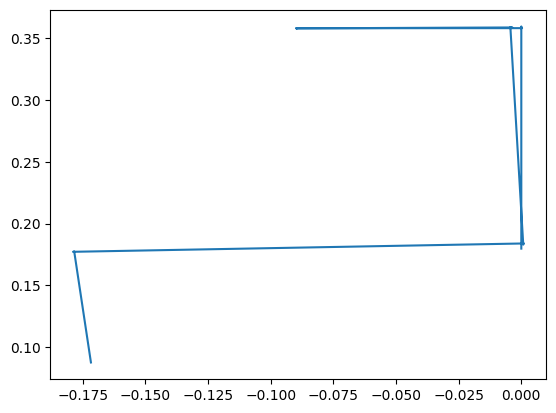

In [2]:
#オドメトリによる推定座標のプロット
plt.plot(mouse_ypos_graph, mouse_xpos_graph, linestyle='solid', label="目標速度[m/s]")
plt.plot(timevals5, mouse_vel_graph, linestyle='solid', label="マウスの推定速度[m/s]")

In [ ]:
if keyboard.is_pressed('5'):#オドメトリ
    # エンコーダを読み取る
    pre_odm_right, pre_odm_left = get_odom(model, data)
    target_vel = 0
    for kasoku in range(3):
        target_add_num = [0.09,0,-0.09]
        print(target_add_num[kasoku], "＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃")
        for kukan in range(10000):
            # print(kukan)
            x_veloci = data.sensor("Veloci").data[0] # 今の速度を取る
            mouse_correct_vel_graph.append(x_veloci)
            target_vel += target_add_num[kasoku]/10000 #目標回転角速度を15度/秒にすると
            err_vel = target_vel - mouse_vel # 目標との速度誤差を計算
            target_vel_graph.append(target_vel)
            err_vel_graph.append(err_vel)
            left_mot = straight_kp * err_vel
            right_mot = straight_kp * err_vel
            left_mot_graph.append(left_mot)
            action(model, data, left_mot, right_mot)
            mujoco.mj_step(model, data)
            mjstep_count += 1
            timevals5.append(data.time)
            yzahyou.append(data.geom("mein_body1").xpos[1])
            #Vizualize
            viz_now = data.time
            if viz_now-viz_past>0.01:
                viz_past = viz_now
                viewer.sync()
            # エンコーダをもう一度読み取る
            odm_right, odm_left = get_odom(model, data)
            # この一瞬に出たパルス数を算出し，
            right_pulse_num, left_pulse_num = get_pulse_count(pre_odm_right, pre_odm_left, odm_right, odm_left)
            right_pulse_num_graph.append(right_pulse_num)
            # パルス数から，移動速度と角速度を求める
            mouse_vel, mouse_radvel = get_odom_at_pulse(right_pulse_num, left_pulse_num) #これで，エンコーダによるマウスの速度・角速度が推定できた
            mouse_vel_graph.append(mouse_vel)
            # 速度に時間を掛けて，移動距離を計算 まず向きを計算し，その後移動距離を求める
            mouse_angle_rad = mouse_radvel * delta_t
            mouse_xpos += mouse_vel * math.cos(mouse_angle_rad) * delta_t
            mouse_ypos += mouse_vel * math.sin(mouse_angle_rad) * delta_t
            mouse_xpos_graph.append(mouse_xpos)
            mouse_ypos_graph.append(mouse_ypos)
            # 一つ前のodom値を更新
            pre_odm_right = odm_right
            pre_odm_left = odm_left
            viz_now = data.time
            if viz_now-viz_past>0.01:
                viz_past = viz_now
                viewer.sync()
            # print("え")
            if keyboard.is_pressed('9'):#PI制御モード
                print("breakした")
                break  # Add a valid statement after the break keyword

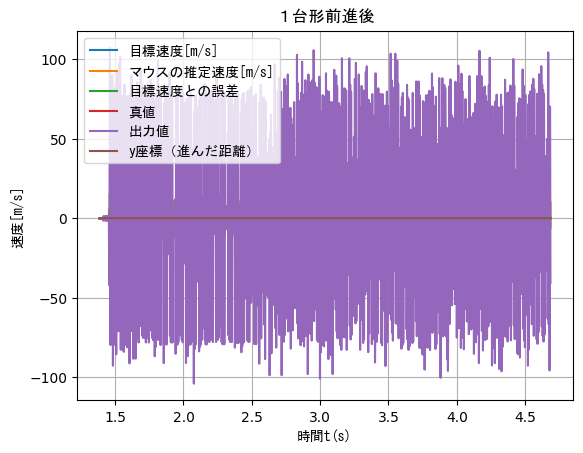

In [ ]:
plt.title("１台形前進後", fontname="MS Gothic")
plt.grid()
plt.xlabel("時間t(s)", fontname="MS Gothic")
plt.ylabel("速度[m/s]", fontname="MS Gothic")

# plt.plot(timevals, x_vel_graph, linestyle='solid', label="速度[m/s]")
plt.plot(timevals5, target_vel_graph, linestyle='solid', label="目標速度[m/s]")
plt.plot(timevals5, mouse_vel_graph, linestyle='solid', label="マウスの推定速度[m/s]")
plt.plot(timevals5, err_vel_graph, linestyle='solid', label="目標速度との誤差")
plt.plot(timevals5, mouse_correct_vel_graph, linestyle='solid', label="真値")
plt.plot(timevals5, left_mot_graph, linestyle='solid', label="出力値")
# # plt.plot(timevals, velocimeter_graph, linestyle='solid', label="correct_velocity")
# plt.plot(timevals, err_graph, linestyle='solid', label="目標速度との誤差")
plt.plot(timevals5, yzahyou, linestyle='solid', label="y座標（進んだ距離）")
# plt.plot(timevals, gyro_graph, linestyle='solid', label="gyro")
# plt.plot(mouse_ypos_graph, mouse_xpos_graph, linestyle='solid', label="座標")
# plt.xlim(0.2, 0.5)
# plt.ylim(0.08283, 0.08284)

# plt.plot(t, y, label='Free Fall', )
plt.legend(prop={'family':'MS Gothic'})

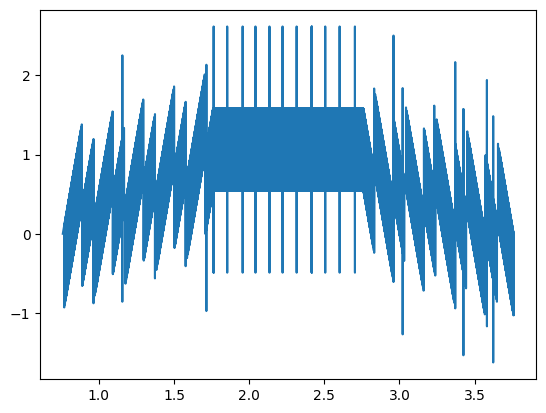

In [ ]:
plt.plot(timevals5, left_mot_graph, linestyle='solid', label="出力値")

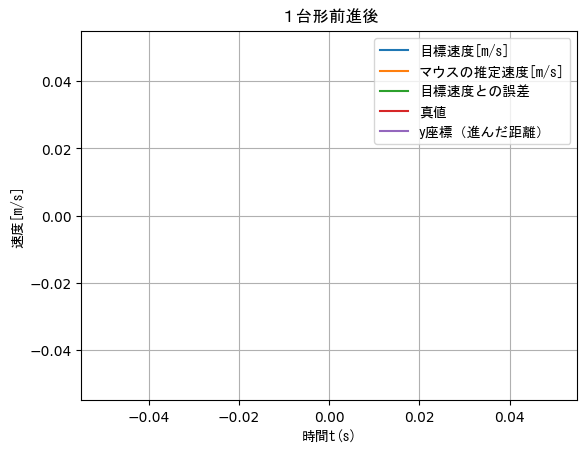

In [ ]:
plt.title("１台形前進後", fontname="MS Gothic")
plt.grid()
plt.xlabel("時間t(s)", fontname="MS Gothic")
plt.ylabel("速度[m/s]", fontname="MS Gothic")

# plt.plot(timevals, x_vel_graph, linestyle='solid', label="速度[m/s]")
plt.plot(timevals5, target_vel_graph, linestyle='solid', label="目標速度[m/s]")
plt.plot(timevals5, mouse_vel_graph, linestyle='solid', label="マウスの推定速度[m/s]")
plt.plot(timevals5, err_vel_graph, linestyle='solid', label="目標速度との誤差")
plt.plot(timevals5, mouse_correct_vel_graph, linestyle='solid', label="真値")
# plt.plot(timevals5, left_mot_graph, linestyle='solid', label="出力値")
# # plt.plot(timevals, velocimeter_graph, linestyle='solid', label="correct_velocity")
# plt.plot(timevals, err_graph, linestyle='solid', label="目標速度との誤差")
plt.plot(timevals5, yzahyou, linestyle='solid', label="y座標（進んだ距離）")
# plt.plot(timevals, gyro_graph, linestyle='solid', label="gyro")
# plt.plot(mouse_ypos_graph, mouse_xpos_graph, linestyle='solid', label="座標")
# plt.ylim(-0.000001, 0.000001)

# plt.plot(t, y, label='Free Fall', )
plt.legend(prop={'family':'MS Gothic'})

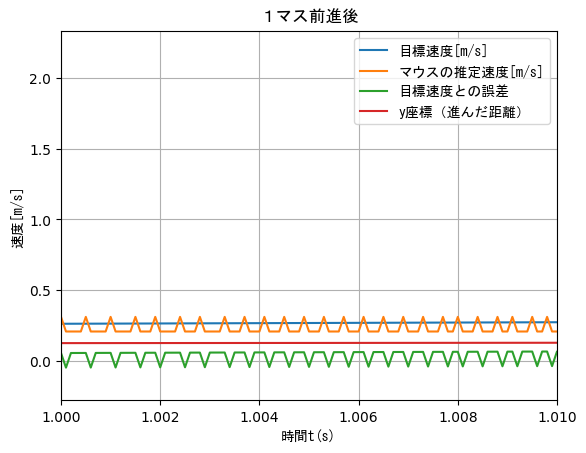

In [ ]:
plt.title("１マス前進後", fontname="MS Gothic")
plt.grid()
plt.xlabel("時間t(s)", fontname="MS Gothic")
plt.ylabel("速度[m/s]", fontname="MS Gothic")

# plt.plot(timevals, x_vel_graph, linestyle='solid', label="速度[m/s]")
plt.plot(timevals5, target_vel_graph, linestyle='solid', label="目標速度[m/s]")
plt.plot(timevals5, mouse_vel_graph, linestyle='solid', label="マウスの推定速度[m/s]")
plt.plot(timevals5, err_vel_graph, linestyle='solid', label="目標速度との誤差")
# # plt.plot(timevals, velocimeter_graph, linestyle='solid', label="correct_velocity")
# plt.plot(timevals, err_graph, linestyle='solid', label="目標速度との誤差")
plt.plot(timevals5, yzahyou, linestyle='solid', label="y座標（進んだ距離）")
# plt.plot(timevals, gyro_graph, linestyle='solid', label="gyro")
# plt.plot(mouse_ypos_graph, mouse_xpos_graph, linestyle='solid', label="座標")
plt.xlim(1.0, 1.01)

# plt.plot(t, y, label='Free Fall', )
plt.legend(prop={'family':'MS Gothic'})

## optionタグの，flag要素の，sensornoiseというパラメータ
## bodyタグの，　geom要素の，sizeというパラメータ　的な感じで書く！

In [ ]:
# Checking the integer conversion of 1.9 and 1.1 using int() function in Python
int_1_9 = int(1.9)
int_1_1 = int(1.1)
pre_odm_right = 0
pre_odm_left = 0

int_1_9, int_1_1 = pre_odm_right, pre_odm_left
print(mouse_xpos)


0.9896292975349543


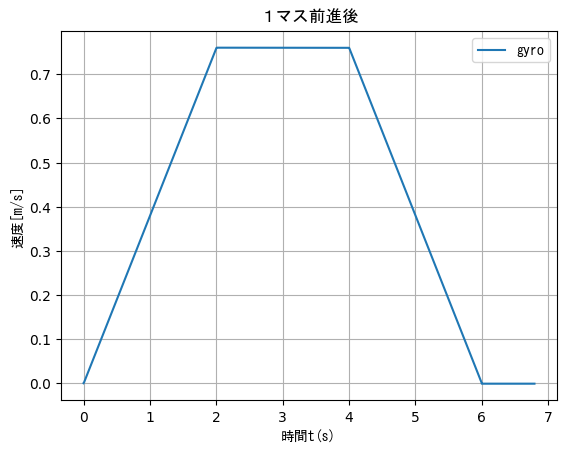

In [ ]:
# for i in range(7968):
#     gyro_graph.append(err_rad)
plt.title("１マス前進後", fontname="MS Gothic")
plt.grid()
plt.xlabel("時間t(s)", fontname="MS Gothic")
plt.ylabel("速度[m/s]", fontname="MS Gothic")

# plt.plot(timevals, x_vel_graph, linestyle='solid', label="速度[m/s]")
# plt.plot(timevals, velocimeter_graph, linestyle='solid', label="correct_velocity")
# plt.plot(timevals, err_graph, linestyle='solid', label="目標速度との誤差")
# plt.plot(timevals, yzahyou, linestyle='solid', label="y座標（進んだ距離）")
plt.plot(timevals, gyro_graph, linestyle='solid', label="gyro")
# plt.plot(t, y, label='Free Fall', )
plt.legend(prop={'family':'MS Gothic'})

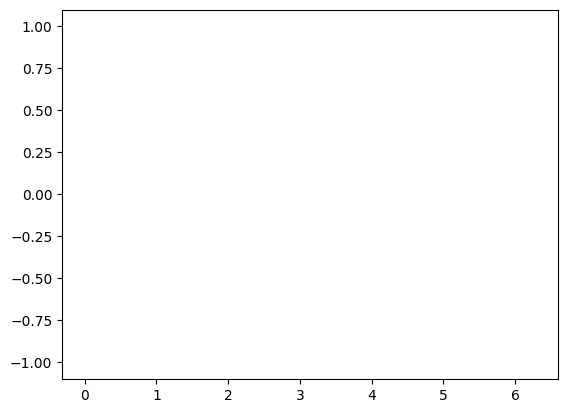

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# サンプルデータを生成 (正弦波)
t = np.linspace(0, 2 * np.pi, 100)
x = np.sin(t)

# 初期プロットの設定
fig, ax = plt.subplots()
line, = ax.plot(t, x)

# アニメーション更新関数
def update(num, x, t, line):
    line.set_data(t[:num], x[:num])
    return line,

# アニメーションの作成
ani = animation.FuncAnimation(fig, update, len(t), fargs=[x, t, line],
                              interval=25, blit=True)

plt.show()

# 注意: 実際の環境によっては、このコードを実行しても動画が表示されない場合があります。
# この場合は、ローカル環境で実行してください。また、動画を保存するには追加の設定が必要です。
ani.save('animation.mp4', writer='ffmpeg', fps=30)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import mediapy as media

# サンプルデータと画像リストの初期化
t = np.linspace(0, 2 * np.pi, 100)
images = []

# 各フレームのグラフを描画し、画像リストに追加
for i in range(len(t)):
    fig, ax = plt.subplots()
    ax.plot(t[:i], np.sin(t[:i]))
    # プロットを画像として保存
    fig.canvas.draw()  # キャンバスを描画
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    images.append(image)
    plt.close(fig)

# mediapyを使用して動画を生成
media.show_video(images, fps=20)

# 注意: 実際の環境によっては、このコードを実行しても動画が表示されない場合があります。
# この場合は、ローカル環境で実行してください。また、動画を保存するには追加の設定が必要です。


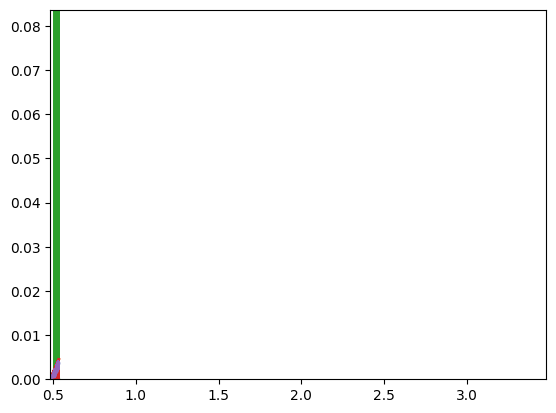

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# サンプルデータ（実際のデータに置き換えてください）
x_data = timevals5
y_data = mouse_correct_vel_graph
y1_data = target_vel_graph
y2_data = mouse_vel_graph
y3_data = err_vel_graph
y4_data = mouse_correct_vel_graph
# plt.plot(timevals5, mouse_correct_vel_graph, linestyle='solid', label="真値")

# 初期プロットの設定
fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
line1, = ax.plot([], [], lw=2)
line2, = ax.plot([], [], lw=2)
line3, = ax.plot([], [], lw=2)
line4, = ax.plot([], [], lw=2)

# 軸の設定（データに応じて調整）
x_range = max(x_data) - min(x_data)
y_range = max(y_data) - min(y_data)
x_margin = x_range * 0.1  # 10% margin on both sides
y_margin = y_range * 0.1  # 10% margin on both sides
ax.set_xlim(min(x_data) - x_margin, max(x_data) + x_margin)
ax.set_ylim(min(y_data) - y_margin, max(y_data) + y_margin)

# データを保持するリスト
x_traj = []
y_traj = []
y1_traj = []
y2_traj = []
y3_traj = []
y4_traj = []

# アニメーション更新関数
def update(num, x_data, y_data, y1_data, y2_data, y3_data, y4_data, line, line1, line2, line3, line4):
    start_index = num * 500
    end_index = (num + 1) * 500
    x_traj.extend(x_data[start_index:end_index])
    y_traj.extend(y_data[start_index:end_index])
    y1_traj.extend(y1_data[start_index:end_index])
    y2_traj.extend(y2_data[start_index:end_index])
    y3_traj.extend(y3_data[start_index:end_index])
    y4_traj.extend(y4_data[start_index:end_index])
    line.set_data(x_traj, y_traj)
    line1.set_data(x_traj, y1_traj)
    line2.set_data(x_traj, y2_traj)
    line3.set_data(x_traj, y3_traj)
    line4.set_data(x_traj, y4_traj)
    ax.set_xlim(min(x_data), max(x_data))  # Fix x-axis limits
    ax.set_ylim(min(y_data), max(y_data))  # Fix y-axis limits
    return line, line1, line2, line3, line4

# アニメーションの作成
ani = animation.FuncAnimation(fig, update, len(x_data) // 500, fargs=[x_data, y_data, y1_data, y2_data, y3_data, y4_data, line, line1, line2, line3, line4],
                              interval=50, blit=True)  # Set interval to 50 milliseconds (1 second per 20 frames)

plt.show()
ani.save('animation.mp4', writer='ffmpeg', fps=20)  # Set fps to 20 frames per second


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# サンプルデータ（実際のデータに置き換えてください）
x_data = np.linspace(0, 100, 10000)  # 例として0から100までの10000個のデータ
y_data = np.random.rand(10000)  # ランダムなデータ

# 初期プロットの設定
fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)

# 軸の設定（データに応じて調整）
ax.set_xlim(0, 100)
ax.set_ylim(0, 1)

# アニメーション更新関数
def update(num, x_data, y_data, line):
    num_points = 50 * num  # 50個ごとにプロット
    line.set_data(x_data[:num_points], y_data[:num_points])
    return line,

# アニメーションの作成
ani = animation.FuncAnimation(fig, update, len(x_data) // 50, fargs=[x_data, y_data, line],
                              interval=200, blit=True)

plt.show()


end


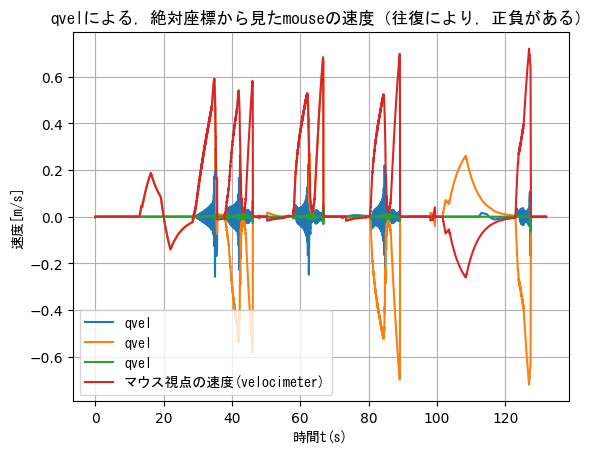

In [ ]:
print("end")
plt.title("qvelによる，絶対座標から見たmouseの速度（往復により，正負がある）", fontname="MS Gothic")
plt.grid()
plt.xlabel("時間t(s)", fontname="MS Gothic")
plt.ylabel("速度[m/s]", fontname="MS Gothic")

plt.plot(timevals, qvel_graph, linestyle='solid', label="qvel")
fig2 = plt.plot(timevals, velocimeter_graph, linestyle='solid', label="マウス視点の速度(velocimeter)")
# plt.plot(t, y, label='Free Fall', )
plt.legend(prop={'family':'MS Gothic'})

# data.qvelだと，その物体の各座標軸成分の速度しか得られないので，ロボットの速度を取る場合は計算が必要
ジャイロセンサから角速度を，加速度センサから加速度を取得して，オドメトリなどを行う
コリオリ力によって，あたかも横向きに力を受けたような挙動をする　コリオリ力の値から，角速度が求められるためそれを利用したのがジャイロセンサ

In [ ]:
data.qvel[0:3]
print(fig1)

[<matplotlib.lines.Line2D object at 0x0000025A92457970>, <matplotlib.lines.Line2D object at 0x0000025A92457A90>, <matplotlib.lines.Line2D object at 0x0000025A92457B80>]


""

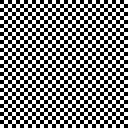

ValueError: Type object is not a valid media data type (uint or float).

In [ ]:
import mediapy
import numpy as np
checkerboard = np.kron([[0, 1] * 16, [1, 0] * 16] * 16, np.ones((4, 4)))
mediapy.show_image(checkerboard)

mediapy.compare_images([fig1, fig2])



In [ ]:
import time

import mujoco
import mujoco.viewer
import glfw
import keyboard

def action(model, data, left, right):
    data.actuator('right').ctrl[0] = right
    data.actuator('left').ctrl[0] = left

def get_distance(model, data):
    lf = data.sensor('LF').data[0]#sensordata[lf_id]
    ls = data.sensor('LS').data[0]#sensordata[ls_id]
    rs = data.sensor('RS').data[0]#sensordata[rs_id]
    rf = data.sensor('RF').data[0]#sensordata[rf_id]
    return lf,ls,rs,rf

def get_accel(model, data):
  ax = data.sensor('Accel').data[0]
  ay = data.sensor('Accel').data[1]
  az = data.sensor('Accel').data[2]
  return ax,ay,az

def get_gyro(model, data):
  gx = data.sensor('Gyro').data[0]
  gy = data.sensor('Gyro').data[1]
  gz = data.sensor('Gyro').data[2]
  return gx,gy,gz

paused = False
def key_callback(keycode): 
  if chr(keycode) == ' ':
    global paused #グローバル変数のpausedを使用できるように，この関数のスコープ内に取り込む処理
    paused = not paused #pausedの真偽値を逆にする　trueとfalseを反転

    # if chr(keycode) == ' ':
    #     # 前進の開始時刻を記録
    #     start_time = time.time()
    #     while time.time() - start_time < 0.2:
    #         data.actuator('right').ctrl[0] = 0.3
    #         data.actuator('left').ctrl[0] = 0.3
            

# 1秒間前進



#Create model
model = mujoco.MjModel.from_xml_path('../mouse_in_maze.xml')
data = mujoco.MjData(model)

gear = 0.3e-2
wheel_r = 0.0135

#Get ID
#wheel_left_id = mujoco.mj_name2id(model, 3,'left wheel joint')
#print('#Left Front Sensor ID',  lf_id)

#Main Loop
now = 0.0
past = 0.0
turn_flag = 0
with mujoco.viewer.launch_passive(model, data, key_callback=key_callback) as viewer: #キーイベントが発生すると、登録されたコールバック関数であるkey_callbackが自動的に呼び出され、キーコードやその他のイベント情報が引数keycodeとして渡されます。
  while viewer.is_running():
    if not paused:
      lf, ls, rs, rf = get_distance(model, data) #各センサ値を取得
      ax, ay, az = get_accel(model, data)
      gx, gy, gz = get_gyro(model, data)

      #Control
    #   err = ls - rs
    #   velocity = 0.05
    #   k= 0.6
    #   if turn_flag==1 or (lf<0.05 and rf <0.05):
    #     turn_flag = 1
    #     right_mot =  0.06
    #     left_mot  = -0.06
    #     if lf > 0.09 and rf > 0.09:
    #       turn_flag = 0
    #     #print('Turn')
    #   else:
    #     right_mot = velocity + k * err
    #     left_mot =  velocity - k * err
    #     #print('Foward')
    
    #   if keyboard.is_pressed('up'):
    #       print("キー '↑'")
    #       right_mot = 0.2
    #       left_mot =  0.2
    #     # 'a'キーに対する処理をここに記述
    #   elif keyboard.is_pressed('right'):
    #       print("キー '→'")
    #       right_mot = 0.05
    #       left_mot =  0.1
    #     # 'b'キーに対する処理をここに記述
    #   else:
    #   print("いずれのキーも押されていません。")
      right_mot = 0.0
      left_mot =  0.0

      #Move
      action(model, data, left_mot, right_mot) #次の制御入力を決める
      if keyboard.is_pressed('up'):
        start_time = time.time()
        while time.time() - start_time < 0.01:
            right_mot = 0.2
            left_mot =  0.2
            action(model, data, left_mot, right_mot)
            #Simulation
            mujoco.mj_step(model, data)
            viewer.sync()
      elif keyboard.is_pressed('down'):
        start_time = time.time()
        while time.time() - start_time < 0.01:
            right_mot = -0.2
            left_mot =  -0.2
            action(model, data, left_mot, right_mot)
            #Simulation
            mujoco.mj_step(model, data)
            viewer.sync()

      #Simulation
      mujoco.mj_step(model, data)
      
      #Vizualize
      now = data.time
      if now-past>0.1:
        past = now
        viewer.sync()
        #Sensor Data Show
        #print(now, ax, ay, az, gx, gy, gz)
        #print(lf,ls,rs,rf)
        #print(data.sensordata)
        #print(data.sensor('Gyro').data[0])
        # print(now,\
        #       data.actuator('right').length[0],   data.actuator('left').length[0],\
        #       data.actuator('right').velocity[0], data.actuator('left').velocity[0],\
        #       ax, ay, az, gx, gy, gz)
      

# 直進テスト用

""

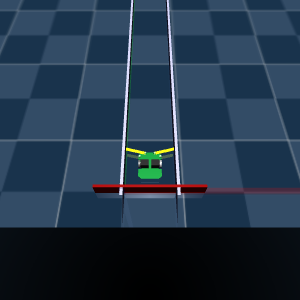

"left Wheel"という:タイヤのgeomのidは  8
name of geom 8:  ['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'bodyid', 'conaffinity', 'condim', 'contype', 'dataid', 'friction', 'gap', 'group', 'id', 'margin', 'matid', 'name', 'pos', 'priority', 'quat', 'rbound', 'rgba', 'sameframe', 'size', 'solimp', 'solmix', 'solref', 'type', 'user']


qpos= [ 8.99988925e-02  7.69412975e+00 -2.30847833e-04  7.07105498e-01
 -1.31828524e-03  1.31828504e-03  7.07105607e-01  6.08464856e+02
  6.08464856e+02]
最後のqvel= 281.2435858089406
最後のact_vel 2.531192391642519
最後の時間 3.0000000000019065
None


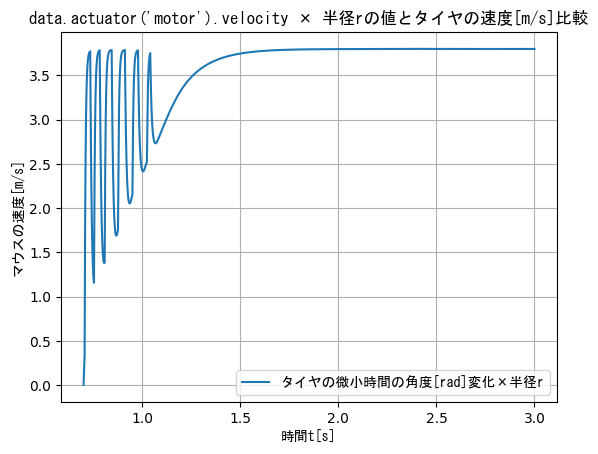

8.148148148148149


In [ ]:
import numpy as np
import mujoco
import mediapy as media
import matplotlib.pyplot as plt

mouse_act_vel = []
mouse_wheel_act_vel = []
mouse_yvel = []
left_ang = []
right_ang = []
times = []
frames = []


duration=3
framerate=60

model = mujoco.MjModel.from_xml_path('../mouse_in_test_course.xml')
renderer = mujoco.Renderer(model, 300, 300)
data = mujoco.MjData(model)
mujoco.mj_forward(model, data)
renderer.update_scene(data, "camera_name")
media.show_image(renderer.render())
print('"left Wheel"という:タイヤのgeomのidは ', model.geom('left_wheel').id)
print('name of geom 8: ',dir(model.geom(8)))
for ii in range(7000):
  mujoco.mj_step(model, data) #1ステップ進める

while data.time < duration: #指定した時間分，実行する
  data.ctrl = [3,3]
  prev_wheel_ang_left = data.qpos[7]
  prev_wheel_ang_right = data.qpos[8]
  before_time = data.time
  mujoco.mj_step(model, data) #1ステップ進める
  after_time = data.time
  delta_time = after_time - before_time
  times.append(data.time) #時間の値をリストに格納
  wheel_ang_left = data.qpos[7]
  wheel_ang_right = data.qpos[8]
  leftwheel_angvel = (wheel_ang_left - prev_wheel_ang_left)/delta_time
  rightwheel_angvel = (wheel_ang_right - prev_wheel_ang_right)/delta_time #前ー後 つまり進んでたら正になるし下がってたら負になる

  mouse_wheel_act_vel.append(leftwheel_angvel*0.0135) #角速度に半径を掛けたもの＝

  # mouse_yvel.append(data.qvel[1].copy()) #torsoのy軸向き速度

  mouse_act_vel.append(data.actuator("left").velocity[0].copy()/(0.0003)*0.0135)

  if len(frames) < data.time * framerate: #data.time * framerateをすることで，今取るべき理論的なframeの数　理論上生成されているべきフレームの総数を計算します。実際の秒数１秒あたりのフレーム数は60が良いから，1秒あたり60枚のframeがない場合は，レンダリングするようにしている
    #１秒あたり60枚レンダリングできるように，内部時間（秒）にframerateを掛け算することで，その値は1秒で60になるように均等に増加していく，なのでその値をみて，その分だけframeのデータが足りないときを条件にすることで均等なレンダリングを実現している
    renderer.update_scene(data, "camera_name") #rendererというのが中で動いていて，その中で描画が管理されている．その描画管理の場所を，現在のdataの状態に更新する．
    pixels = renderer.render() #内部のrenderの今の状態を，取り出す（内部の描画ウインドウから今をスクショしてくるイメージ）　：　レンダリングという
    frames.append(pixels) #取り出したスクショを，frameリストに保存する
media.show_video(frames, fps=framerate) #frameリストに入っている画像群を，指定したフレームレートになるよう動画に変換する

print("qpos=", data.qpos)
print("最後のqvel=", leftwheel_angvel)
print("最後のact_vel",data.actuator("left").velocity[0].copy() )
print(print("最後の時間",data.time))

plt.xlabel("時間t[s]", fontname="MS Gothic")
plt.ylabel("マウスの速度[m/s]", fontname="MS Gothic")
plt.grid()
plt.title("data.actuator('motor').velocity × 半径rの値とタイヤの速度[m/s]比較", fontname="MS Gothic")
# plt.plot(times, mouse_act_vel, linestyle='solid', label="velocityをgearで割って半径rを掛けた値")
plt.plot(times, mouse_wheel_act_vel, linestyle='solid', label="タイヤの微小時間の角度[rad]変化×半径r")
plt.legend(prop={'family':'MS Gothic'})
plt.show()

# ω　＝　ｖ/ｒより，
omega = 0.11 / 0.0135
print(omega)

In [ ]:
times

[0.0001,
 0.0002,
 0.00030000000000000003,
 0.0004,
 0.0005,
 0.0006000000000000001,
 0.0007000000000000001,
 0.0008000000000000001,
 0.0009000000000000002,
 0.0010000000000000002,
 0.0011000000000000003,
 0.0012000000000000003,
 0.0013000000000000004,
 0.0014000000000000004,
 0.0015000000000000005,
 0.0016000000000000005,
 0.0017000000000000006,
 0.0018000000000000006,
 0.0019000000000000006,
 0.0020000000000000005,
 0.0021000000000000003,
 0.0022,
 0.0023,
 0.0024,
 0.0024999999999999996,
 0.0025999999999999994,
 0.0026999999999999993,
 0.002799999999999999,
 0.002899999999999999,
 0.0029999999999999988,
 0.0030999999999999986,
 0.0031999999999999984,
 0.0032999999999999982,
 0.003399999999999998,
 0.003499999999999998,
 0.0035999999999999977,
 0.0036999999999999976,
 0.0037999999999999974,
 0.0038999999999999972,
 0.0039999999999999975,
 0.004099999999999998,
 0.004199999999999998,
 0.004299999999999998,
 0.0043999999999999985,
 0.004499999999999999,
 0.004599999999999999,
 0.004699

In [ ]:
import random
import time

def shuffle_names(names):
    random.shuffle(names)
    return names

#みんなの名前のリスト
names_list = ["森岡", "廣島", "有川", "井上", "森永", "川田", "玉村", "橋口", "池岡", "水野","青木", "西本", "佐藤", "渋谷"]

#名前のリストをランダムに並び替えたものを用意
shuffled_names = shuffle_names(names_list)

print(3)
time.sleep(1)
print(2)
time.sleep(1)
print(1)
time.sleep(1)

n = 0
#結果の出力
print("今日の発表順番は:")
for name in shuffled_names: #ランダムの名前リストから順に表示
    n += 1
    print(n,":",name)

3
2
1
今日の発表順番は:
1 : 池岡
2 : 廣島
3 : 西本
4 : 渋谷
5 : 川田
6 : 佐藤
7 : 井上
8 : 有川
9 : 玉村
10 : 青木
11 : 水野
12 : 森永
13 : 森岡
14 : 橋口
